In [19]:
import numpy as np
import pandas as pd 
import sklearn
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
!pip install yfinance
import yfinance as yf
from sklearn.metrics import mean_squared_error
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
## downloading Dow Jones current stocks and Dow Jones index 
dj_stock=['AAPL','UNH','GS','HD','MCD','AMGN','CAT','MSFT','HON','V','CVX','TRV','JNJ','BA',
          'AXP','WMT','CRM','IBM','PG','JPM','MMM','DIS','MRK','NKE','KO','DOW','CSCO','VZ','WBA','INTC','DJI']
data=yf.download(dj_stock,start="2000-01-01", end="2022-11-08")

[*********************100%***********************]  31 of 31 completed


In [21]:
data.head

<bound method NDFrame.head of              Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2000-01-03    0.851942   47.503193   33.551994   25.940287   13.234138   
2000-01-04    0.780115   43.870872   32.285137   25.899946   13.064032   
2000-01-05    0.791531   45.380409   31.465118   27.513645   13.370223   
2000-01-06    0.723033   46.135185   32.106159   27.796030   14.050634   
2000-01-07    0.757282   51.324207   32.573608   28.602886   14.509921   
...                ...         ...         ...         ...         ...   
2022-11-01  150.400497  272.059998  147.080002  143.380005  218.500000   
2022-11-02  144.789810  269.010010  143.500000  147.410004  214.539993   
2022-11-03  138.650009  265.880005  139.309998  156.750000  219.259995   
2022-11-04  138.380005  269.040009  144.720001  160.009995  227.850006   
2022-11-

In [22]:
## Checking available data for each index
usable_stock=[]
for i in range(31):
  
  print(dj_stock[i],'has',data[('Close',dj_stock[i])].isna().sum(),'missing value' )
  if data[('Close',dj_stock[i])].isna().sum()<1000:
    usable_stock.append(dj_stock[i])

## with 5750 available trading dates information at maximum, all stocks with more than 1000 missing rows will be removed

AAPL has 0 missing value
UNH has 0 missing value
GS has 0 missing value
HD has 0 missing value
MCD has 0 missing value
AMGN has 0 missing value
CAT has 0 missing value
MSFT has 0 missing value
HON has 0 missing value
V has 2063 missing value
CVX has 0 missing value
TRV has 0 missing value
JNJ has 0 missing value
BA has 0 missing value
AXP has 0 missing value
WMT has 0 missing value
CRM has 1122 missing value
IBM has 0 missing value
PG has 0 missing value
JPM has 0 missing value
MMM has 0 missing value
DIS has 0 missing value
MRK has 0 missing value
NKE has 0 missing value
KO has 0 missing value
DOW has 4832 missing value
CSCO has 0 missing value
VZ has 0 missing value
WBA has 0 missing value
INTC has 0 missing value
DJI has 345 missing value


In [23]:
## As DJI (Dow Jones index is the target, rows with the missing DJI will be removed)

In [24]:
## redownloading data from stocks with less than 1000 missing values
data1=yf.download(usable_stock,start="2000-01-01", end="2022-11-08")

[*********************100%***********************]  28 of 28 completed


In [25]:
for i in range(28):
  
  print(usable_stock[i],'has',data1[('Close',usable_stock[i])].isna().sum(),'missing value' )

AAPL has 0 missing value
UNH has 0 missing value
GS has 0 missing value
HD has 0 missing value
MCD has 0 missing value
AMGN has 0 missing value
CAT has 0 missing value
MSFT has 0 missing value
HON has 0 missing value
CVX has 0 missing value
TRV has 0 missing value
JNJ has 0 missing value
BA has 0 missing value
AXP has 0 missing value
WMT has 0 missing value
IBM has 0 missing value
PG has 0 missing value
JPM has 0 missing value
MMM has 0 missing value
DIS has 0 missing value
MRK has 0 missing value
NKE has 0 missing value
KO has 0 missing value
CSCO has 0 missing value
VZ has 0 missing value
WBA has 0 missing value
INTC has 0 missing value
DJI has 345 missing value


In [26]:
data1.shape

(5750, 168)

In [27]:
use_data=data1.copy()[['Close','Volume']]

In [28]:
use_data=use_data.dropna()

In [29]:
use_data.shape

(5405, 56)

In [30]:
for i in range(28):
  
  print(usable_stock[i],'has',use_data[('Close',usable_stock[i])].isna().sum(),'missing value' )

AAPL has 0 missing value
UNH has 0 missing value
GS has 0 missing value
HD has 0 missing value
MCD has 0 missing value
AMGN has 0 missing value
CAT has 0 missing value
MSFT has 0 missing value
HON has 0 missing value
CVX has 0 missing value
TRV has 0 missing value
JNJ has 0 missing value
BA has 0 missing value
AXP has 0 missing value
WMT has 0 missing value
IBM has 0 missing value
PG has 0 missing value
JPM has 0 missing value
MMM has 0 missing value
DIS has 0 missing value
MRK has 0 missing value
NKE has 0 missing value
KO has 0 missing value
CSCO has 0 missing value
VZ has 0 missing value
WBA has 0 missing value
INTC has 0 missing value
DJI has 0 missing value


In [31]:
target=use_data.copy()[('Close','DJI')]
target

Date
2000-01-03    11357.500000
2000-01-04    10997.900391
2000-01-05    11122.700195
2000-01-06    11253.299805
2000-01-07    11522.599609
                  ...     
2022-02-24    33223.800781
2022-02-25    34058.800781
2022-02-28    33892.601562
2022-03-01    33294.898438
2022-03-02    33891.300781
Name: (Close, DJI), Length: 5405, dtype: float64

In [32]:
features=use_data.copy().drop([('Volume','DJI')],axis=1)
features.shape

(5405, 55)

In [33]:
use_data.describe()

Close                                                      \
              AAPL         AMGN          AXP           BA          CAT   
count  5405.000000  5405.000000  5405.000000  5405.000000  5405.000000   
mean     24.040308   104.895727    64.219277   113.444387    80.163635   
std      36.178848    61.332531    32.798929    87.002259    47.682810   
min       0.234286    31.070000    10.260000    25.059999    14.906250   
25%       1.450179    57.709999    42.500000    54.500000    41.009998   
50%      10.318571    69.220001    53.430000    75.519997    75.660004   
75%      28.552500   158.800003    81.000000   139.000000   100.550003   
max     182.009995   260.950012   198.380005   440.619995   244.789993   

                                                                         ...  \
              CSCO          CVX          DIS           DJI           GS  ...   
count  5405.000000  5405.000000  5405.000000   5405.000000  5405.000000  ...   
mean     28.322083    82.745683    61.332380  15301.223146   161.114052  ...   
std      13.032238    29.260241    44.158362   6904.610201    69.613408  ...   
min       8.600000    30.924999    13.584105   6547.049805    52.000000  ...   
25%      19.080000    56.570000    27.370001  10470.700195   103.260002  ...   
50%      23.980000    85.750000    37.049999  12447.500000   157.440002  ...   
75%      31.850000   108.029999    99.570000  17912.599609   197.119995  ...   
max      80.062500   154.139999   201.910004  36799.699219   423.850006  ...   

             Volume                                                          \
                MMM           MRK          MSFT           NKE            PG   
count  5.405000e+03  5.405000e+03  5.405000e+03  5.405000e+03  5.405000e+03   
mean   3.365857e+06  1.202921e+07  5.405171e+07  1.070737e+07  9.386205e+06   
std    1.894357e+06  7.772718e+06  3.111101e+07  6.837767e+06  5.883023e+06   
min    6.510000e+05  1.982921e+06  7.425600e+06  1.821900e+06  1.030400e+06   
25%    2.169600e+06  7.455472e+06  3.186520e+07  6.636400e+06  6.295400e+06   
50%    2.883900e+06  1.042351e+07  4.919560e+07  9.072000e+06  8.099000e+06   
75%    3.979200e+06  1.427418e+07  6.738750e+07  1.274190e+07  1.081250e+07   
max    2.911600e+07  1.519762e+08  5.910522e+08  9.776080e+07  1.372872e+08   

                                                                             
                TRV           UNH            VZ           WBA           WMT  
count  5.405000e+03  5.405000e+03  5.405000e+03  5.405000e+03  5.405000e+03  
mean   2.435529e+06  6.657749e+06  1.388455e+07  5.473867e+06  1.099254e+07  
std    1.771074e+06  4.503231e+06  1.141656e+07  3.835864e+06  6.706968e+06  
min    2.677000e+05  7.440000e+05  1.363804e+06  5.700000e+05  2.031400e+06  
25%    1.289900e+06  3.608300e+06  8.676863e+06  3.112800e+06  6.716100e+06  
50%    1.904400e+06  5.506200e+06  1.251353e+07  4.688500e+06  8.997200e+06  
75%    3.007700e+06  8.276000e+06  1.691806e+07  6.716400e+06  1.310670e+07  
max    2.782020e+07  5.680120e+07  6.166205e+08  8.413010e+07  9.678680e+07  

[8 rows x 56 columns]

In [34]:
features.Volume.iloc[0,:].sum()

848366269

In [35]:
target

Date
2000-01-03    11357.500000
2000-01-04    10997.900391
2000-01-05    11122.700195
2000-01-06    11253.299805
2000-01-07    11522.599609
                  ...     
2022-02-24    33223.800781
2022-02-25    34058.800781
2022-02-28    33892.601562
2022-03-01    33294.898438
2022-03-02    33891.300781
Name: (Close, DJI), Length: 5405, dtype: float64

In [36]:
test_size=0.05
X_bigtrain_raw,X_test_raw=features.iloc[:-int(test_size*len(features)),:],features.iloc[-int(test_size*len(features)):,:]
y_bigtrain_raw,y_test_raw=np.array(target.iloc[:-int(test_size*len(features))]).reshape((-1,1)),np.array(target.iloc[-int(test_size*len(features)):]).reshape((-1,1))

In [37]:
X_bigtrain_raw.shape,X_test_raw.shape,y_bigtrain_raw.shape

((5135, 55), (270, 55), (5135, 1))

In [38]:
target.min(axis=0),target.max(axis=0)

(6547.0498046875, 36799.69921875)

In [39]:
mins_x_bigtrain=X_bigtrain_raw.min(axis=0)
maxs_x_bigtrain=X_bigtrain_raw.max(axis=0)
min_y_bigtrain=y_bigtrain_raw.min(axis=0)
max_y_bigtrain=y_bigtrain_raw.max(axis=0)


In [40]:
def my_scaler(dataset,max_factor=None,min_factor=None):
  if max_factor is None:
    max_factor=dataset.max(axis=0)
  if min_factor is None:
    mean_factor=(dataset.max(axis=0)+dataset.min(axis=0))/2
  else:
    mean_factor=(max_factor+min_factor)/2
  
  scaled_data=(dataset-mean_factor)/(max_factor-mean_factor)
  return scaled_data
def inverse_scale(y,max=max_y_bigtrain,min=min_y_bigtrain):
  mean_factor=(max+min)/2
  return y*(max-mean_factor)+mean_factor

In [41]:
X_bigtrain=my_scaler(X_bigtrain_raw,maxs_x_bigtrain,mins_x_bigtrain)
y_bigtrain=my_scaler(y_bigtrain_raw,max_y_bigtrain,min_y_bigtrain)

In [42]:
X_test=my_scaler(X_test_raw,maxs_x_bigtrain,mins_x_bigtrain)
y_test=my_scaler(y_test_raw,max_y_bigtrain,min_y_bigtrain)

In [43]:
X_bigtrain_raw

Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2000-01-03    0.999442   62.937500   45.880306   40.187500   24.312500   
2000-01-04    0.915179   58.125000   44.147945   40.125000   24.000000   
2000-01-05    0.928571   60.125000   42.962643   42.625000   24.562500   
2000-01-06    0.848214   61.125000   43.837940   43.062500   25.812500   
2000-01-07    0.888393   68.000000   44.476181   44.312500   26.656250   
...                ...         ...         ...         ...         ...   
2021-01-11  128.979996  237.570007  121.059998  206.789993  193.860001   
2021-01-12  128.800003  236.589996  121.620003  208.410004  197.539993   
2021-01-13  130.889999  237.740005  122.400002  207.210007  195.889999   
2021-01-14  128.910004  241.660004  123.779999  209.910004  197.399994   
2021-01-15  127.139999  245.490005  122.150002  204.320007  194.619995   

                                                                        ...  \
                 CSCO        CVX         DIS           DJI          GS  ...   
Date                                                                    ...   
2000-01-03  54.031250  41.812500   29.471687  11357.500000   88.312500  ...   
2000-01-04  51.000000  41.812500   31.198063  10997.900391   82.750000  ...   
2000-01-05  50.843750  42.562500   32.492844  11122.700195   78.875000  ...   
2000-01-06  50.000000  44.375000   31.198063  11253.299805   82.250000  ...   
2000-01-07  52.937500  45.156250   30.704813  11522.599609   82.562500  ...   
...               ...        ...         ...           ...         ...  ...   
2021-01-11  45.360001  91.599998  179.089996  31008.699219  293.829987  ...   
2021-01-12  45.790001  93.339996  175.990005  31068.699219  302.209991  ...   
2021-01-13  45.360001  93.250000  176.119995  31060.500000  302.940002  ...   
2021-01-14  45.150002  95.489998  173.429993  30991.500000  307.869995  ...   
2021-01-15  45.430000  92.089996  171.440002  30814.300781  301.010010  ...   

             Volume                                                           \
                MMM       MRK      MSFT      NKE       PG      TRV       UNH   
Date                                                                           
2000-01-03  2173400   6265782  53228400  8014400  4275000   336400   3431200   
2000-01-04  2713800   7894689  54119000  9810400  4270800   494400   5997600   
2000-01-05  3699400   7963018  64059600  6542400  5098400   736000  10562400   
2000-01-06  5975800   4989004  54976600  4891200  6524200   660400  15300000   
2000-01-07  4101200  10871218  62013600  3993600  9832000   594700  16160800   
...             ...       ...       ...      ...      ...      ...       ...   
2021-01-11  2736600  13488179  23031300  4252000  7239900  1017200   2695100   
2021-01-12  2949100  10128606  23249300  3678800  6333500   830100   2372500   
2021-01-13  2098000  10093812  20087100  3330100  6078800  1409200   1974500   
2021-01-14  2895400  11366398  29480800  4104000  6172800  1621900   2919900   
2021-01-15  3550700  10203538  31746500  6412400  7757600  1915900   3777000   

                                          
                  VZ       WBA       WMT  
Date                                      
2000-01-03   4663843   2095900   8369900  
2000-01-04   5005878   1709100   6745100  
2000-01-05   6368681   2167800   7018700  
2000-01-06   4705763   2595400   6544500  
2000-01-07   5043907   3629900   7976900  
...              ...       ...       ...  
2021-01-11  15688000  11220900   8754800  
2021-01-12  22699300   6661300   7791100  
2021-01-13  16985400  10244400   5356500  
2021-01-14  18341100   7422900   7672400  
2021-01-15  15785300   7451900  11973500  

[5135 rows x 55 columns]

In [44]:
baseline_train_pred=X_bigtrain_raw.Close.drop('DJI',axis=1).sum(axis=1)/0.13
big_train_rmse_base=math.sqrt(mean_squared_error(y_bigtrain_raw,baseline_train_pred))
print(f'On the whole training data, root mean squared error for the baseline is {round(big_train_rmse_base,7)}')

On the whole training data, root mean squared error for the baseline is 1187.7363477


In [45]:
baseline_test_pred=X_test_raw.Close.drop('DJI',axis=1).sum(axis=1)/0.13
test_rmse_base=math.sqrt(mean_squared_error(y_test_raw,baseline_test_pred))
print(f'On the test data, root mean squared error for the baseline is {round(test_rmse_base,7)}')

On the test data, root mean squared error for the baseline is 1684.9880495


In [46]:

def create_sequence(data_raw, seq, train_data=None):
    
    data = []
    if train_data is not None:
      data_raw=pd.concat([train_data[-seq:], data_raw])
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - seq): 
      data.append(data_raw[index: index + seq])
   
    data = np.array(data);
    
    x_train = data[:,:,]
    return x_train

In [47]:
seq=10

In [48]:
X_bigtrain_seq=create_sequence(X_bigtrain,seq)
X_bigtrain_seq

array([[[-0.98878528, -0.72274666, -0.43758888, ..., -0.98927264,
         -0.96347778, -0.86621343],
        [-0.99002031, -0.76461633, -0.46494123, ..., -0.9881608 ,
         -0.97273579, -0.90050804],
        [-0.98982402, -0.74721595, -0.48365604, ..., -0.98373077,
         -0.96175687, -0.89473318],
        ...,
        [-0.99202417, -0.71730904, -0.44709018, ..., -0.99049365,
         -0.96427003, -0.95665471],
        [-0.99077279, -0.68903342, -0.44334728, ..., -0.99213322,
         -0.96356874, -0.93689858],
        [-0.99029023, -0.67598314, -0.42722376, ..., -0.99409413,
         -0.96460751, -0.90964526]],

       [[-0.99002031, -0.76461633, -0.46494123, ..., -0.9881608 ,
         -0.97273579, -0.90050804],
        [-0.98982402, -0.74721595, -0.48365604, ..., -0.98373077,
         -0.96175687, -0.89473318],
        [-0.9910018 , -0.73851576, -0.46983592, ..., -0.98913638,
         -0.95152232, -0.9047421 ],
        ...,
        [-0.99077279, -0.68903342, -0.44334728, ..., -

In [49]:
X_bigtrain_seq[2,:,8]

array([-0.62725268, -0.61661362, -0.59467558, -0.59063496, -0.59561241,
       -0.59235388, -0.58980402, -0.57835032, -0.59157178, -0.5973801 ])

In [50]:
i=4844
X_bigtrain_seq[i,:,1]

array([0.41656508, 0.40107876, 0.3950756 , 0.39316155, 0.365756  ,
       0.31720892, 0.27370797, 0.26405075, 0.29363134, 0.28092914])

In [51]:
y_bigtrain_seq=y_bigtrain[seq:]
y_bigtrain_seq.shape

(5125, 1)

In [52]:
X_test_seq=create_sequence(X_test,seq,X_bigtrain)


In [53]:
y_test_seq=y_test

In [54]:
val_size=0.1
X_train_seq=X_bigtrain_seq[:int(-len(X_bigtrain_seq)*val_size),:,:]
X_val_seq=X_bigtrain_seq[int(-len(X_bigtrain_seq)*val_size):,:,:]
y_train_seq=y_bigtrain_seq[:int(-len(y_bigtrain_seq)*val_size),:]
y_val_seq=y_bigtrain_seq[int(-len(y_bigtrain_seq)*val_size):,:]

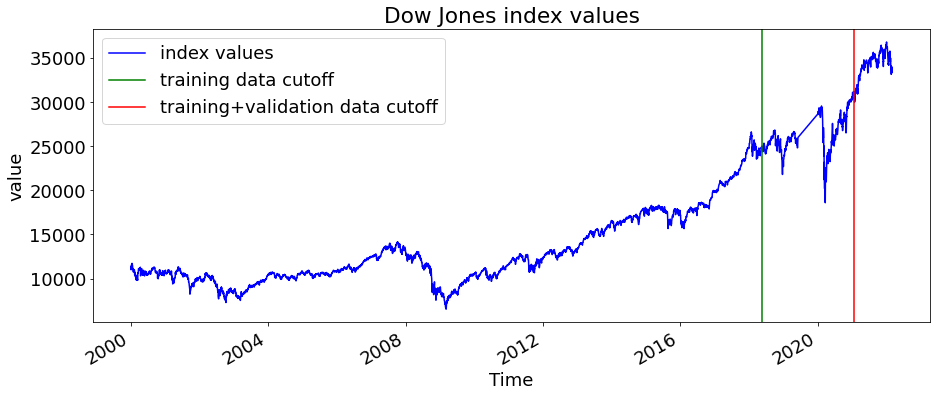

In [55]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sns
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(target.index, target, color = 'blue', label = 'index values ')
plt.title('Dow Jones index values')
plt.axvline(x = features.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.axvline(x = features.index[len(X_train_seq)+len(X_val_seq)+seq], color = 'r', label = 'training+validation data cutoff')
plt.xlabel('Time')
plt.ylabel('value')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [56]:
for i in [X_train_seq,X_val_seq,y_train_seq,y_val_seq]:
  print(i.shape)

(4613, 10, 55)
(512, 10, 55)
(4613, 1)
(512, 1)


In [57]:
class PrepareData(Dataset):

    def __init__(self, X, y):
        if not torch.is_tensor(X):
          self.X = torch.from_numpy(X)
        else:
          self.X=X
        if not torch.is_tensor(y):
          self.y = torch.from_numpy(y)
        else:
          self.y=y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [58]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [59]:
X_train_seq = torch.from_numpy(X_train_seq).type(torch.Tensor).to(device)
X_val_seq = torch.from_numpy(X_val_seq).type(torch.Tensor).to(device)
X_test_seq = torch.from_numpy(X_test_seq).type(torch.Tensor).to(device)
y_train_seq = torch.from_numpy(y_train_seq).type(torch.Tensor).to(device)
y_val_seq = torch.from_numpy(y_val_seq).type(torch.Tensor).to(device)
y_test_seq = torch.from_numpy(y_test_seq).type(torch.Tensor).to(device)

In [60]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,device=device,batch_size=32):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.device=device
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.batch_size=batch_size

    def forward(self, x):
        batch_size = len(x)
    
        # This makes the model not break for the last batch that might be less
        # than batch_size in size
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        h0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()
        h0=h0.to(device)
        c0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()
        c0=c0.to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [61]:
def train_model(model,criterion,optimizer,epoch,trainloader,x_val=None,y_val=None, eval=True):


  train_hist = np.zeros(epoch)
  val_hist=np.zeros(epoch)



  model.to(device)

  for t in range(epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs and transfer them to gpu
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # calculating training statistics
        running_loss += loss.item()
        
    # Calculating training statistics for a whole epoch
    train_loss=running_loss/len(trainloader)

    train_hist[t] = train_loss


    if eval:
      with torch.no_grad():
        y_val_pred=model(x_val)
        val_loss=criterion(y_val_pred, y_val)
        val_hist[t] = val_loss.item()
      print(f'epoch {t+1}, train_mse={round(loss.item(),7)}, val_mse={round(val_loss.item(),7)}')
    else:
      print(f'epoch {t+1}, train_mse={round(loss.item(),7)}')
  if eval:
    plt.plot(range(1,t+2), train_hist, 'g', range(1,t+2), val_hist, 'r')
    plt.legend(['training loss','validation loss'])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
  else:
    plt.plot(range(1,t+2), train_hist, 'g')
    plt.legend(['training loss'])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()


In [62]:
def eval_rmse(model,x_val,y_val,name='validation',scaled=True):

  with torch.no_grad():
    y_val_pred = model(x_val)

  # invert predictions
  if scaled:

    y_val_pred = inverse_scale(y_val_pred.cpu().detach().numpy(),max=max_y_bigtrain,min=min_y_bigtrain)
    y_val = inverse_scale(y_val.cpu().numpy())

  else:

    y_val_pred = (y_val_pred.cpu().detach().numpy())
    y_val = (y_val.cpu())



  # calculate root mean squared error

  outScore = math.sqrt(mean_squared_error(y_val[:,0], y_val_pred[:,0]))
  print(f'{name} RMSE: {round(outScore,7)}')

  return y_val_pred

In [63]:
y_val_seq.shape

torch.Size([512, 1])

In [64]:
DJ=yf.download('DJI',start="2000-01-01", end="2022-11-08")

[*********************100%***********************]  1 of 1 completed


In [65]:
DJ

Open          High           Low         Close  \
Date                                                                 
2000-01-03  11357.500000  11357.500000  11357.500000  11357.500000   
2000-01-04  10997.900391  10997.900391  10997.900391  10997.900391   
2000-01-05  11122.700195  11122.700195  11122.700195  11122.700195   
2000-01-06  11253.299805  11253.299805  11253.299805  11253.299805   
2000-01-07  11522.599609  11522.599609  11522.599609  11522.599609   
...                  ...           ...           ...           ...   
2022-02-24  33223.800781  33223.800781  33223.800781  33223.800781   
2022-02-25  34058.800781  34058.800781  34058.800781  34058.800781   
2022-02-28  33892.601562  33892.601562  33892.601562  33892.601562   
2022-03-01  33294.898438  33294.898438  33294.898438  33294.898438   
2022-03-02  33891.300781  33891.300781  33891.300781  33891.300781   

               Adj Close  Volume  
Date                              
2000-01-03  11357.500000       0  
2000-01-04  10997.900391       0  
2000-01-05  11122.700195       0  
2000-01-06  11253.299805       0  
2000-01-07  11522.599609       0  
...                  ...     ...  
2022-02-24  33223.800781       0  
2022-02-25  34058.800781       0  
2022-02-28  33892.601562       0  
2022-03-01  33294.898438       0  
2022-03-02  33891.300781       0  

[5405 rows x 6 columns]

In [66]:
DJ_fea=DJ.iloc[:,1:4]
DJ_tar=DJ.iloc[:,3]

In [67]:
test_size=0.05
X_bigtrain_rawDJ,X_test_rawDJ=DJ_fea.iloc[:-int(test_size*len(features)),:],DJ_fea.iloc[-int(test_size*len(features)):,:]
y_bigtrain_rawDJ,y_test_rawDJ=np.array(DJ_tar.iloc[:-int(test_size*len(features))]).reshape((-1,1)),np.array(target.iloc[-int(test_size*len(features)):]).reshape((-1,1))

In [68]:
maxs_x_bigtrainDJ=X_bigtrain_rawDJ.max(axis=0)
mins_x_bigtrainDJ=X_bigtrain_rawDJ.min(axis=0)
min_y_bigtrainDJ=y_bigtrain_rawDJ.min(axis=0)
max_y_bigtrainDJ=y_bigtrain_rawDJ.max(axis=0)



In [69]:
X_bigtrainDJ=my_scaler(X_bigtrain_rawDJ,maxs_x_bigtrainDJ,mins_x_bigtrainDJ)
y_bigtrainDJ=my_scaler(y_bigtrain_rawDJ,max_y_bigtrainDJ,min_y_bigtrainDJ)
X_testDJ=my_scaler(X_test_rawDJ,maxs_x_bigtrainDJ,mins_x_bigtrainDJ)
y_testDJ=my_scaler(y_test_rawDJ,max_y_bigtrainDJ,min_y_bigtrainDJ)

In [70]:
X_bigtrain_seqDJ=create_sequence(X_bigtrainDJ,seq)
X_bigtrain_seqDJ.shape

(5125, 10, 3)

In [71]:
X_test_seqDJ=create_sequence(X_testDJ,seq,X_bigtrainDJ)

In [72]:
y_bigtrain_seqDJ=y_bigtrainDJ[seq:]
y_bigtrain_seqDJ.shape

(5125, 1)

In [73]:

X_train_seqDJ=X_bigtrain_seqDJ[:int(-len(X_bigtrain_seqDJ)*val_size),:,:]
X_val_seqDJ=X_bigtrain_seqDJ[int(-len(X_bigtrain_seqDJ)*val_size):,:,:]
y_train_seqDJ=y_bigtrain_seqDJ[:int(-len(y_bigtrain_seqDJ)*val_size),:]
y_val_seqDJ=y_bigtrain_seqDJ[int(-len(y_bigtrain_seqDJ)*val_size):,:]

In [74]:
X_train_seqDJ = torch.from_numpy(X_train_seqDJ).type(torch.Tensor).to(device)
X_val_seqDJ = torch.from_numpy(X_val_seqDJ).type(torch.Tensor).to(device)
X_test_seqDJ = torch.from_numpy(X_test_seqDJ).type(torch.Tensor).to(device)
y_train_seqDJ = torch.from_numpy(y_train_seqDJ).type(torch.Tensor).to(device)
y_val_seqDJ = torch.from_numpy(y_val_seqDJ).type(torch.Tensor).to(device)


In [75]:
trainset=PrepareData(X_train_seq,y_train_seq)
batch_size=len(X_train_seq)
trainloader=DataLoader(trainset,batch_size=batch_size)

In [76]:
input_dim = 55
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100
trainloader=DataLoader(trainset,batch_size=batch_size)

In [77]:
trainsetDJ=PrepareData(X_train_seqDJ,y_train_seqDJ)
batch_sizeDJ=len(trainsetDJ)

In [78]:
input_dimDJ = 3
trainloaderDJ=DataLoader(trainsetDJ,batch_size=batch_sizeDJ)

epoch 1, train_mse=0.4234245, val_mse=0.5184599
epoch 2, train_mse=0.1759306, val_mse=0.9228785
epoch 3, train_mse=0.0930785, val_mse=1.0882728
epoch 4, train_mse=0.1499016, val_mse=0.7419471
epoch 5, train_mse=0.0736485, val_mse=0.4898334
epoch 6, train_mse=0.0432135, val_mse=0.34851
epoch 7, train_mse=0.0509222, val_mse=0.2767494
epoch 8, train_mse=0.0503534, val_mse=0.2380043
epoch 9, train_mse=0.0342293, val_mse=0.2140717
epoch 10, train_mse=0.0184955, val_mse=0.1977428
epoch 11, train_mse=0.0139994, val_mse=0.1854183
epoch 12, train_mse=0.0188979, val_mse=0.1741634
epoch 13, train_mse=0.0237418, val_mse=0.1612956
epoch 14, train_mse=0.0220604, val_mse=0.1451704
epoch 15, train_mse=0.0154889, val_mse=0.1255841
epoch 16, train_mse=0.0091737, val_mse=0.1035336
epoch 17, train_mse=0.0063192, val_mse=0.08088
epoch 18, train_mse=0.0075619, val_mse=0.0600742
epoch 19, train_mse=0.0113113, val_mse=0.0434602
epoch 20, train_mse=0.0116562, val_mse=0.0323101
epoch 21, train_mse=0.0087031, va

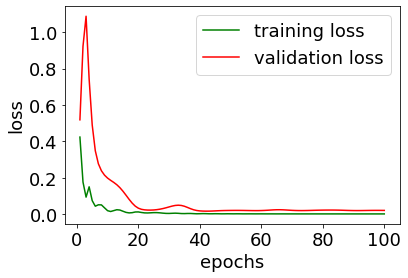

In [184]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [185]:
y_val_pred=eval_rmse(model,X_val_seq,y_val_seq, name='validation')
y_train_pred=eval_rmse(model,X_train_seq,y_train_seq,name='training')

validation RMSE: 1736.3168862
training RMSE: 331.6942481


In [112]:
y_pred=np.concatenate((y_train_pred,y_val_pred),axis=0)

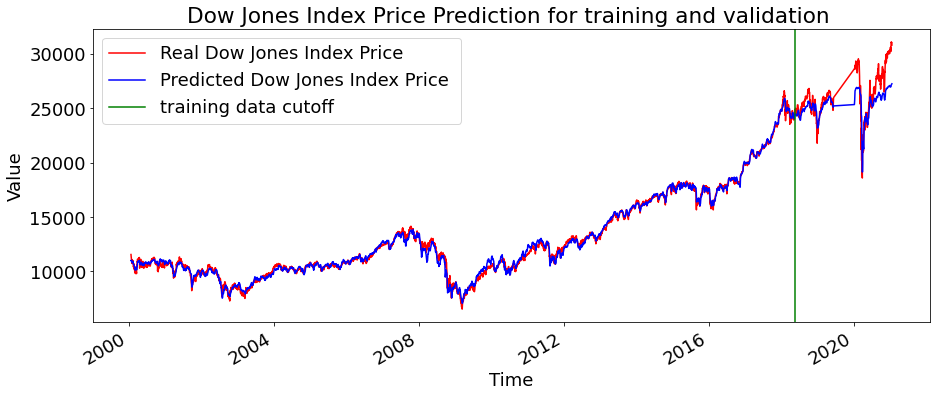

In [113]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones Index Price Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [114]:
modelDJ = LSTM(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ.parameters(), lr=0.01)

epoch 1, train_mse=0.4462142, val_mse=0.3497585
epoch 2, train_mse=0.2555097, val_mse=0.5135875
epoch 3, train_mse=0.0906699, val_mse=0.7688079
epoch 4, train_mse=0.1252112, val_mse=0.6663964
epoch 5, train_mse=0.0952664, val_mse=0.5270472
epoch 6, train_mse=0.0476149, val_mse=0.4180736
epoch 7, train_mse=0.0478485, val_mse=0.3350289
epoch 8, train_mse=0.055963, val_mse=0.2669043
epoch 9, train_mse=0.0508792, val_mse=0.2051853
epoch 10, train_mse=0.033353, val_mse=0.1474306
epoch 11, train_mse=0.0142405, val_mse=0.0970012
epoch 12, train_mse=0.0069965, val_mse=0.0588801
epoch 13, train_mse=0.0141208, val_mse=0.0348502
epoch 14, train_mse=0.0196202, val_mse=0.0231874
epoch 15, train_mse=0.0151884, val_mse=0.0197137
epoch 16, train_mse=0.0097876, val_mse=0.0191923
epoch 17, train_mse=0.0095728, val_mse=0.0196217
epoch 18, train_mse=0.012018, val_mse=0.0226587
epoch 19, train_mse=0.012815, val_mse=0.0299729
epoch 20, train_mse=0.0106789, val_mse=0.0412042
epoch 21, train_mse=0.0070474, va

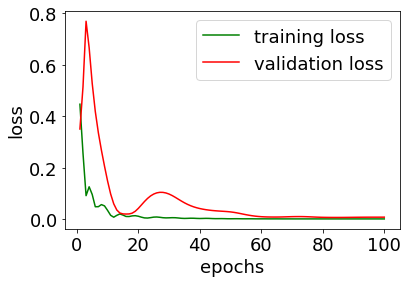

In [115]:
torch.manual_seed(43)
train_model(modelDJ,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [116]:
y_val_predDJ=eval_rmse(modelDJ,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ=eval_rmse(modelDJ,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ=np.concatenate((y_train_predDJ,y_val_predDJ),axis=0)

validation RMSE: 1033.770791
training RMSE: 200.7180345


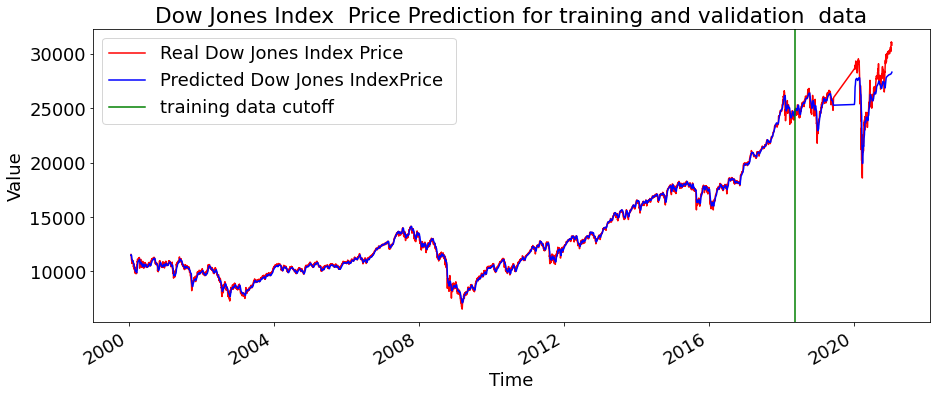

In [117]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_rawDJ.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_rawDJ.index[seq:], y_predDJ, color = 'blue', label = 'Predicted Dow Jones IndexPrice ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones Index  Price Prediction for training and validation  data')
plt.axvline(x = X_bigtrain_rawDJ.index[len(X_train_seqDJ)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [118]:
model1 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.1)

epoch 1, train_mse=0.4234245, val_mse=11.8902664
epoch 2, train_mse=5.7698331, val_mse=1.7989764
epoch 3, train_mse=0.1934895, val_mse=0.6743618
epoch 4, train_mse=3.321249, val_mse=0.0303363
epoch 5, train_mse=0.9733396, val_mse=0.1295163
epoch 6, train_mse=0.5942515, val_mse=0.2247314
epoch 7, train_mse=0.4476115, val_mse=0.3102972
epoch 8, train_mse=0.3632917, val_mse=0.3935302
epoch 9, train_mse=0.3016832, val_mse=0.4844202
epoch 10, train_mse=0.2482947, val_mse=0.588043
epoch 11, train_mse=0.201321, val_mse=0.7052093
epoch 12, train_mse=0.1624334, val_mse=0.8343792
epoch 13, train_mse=0.1332454, val_mse=0.9724174
epoch 14, train_mse=0.1144822, val_mse=1.1145601
epoch 15, train_mse=0.1058548, val_mse=1.2540703
epoch 16, train_mse=0.1060316, val_mse=1.3821738
epoch 17, train_mse=0.1126179, val_mse=1.4892566
epoch 18, train_mse=0.1223595, val_mse=1.5678694
epoch 19, train_mse=0.1318923, val_mse=1.6158673
epoch 20, train_mse=0.1388422, val_mse=1.6366528
epoch 21, train_mse=0.1423785, 

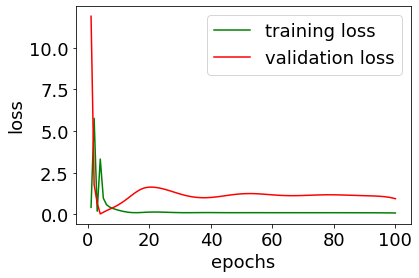

In [119]:
torch.manual_seed(43)
train_model(model1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [120]:
y_val_pred1=eval_rmse(model1,X_val_seq,y_val_seq, name='validation')
y_train_pred1=eval_rmse(model1,X_train_seq,y_train_seq,name='training')
y_pred1=np.concatenate((y_train_pred1,y_val_pred1),axis=0)

validation RMSE: 11929.9001151
training RMSE: 3494.2402754


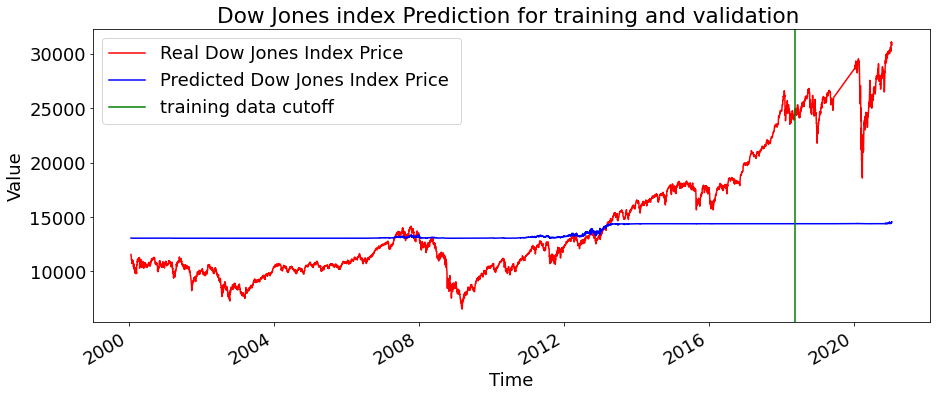

In [121]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred1, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [122]:
modelDJ1 = LSTM(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ1.parameters(), lr=0.1)

epoch 1, train_mse=0.4462142, val_mse=14.2633877
epoch 2, train_mse=9.4467087, val_mse=1.0062978
epoch 3, train_mse=0.1963411, val_mse=0.3024999
epoch 4, train_mse=0.0677455, val_mse=0.9564015
epoch 5, train_mse=0.1024249, val_mse=1.8750192
epoch 6, train_mse=0.1478945, val_mse=0.6112053
epoch 7, train_mse=0.1981055, val_mse=0.7582765
epoch 8, train_mse=0.1181274, val_mse=1.5059922
epoch 9, train_mse=0.1073244, val_mse=0.981177
epoch 10, train_mse=0.2077427, val_mse=0.5101998
epoch 11, train_mse=0.0755799, val_mse=0.5835183
epoch 12, train_mse=0.0563019, val_mse=0.6755602
epoch 13, train_mse=0.0383365, val_mse=0.7143844
epoch 14, train_mse=0.0347144, val_mse=0.2462177
epoch 15, train_mse=0.0358389, val_mse=0.2081913
epoch 16, train_mse=0.0365586, val_mse=0.2267547
epoch 17, train_mse=0.0250212, val_mse=0.2736606
epoch 18, train_mse=0.0279856, val_mse=0.3056958
epoch 19, train_mse=0.0110129, val_mse=0.2244453
epoch 20, train_mse=0.0096079, val_mse=0.1982498
epoch 21, train_mse=0.0113741

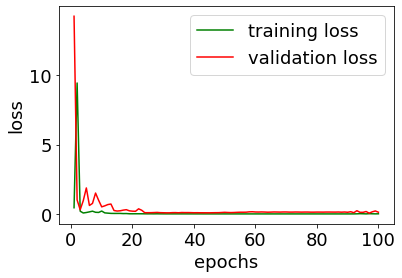

In [123]:
torch.manual_seed(43)
train_model(modelDJ1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [124]:
y_val_predDJ1=eval_rmse(modelDJ1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ1=eval_rmse(modelDJ1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ1=np.concatenate((y_train_predDJ1,y_val_predDJ1),axis=0)

validation RMSE: 4302.4019295
training RMSE: 519.7223414


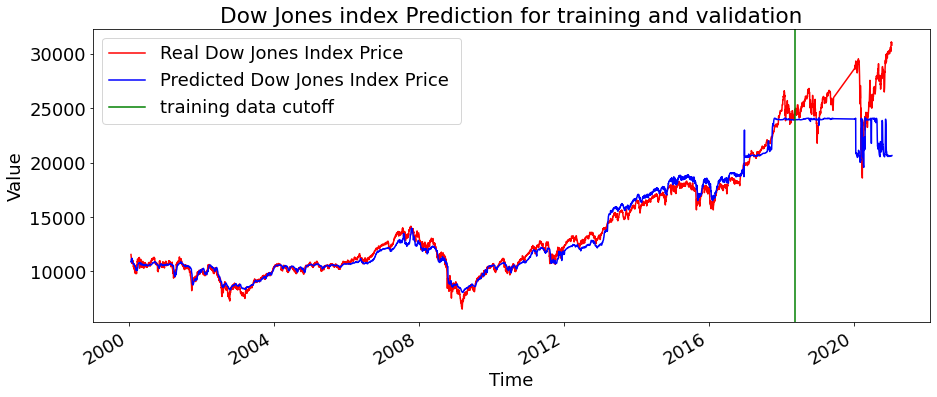

In [125]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_rawDJ.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_rawDJ.index[seq:], y_predDJ1, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation')
plt.axvline(x = X_bigtrain_rawDJ.index[len(X_train_seqDJ)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [126]:
model1_1 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model1_1.parameters(), lr=0.001)

epoch 1, train_mse=0.4234245, val_mse=0.3050576
epoch 2, train_mse=0.3868889, val_mse=0.3244732
epoch 3, train_mse=0.3530312, val_mse=0.3451431
epoch 4, train_mse=0.320941, val_mse=0.3675099
epoch 5, train_mse=0.2901804, val_mse=0.3918394
epoch 6, train_mse=0.2606883, val_mse=0.4183259
epoch 7, train_mse=0.2325494, val_mse=0.4471285
epoch 8, train_mse=0.205913, val_mse=0.4783525
epoch 9, train_mse=0.1809754, val_mse=0.5119986
epoch 10, train_mse=0.1579826, val_mse=0.5479052
epoch 11, train_mse=0.1372329, val_mse=0.5856919
epoch 12, train_mse=0.119077, val_mse=0.6246699
epoch 13, train_mse=0.1039064, val_mse=0.6636753
epoch 14, train_mse=0.0921137, val_mse=0.7008512
epoch 15, train_mse=0.0840013, val_mse=0.7335026
epoch 16, train_mse=0.079628, val_mse=0.7581489
epoch 17, train_mse=0.0785862, val_mse=0.7710571
epoch 18, train_mse=0.0797693, val_mse=0.7695396
epoch 19, train_mse=0.0814047, val_mse=0.7533557
epoch 20, train_mse=0.0816343, val_mse=0.7248083
epoch 21, train_mse=0.0793084, va

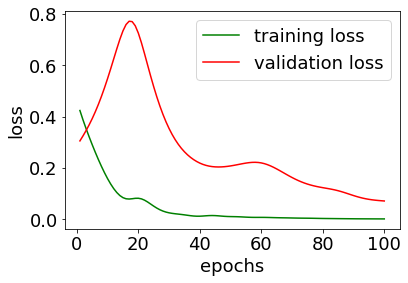

In [127]:
torch.manual_seed(43)
train_model(model1_1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [128]:
y_val_pred1_1=eval_rmse(model1_1,X_val_seq,y_val_seq, name='validation')
y_train_pred1_1=eval_rmse(model1_1,X_train_seq,y_train_seq,name='training')
y_pred1_1=np.concatenate((y_train_pred1_1,y_val_pred1_1),axis=0)

validation RMSE: 3271.4966846
training RMSE: 413.7722099


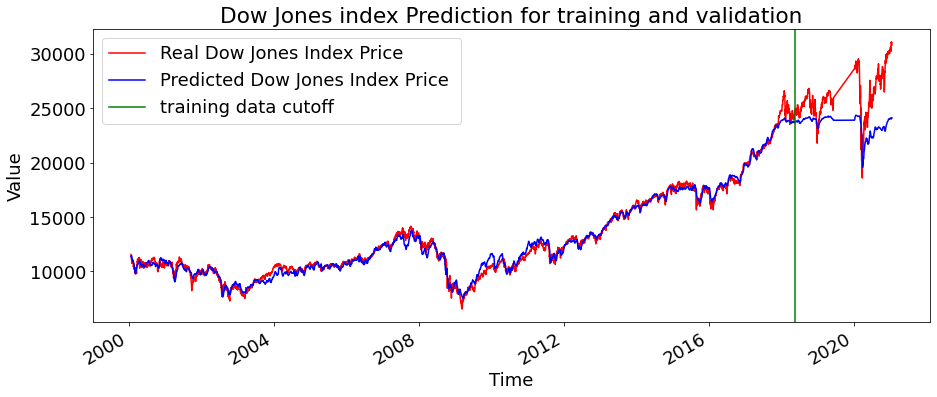

In [129]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_rawDJ.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_rawDJ.index[seq:], y_pred1_1, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation')
plt.axvline(x = X_bigtrain_rawDJ.index[len(X_train_seqDJ)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [130]:
modelDJ1_1 = LSTM(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ1_1.parameters(), lr=0.001)

epoch 1, train_mse=0.4462142, val_mse=0.2433791
epoch 2, train_mse=0.4260065, val_mse=0.2534243
epoch 3, train_mse=0.4060284, val_mse=0.2637925
epoch 4, train_mse=0.386255, val_mse=0.2744909
epoch 5, train_mse=0.3666277, val_mse=0.2855278
epoch 6, train_mse=0.3470611, val_mse=0.2969179
epoch 7, train_mse=0.3274773, val_mse=0.3086815
epoch 8, train_mse=0.3078111, val_mse=0.3208467
epoch 9, train_mse=0.2880058, val_mse=0.3334509
epoch 10, train_mse=0.2680134, val_mse=0.3465362
epoch 11, train_mse=0.2477994, val_mse=0.3601462
epoch 12, train_mse=0.2273489, val_mse=0.3743216
epoch 13, train_mse=0.2066762, val_mse=0.3890994
epoch 14, train_mse=0.1858376, val_mse=0.404511
epoch 15, train_mse=0.1649476, val_mse=0.4205801
epoch 16, train_mse=0.1441994, val_mse=0.4373171
epoch 17, train_mse=0.1238896, val_mse=0.4547068
epoch 18, train_mse=0.1044475, val_mse=0.4726855
epoch 19, train_mse=0.0864651, val_mse=0.4910958
epoch 20, train_mse=0.0707202, val_mse=0.5096021
epoch 21, train_mse=0.0581692, 

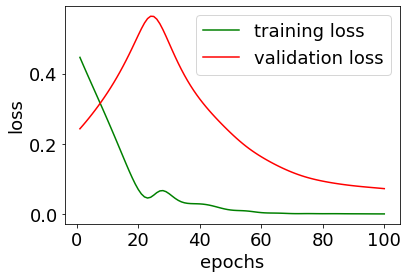

In [131]:
torch.manual_seed(43)
train_model(modelDJ1_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [132]:
y_val_predDJ1_1=eval_rmse(modelDJ1_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ1_1=eval_rmse(modelDJ1_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ1_1=np.concatenate((y_train_predDJ1_1,y_val_predDJ1_1),axis=0)

validation RMSE: 3324.8581808
training RMSE: 482.0078186


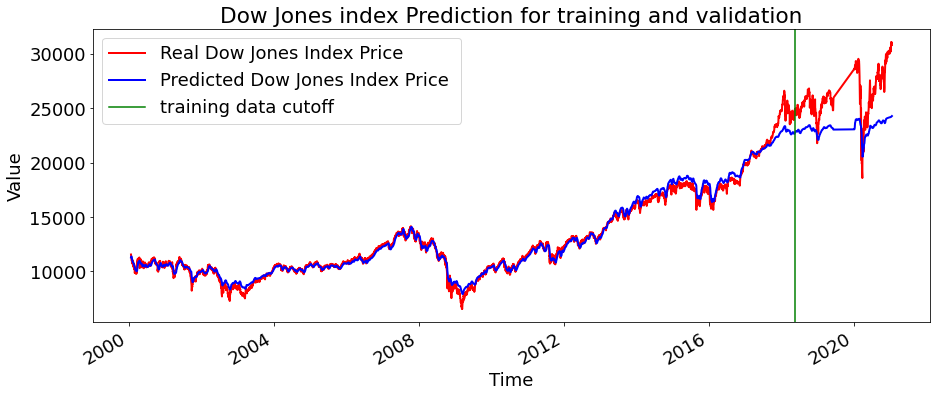

In [133]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_rawDJ.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ',linewidth=2)
axes.plot(X_bigtrain_rawDJ.index[seq:], y_predDJ1_1, color = 'blue', label = 'Predicted Dow Jones Index Price ',linewidth=2)
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation')
plt.axvline(x = X_bigtrain_rawDJ.index[len(X_train_seqDJ)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [134]:
model2 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=1,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)

epoch 1, train_mse=0.3675815, val_mse=0.9939961
epoch 2, train_mse=0.1752689, val_mse=0.7136471
epoch 3, train_mse=0.0921676, val_mse=0.4860286
epoch 4, train_mse=0.0379538, val_mse=0.3542089
epoch 5, train_mse=0.0327408, val_mse=0.2741253
epoch 6, train_mse=0.0361646, val_mse=0.221405
epoch 7, train_mse=0.0348968, val_mse=0.1839382
epoch 8, train_mse=0.0282176, val_mse=0.1552488
epoch 9, train_mse=0.0190729, val_mse=0.1318052
epoch 10, train_mse=0.0108882, val_mse=0.1117781
epoch 11, train_mse=0.0061907, val_mse=0.0943218
epoch 12, train_mse=0.0057476, val_mse=0.0791353
epoch 13, train_mse=0.0082705, val_mse=0.0661931
epoch 14, train_mse=0.0112116, val_mse=0.0555293
epoch 15, train_mse=0.0124002, val_mse=0.0470747
epoch 16, train_mse=0.0112279, val_mse=0.0406037
epoch 17, train_mse=0.0085607, val_mse=0.0357722
epoch 18, train_mse=0.0058299, val_mse=0.0321877
epoch 19, train_mse=0.0041477, val_mse=0.0294684
epoch 20, train_mse=0.0039003, val_mse=0.0272751
epoch 21, train_mse=0.0047494,

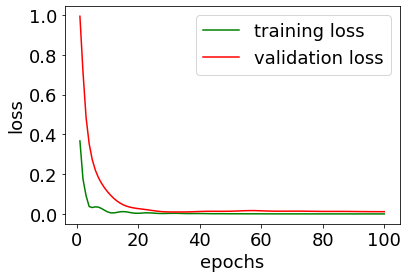

In [135]:
torch.manual_seed(43)
train_model(model2,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [136]:
y_val_pred2=eval_rmse(model2,X_val_seq,y_val_seq, name='validation')
y_train_pred2=eval_rmse(model2,X_train_seq,y_train_seq,name='training')
y_pred2=np.concatenate((y_train_pred2,y_val_pred2),axis=0)

validation RMSE: 1343.7164456
training RMSE: 322.2607694


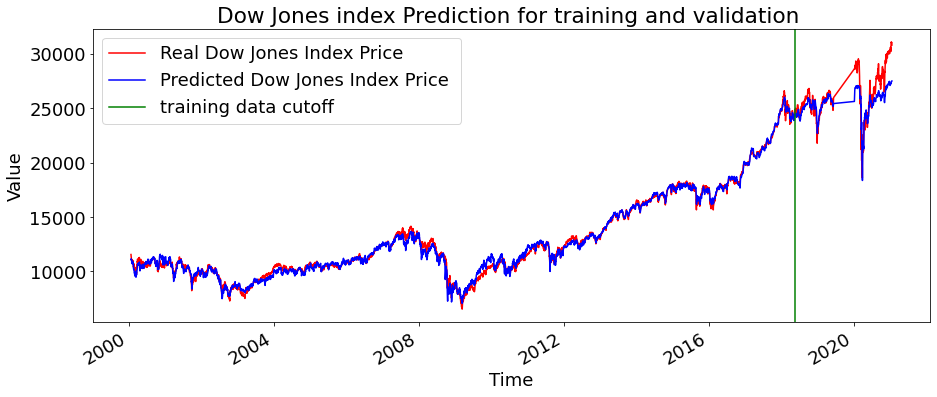

In [137]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred2, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.4585896, val_mse=0.3763309
epoch 2, train_mse=0.306835, val_mse=0.3934565
epoch 3, train_mse=0.1720788, val_mse=0.4133891
epoch 4, train_mse=0.060986, val_mse=0.4359225
epoch 5, train_mse=0.0445006, val_mse=0.4162284
epoch 6, train_mse=0.1015879, val_mse=0.3777292
epoch 7, train_mse=0.0710974, val_mse=0.3405624
epoch 8, train_mse=0.0332039, val_mse=0.3084384
epoch 9, train_mse=0.0220112, val_mse=0.280714
epoch 10, train_mse=0.0279568, val_mse=0.2564305
epoch 11, train_mse=0.0365292, val_mse=0.2349902
epoch 12, train_mse=0.0402736, val_mse=0.2155545
epoch 13, train_mse=0.0375785, val_mse=0.1971278
epoch 14, train_mse=0.0299056, val_mse=0.1788227
epoch 15, train_mse=0.0201559, val_mse=0.160034
epoch 16, train_mse=0.011706, val_mse=0.1405529
epoch 17, train_mse=0.0073538, val_mse=0.1205864
epoch 18, train_mse=0.0079161, val_mse=0.1007672
epoch 19, train_mse=0.0112857, val_mse=0.0819969
epoch 20, train_mse=0.0135689, val_mse=0.065032
epoch 21, train_mse=0.0122002, val_

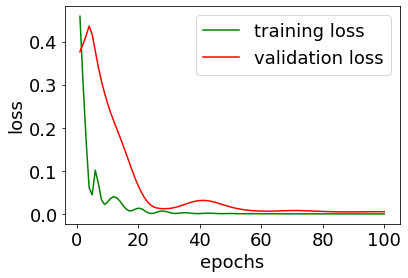

In [138]:
modelDJ2 = LSTM(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ2.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ2,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [139]:
y_val_predDJ2=eval_rmse(modelDJ2,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ2=eval_rmse(modelDJ2,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ2=np.concatenate((y_train_predDJ2,y_val_predDJ2),axis=0)

validation RMSE: 898.9841858
training RMSE: 186.5625798


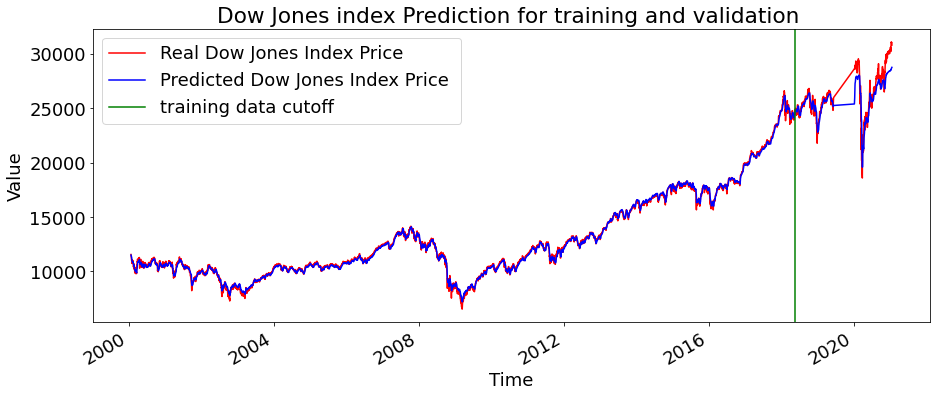

In [140]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ2, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.4678117, val_mse=0.4601734
epoch 2, train_mse=0.2341237, val_mse=0.9147888
epoch 3, train_mse=0.0965443, val_mse=1.5724479
epoch 4, train_mse=0.2324126, val_mse=1.0994877
epoch 5, train_mse=0.1136901, val_mse=0.7607362
epoch 6, train_mse=0.0719452, val_mse=0.5906896
epoch 7, train_mse=0.0837303, val_mse=0.5008373
epoch 8, train_mse=0.093387, val_mse=0.4431467
epoch 9, train_mse=0.0879984, val_mse=0.3945258
epoch 10, train_mse=0.0704744, val_mse=0.3419062
epoch 11, train_mse=0.0479844, val_mse=0.2809745
epoch 12, train_mse=0.0283197, val_mse=0.2194825
epoch 13, train_mse=0.0168921, val_mse=0.1718723
epoch 14, train_mse=0.014601, val_mse=0.1399122
epoch 15, train_mse=0.0195001, val_mse=0.1107439
epoch 16, train_mse=0.0269345, val_mse=0.0767673
epoch 17, train_mse=0.0286632, val_mse=0.0498034
epoch 18, train_mse=0.0242238, val_mse=0.0384049
epoch 19, train_mse=0.0181625, val_mse=0.0379746
epoch 20, train_mse=0.0119024, val_mse=0.043977
epoch 21, train_mse=0.0086215, v

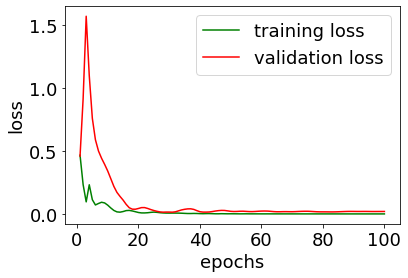

In [141]:
model2_1 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=3,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model2_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model2_1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [142]:
y_val_pred2_1=eval_rmse(model2_1,X_val_seq,y_val_seq, name='validation')
y_train_pred2_1=eval_rmse(model2_1,X_train_seq,y_train_seq,name='training')
y_pred2_1=np.concatenate((y_train_pred2_1,y_val_pred2_1),axis=0)

validation RMSE: 1744.3321256
training RMSE: 320.3344321


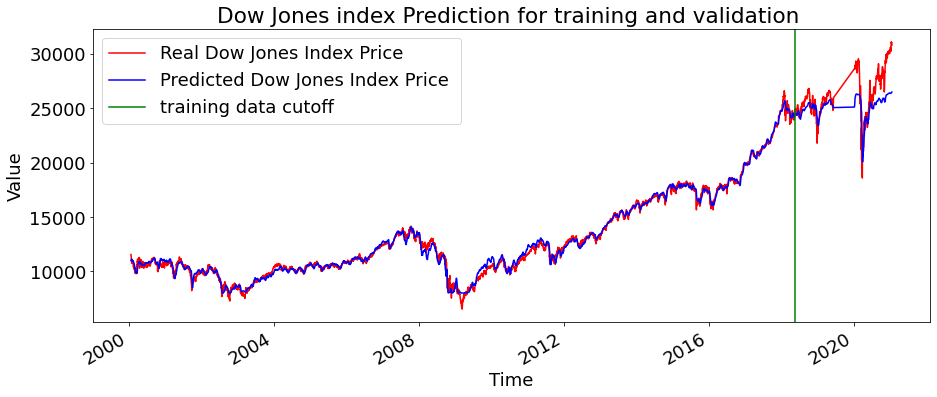

In [143]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred2_1, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3928334, val_mse=0.5087752
epoch 2, train_mse=0.2422016, val_mse=0.8291024
epoch 3, train_mse=0.1149025, val_mse=1.5623856
epoch 4, train_mse=0.1965691, val_mse=1.1694272
epoch 5, train_mse=0.1014466, val_mse=0.8665093
epoch 6, train_mse=0.0854393, val_mse=0.7089352
epoch 7, train_mse=0.1005573, val_mse=0.6266608
epoch 8, train_mse=0.1052309, val_mse=0.5748618
epoch 9, train_mse=0.0936539, val_mse=0.5297213
epoch 10, train_mse=0.0697947, val_mse=0.4776137
epoch 11, train_mse=0.0435476, val_mse=0.4117913
epoch 12, train_mse=0.0316499, val_mse=0.333524
epoch 13, train_mse=0.0383716, val_mse=0.2532082
epoch 14, train_mse=0.0347656, val_mse=0.1791705
epoch 15, train_mse=0.0177082, val_mse=0.1163974
epoch 16, train_mse=0.0094687, val_mse=0.0764874
epoch 17, train_mse=0.0175023, val_mse=0.071149
epoch 18, train_mse=0.0265737, val_mse=0.0916301
epoch 19, train_mse=0.0261525, val_mse=0.1308692
epoch 20, train_mse=0.0198756, val_mse=0.1774331
epoch 21, train_mse=0.0133752, 

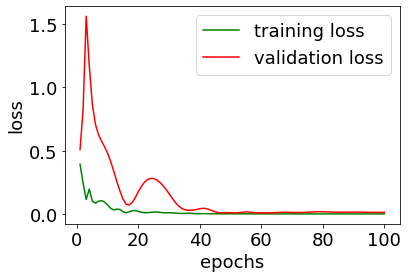

In [144]:
modelDJ2_1 = LSTM(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=3,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ2_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ2_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [145]:
y_val_predDJ2_1=eval_rmse(modelDJ2_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ2_1=eval_rmse(modelDJ2_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ2_1=np.concatenate((y_train_predDJ2_1,y_val_predDJ2_1),axis=0)

validation RMSE: 1392.5889463
training RMSE: 219.2840966


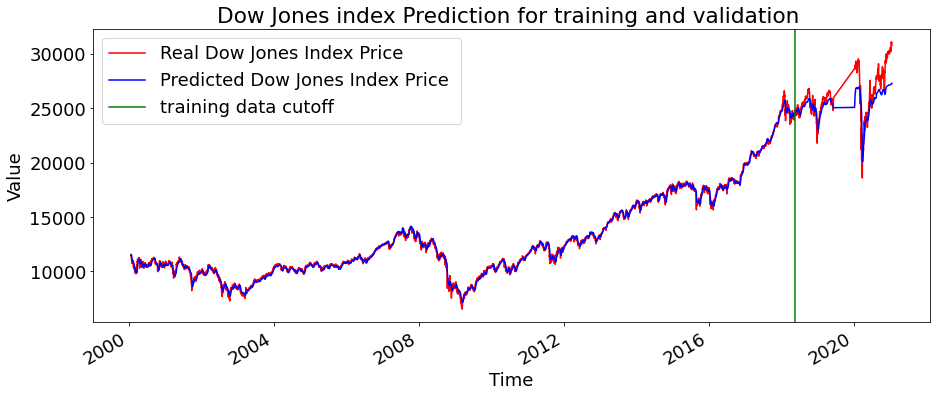

In [146]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ2_1, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3913529, val_mse=0.7481915
epoch 2, train_mse=0.4777805, val_mse=0.3638355
epoch 3, train_mse=0.0765219, val_mse=0.1665653
epoch 4, train_mse=0.0398126, val_mse=0.0883926
epoch 5, train_mse=0.0898121, val_mse=0.0630663
epoch 6, train_mse=0.0982278, val_mse=0.0550334
epoch 7, train_mse=0.0793197, val_mse=0.0529381
epoch 8, train_mse=0.0533289, val_mse=0.0525348
epoch 9, train_mse=0.0300233, val_mse=0.0518731
epoch 10, train_mse=0.0141403, val_mse=0.0500207
epoch 11, train_mse=0.0077699, val_mse=0.0466931
epoch 12, train_mse=0.0099183, val_mse=0.0421766
epoch 13, train_mse=0.0161956, val_mse=0.0372131
epoch 14, train_mse=0.0210023, val_mse=0.0326314
epoch 15, train_mse=0.021315, val_mse=0.0289545
epoch 16, train_mse=0.0177819, val_mse=0.026307
epoch 17, train_mse=0.0128087, val_mse=0.024595
epoch 18, train_mse=0.0085424, val_mse=0.0236402
epoch 19, train_mse=0.0062191, val_mse=0.0232568
epoch 20, train_mse=0.0059089, val_mse=0.0232781
epoch 21, train_mse=0.0069251, v

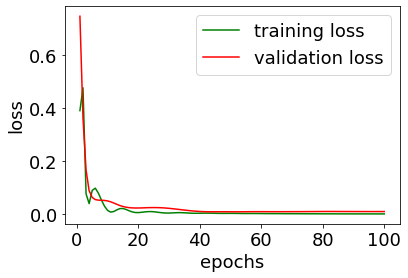

In [148]:
model3 = LSTM(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model3,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [149]:
y_val_pred3=eval_rmse(model3,X_val_seq,y_val_seq, name='validation')
y_train_pred3=eval_rmse(model3,X_train_seq,y_train_seq,name='training')
y_pred3=np.concatenate((y_train_pred3,y_val_pred3),axis=0)

validation RMSE: 1216.6269709
training RMSE: 364.0424919


epoch 1, train_mse=0.3913529, val_mse=36.6862106
epoch 2, train_mse=25.5083447, val_mse=10.4265528
epoch 3, train_mse=6.3848667, val_mse=0.9081391
epoch 4, train_mse=0.0924612, val_mse=0.0467857
epoch 5, train_mse=1.9609874, val_mse=0.3916299
epoch 6, train_mse=3.9577925, val_mse=0.5764008
epoch 7, train_mse=4.517108, val_mse=0.4329867
epoch 8, train_mse=3.7599788, val_mse=0.1847
epoch 9, train_mse=2.6836276, val_mse=0.0428813
epoch 10, train_mse=1.6373395, val_mse=0.1208683
epoch 11, train_mse=0.7508942, val_mse=0.4657995
epoch 12, train_mse=0.2383602, val_mse=1.0417717
epoch 13, train_mse=0.0906179, val_mse=1.7307465
epoch 14, train_mse=0.2352906, val_mse=2.3600488
epoch 15, train_mse=0.5230905, val_mse=2.7885361
epoch 16, train_mse=0.7648632, val_mse=2.9575236
epoch 17, train_mse=0.8894228, val_mse=2.9153061
epoch 18, train_mse=0.8800151, val_mse=2.6953082
epoch 19, train_mse=0.7080138, val_mse=2.3341398
epoch 20, train_mse=0.4833663, val_mse=1.9246858
epoch 21, train_mse=0.2995831,

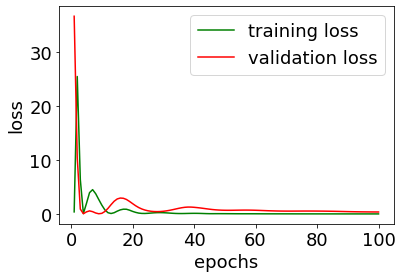

In [164]:
model3_1 = LSTM(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3_1.parameters(), lr=0.1)
torch.manual_seed(43)
train_model(model3_1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [165]:
y_val_pred3_1=eval_rmse(model3_1,X_val_seq,y_val_seq, name='validation')
y_train_pred3_1=eval_rmse(model3_1,X_train_seq,y_train_seq,name='training')
y_pred3_1=np.concatenate((y_train_pred3_1,y_val_pred3_1),axis=0)

validation RMSE: 7468.748087
training RMSE: 1421.8064701


epoch 1, train_mse=0.3913529, val_mse=0.2042142
epoch 2, train_mse=0.2573949, val_mse=0.2361391
epoch 3, train_mse=0.1547285, val_mse=0.2707012
epoch 4, train_mse=0.0838159, val_mse=0.3058183
epoch 5, train_mse=0.0450521, val_mse=0.3363562
epoch 6, train_mse=0.0363129, val_mse=0.3540517
epoch 7, train_mse=0.0486929, val_mse=0.35348
epoch 8, train_mse=0.0656061, val_mse=0.3370149
epoch 9, train_mse=0.0736438, val_mse=0.3104837
epoch 10, train_mse=0.069961, val_mse=0.2792513
epoch 11, train_mse=0.0581564, val_mse=0.2471217
epoch 12, train_mse=0.0432301, val_mse=0.2164272
epoch 13, train_mse=0.0292292, val_mse=0.1884132
epoch 14, train_mse=0.0185635, val_mse=0.1636141
epoch 15, train_mse=0.0120854, val_mse=0.1421411
epoch 16, train_mse=0.0094905, val_mse=0.1238762
epoch 17, train_mse=0.0097973, val_mse=0.1085862
epoch 18, train_mse=0.0117683, val_mse=0.0959838
epoch 19, train_mse=0.0142165, val_mse=0.0857559
epoch 20, train_mse=0.0162021, val_mse=0.0775783
epoch 21, train_mse=0.017137, va

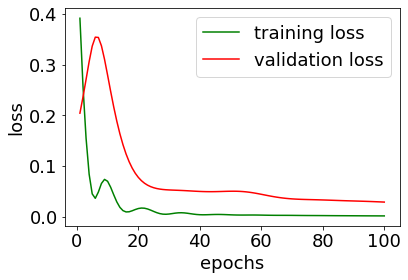

In [166]:
model3_2 = LSTM(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3_2.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(model3_2,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [167]:
y_val_pred3_2=eval_rmse(model3_2,X_val_seq,y_val_seq, name='validation')
y_train_pred3_2=eval_rmse(model3_2,X_train_seq,y_train_seq,name='training')
y_pred3_2=np.concatenate((y_train_pred3_2,y_val_pred3_2),axis=0)

validation RMSE: 2087.0934783
training RMSE: 491.4091932


epoch 1, train_mse=0.264866, val_mse=0.5185028
epoch 2, train_mse=0.2149098, val_mse=0.5487788
epoch 3, train_mse=0.1718937, val_mse=0.5801736
epoch 4, train_mse=0.134383, val_mse=0.6137569
epoch 5, train_mse=0.1021847, val_mse=0.6497851
epoch 6, train_mse=0.0768409, val_mse=0.6859481
epoch 7, train_mse=0.0615174, val_mse=0.7138962
epoch 8, train_mse=0.059225, val_mse=0.7195075
epoch 9, train_mse=0.0668448, val_mse=0.6986806
epoch 10, train_mse=0.0719693, val_mse=0.6613538
epoch 11, train_mse=0.0673224, val_mse=0.6176344
epoch 12, train_mse=0.0561295, val_mse=0.5734712
epoch 13, train_mse=0.0441147, val_mse=0.53157
epoch 14, train_mse=0.0349383, val_mse=0.4927248
epoch 15, train_mse=0.029535, val_mse=0.4568529
epoch 16, train_mse=0.0270329, val_mse=0.4236563
epoch 17, train_mse=0.025891, val_mse=0.3928955
epoch 18, train_mse=0.0246814, val_mse=0.3643807
epoch 19, train_mse=0.0224824, val_mse=0.3379061
epoch 20, train_mse=0.0190409, val_mse=0.3132391
epoch 21, train_mse=0.014811, val_ms

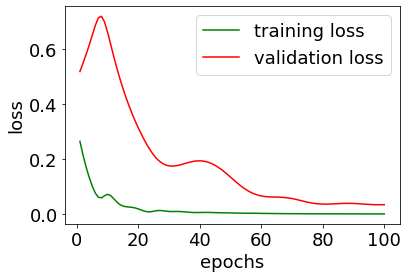

In [96]:
model3_3 = LSTM(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=2,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3_3.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(model3_3,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [97]:
y_val_pred3_3=eval_rmse(model3_3,X_val_seq,y_val_seq, name='validation')
y_train_pred3_3=eval_rmse(model3_3,X_train_seq,y_train_seq,name='training')
y_pred3_3=np.concatenate((y_train_pred3_3,y_val_pred3_3),axis=0)

validation RMSE: 2278.8732359
training RMSE: 358.1827172


epoch 1, train_mse=0.1956069, val_mse=0.7420748
epoch 2, train_mse=0.0972018, val_mse=0.8360165
epoch 3, train_mse=0.0705922, val_mse=0.8199917
epoch 4, train_mse=0.0788932, val_mse=0.7179581
epoch 5, train_mse=0.0719, val_mse=0.5930037
epoch 6, train_mse=0.0504225, val_mse=0.4736274
epoch 7, train_mse=0.0297197, val_mse=0.3697498
epoch 8, train_mse=0.0177805, val_mse=0.2840757
epoch 9, train_mse=0.0146415, val_mse=0.216769
epoch 10, train_mse=0.0159795, val_mse=0.1667451
epoch 11, train_mse=0.0168591, val_mse=0.1315535
epoch 12, train_mse=0.0148736, val_mse=0.1078618
epoch 13, train_mse=0.0111798, val_mse=0.0925027
epoch 14, train_mse=0.0088766, val_mse=0.0830623
epoch 15, train_mse=0.0098812, val_mse=0.077764
epoch 16, train_mse=0.0125781, val_mse=0.0752089
epoch 17, train_mse=0.0136544, val_mse=0.0743475
epoch 18, train_mse=0.0119404, val_mse=0.0745517
epoch 19, train_mse=0.0087815, val_mse=0.0755367
epoch 20, train_mse=0.0060512, val_mse=0.0772057
epoch 21, train_mse=0.0046966, val

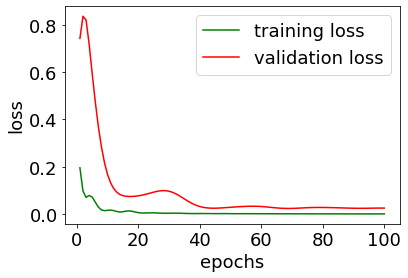

In [100]:
model3_4 = LSTM(input_dim=input_dim, hidden_dim=128, output_dim=output_dim, num_layers=1,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3_4.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(model3_4,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [101]:
y_val_pred3_4=eval_rmse(model3_4,X_val_seq,y_val_seq, name='validation')
y_train_pred3_4=eval_rmse(model3_4,X_train_seq,y_train_seq,name='training')
y_pred3_4=np.concatenate((y_train_pred3_4,y_val_pred3_4),axis=0)

validation RMSE: 1959.3934196
training RMSE: 344.6560821


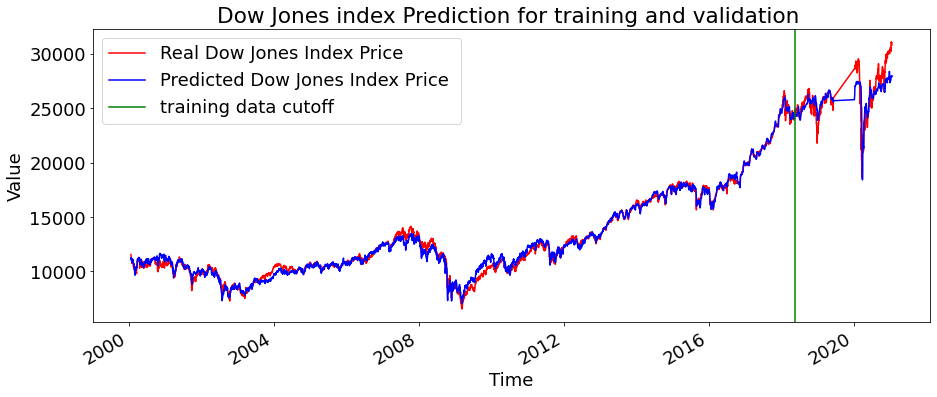

In [150]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred3, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2350132, val_mse=0.617908
epoch 2, train_mse=0.0993192, val_mse=0.6833097
epoch 3, train_mse=0.0646486, val_mse=0.600747
epoch 4, train_mse=0.0624334, val_mse=0.5228882
epoch 5, train_mse=0.0412891, val_mse=0.4548281
epoch 6, train_mse=0.0408651, val_mse=0.3893073
epoch 7, train_mse=0.0381741, val_mse=0.3222844
epoch 8, train_mse=0.0284015, val_mse=0.2519616
epoch 9, train_mse=0.0164169, val_mse=0.1799811
epoch 10, train_mse=0.0131155, val_mse=0.1139616
epoch 11, train_mse=0.0140633, val_mse=0.0645799
epoch 12, train_mse=0.0035315, val_mse=0.0259839
epoch 13, train_mse=0.0020443, val_mse=0.0057367
epoch 14, train_mse=0.0078098, val_mse=0.0140947
epoch 15, train_mse=0.0079879, val_mse=0.0250543
epoch 16, train_mse=0.0049233, val_mse=0.0169985
epoch 17, train_mse=0.005547, val_mse=0.0058292
epoch 18, train_mse=0.0043736, val_mse=0.0071524
epoch 19, train_mse=0.0008704, val_mse=0.0194372
epoch 20, train_mse=0.0006797, val_mse=0.0340676
epoch 21, train_mse=0.0024938, v

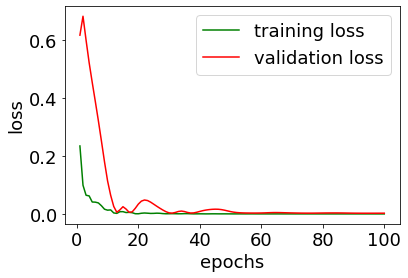

In [170]:
modelDJ3 = LSTM(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ3.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ3,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [171]:
y_val_predDJ3_1=eval_rmse(modelDJ3,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ3_1=eval_rmse(modelDJ3,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ3_1=np.concatenate((y_train_predDJ3,y_val_predDJ3),axis=0)

validation RMSE: 637.022521
training RMSE: 156.4808948


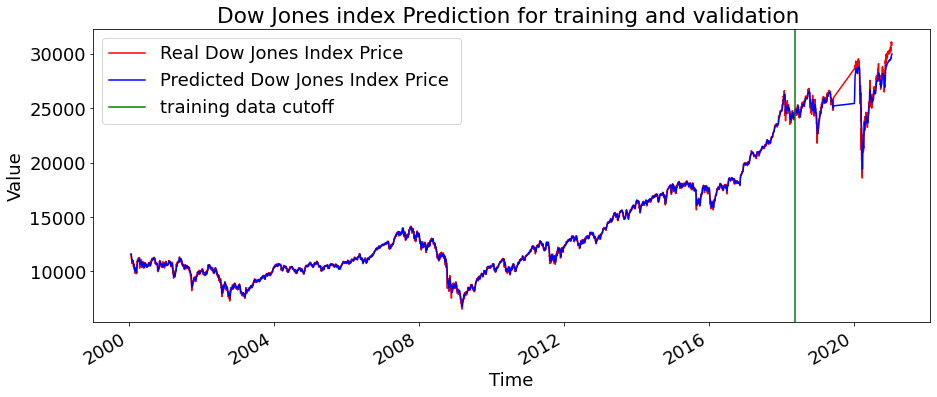

In [153]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ3, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2350132, val_mse=0.5583354
epoch 2, train_mse=0.2178341, val_mse=0.5647516
epoch 3, train_mse=0.2014873, val_mse=0.571144
epoch 4, train_mse=0.1858637, val_mse=0.5774726
epoch 5, train_mse=0.1708628, val_mse=0.5837373
epoch 6, train_mse=0.1564131, val_mse=0.5899234
epoch 7, train_mse=0.1424723, val_mse=0.5960236
epoch 8, train_mse=0.1290224, val_mse=0.6020348
epoch 9, train_mse=0.116076, val_mse=0.6079401
epoch 10, train_mse=0.1036851, val_mse=0.6136996
epoch 11, train_mse=0.0919518, val_mse=0.6192476
epoch 12, train_mse=0.0810413, val_mse=0.6244817
epoch 13, train_mse=0.0711966, val_mse=0.6292332
epoch 14, train_mse=0.0627523, val_mse=0.6332089
epoch 15, train_mse=0.0561354, val_mse=0.6358876
epoch 16, train_mse=0.0518198, val_mse=0.6364162
epoch 17, train_mse=0.0501689, val_mse=0.6337433
epoch 18, train_mse=0.0511001, val_mse=0.6271844
epoch 19, train_mse=0.0537002, val_mse=0.616961
epoch 20, train_mse=0.0562866, val_mse=0.6040744
epoch 21, train_mse=0.0572698, v

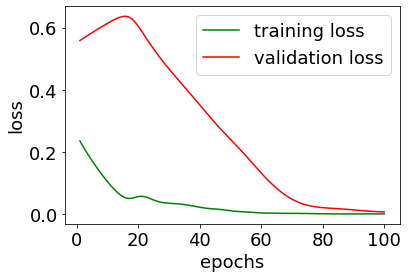

In [158]:
modelDJ3_1 = LSTM(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ3_1.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(modelDJ3_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [159]:
y_val_predDJ3_1=eval_rmse(modelDJ3_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ3_1=eval_rmse(modelDJ3_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ3_1=np.concatenate((y_train_predDJ3_1,y_val_predDJ3_1),axis=0)

validation RMSE: 1010.5404785
training RMSE: 246.033287


epoch 1, train_mse=0.2350132, val_mse=17.2132912
epoch 2, train_mse=19.8019428, val_mse=0.4427217
epoch 3, train_mse=0.4528126, val_mse=1.4761684
epoch 4, train_mse=0.6107463, val_mse=0.2637699
epoch 5, train_mse=0.8985342, val_mse=0.9445974
epoch 6, train_mse=1.6645001, val_mse=1.2924311
epoch 7, train_mse=0.2150791, val_mse=1.4668183
epoch 8, train_mse=0.7639866, val_mse=0.4481978
epoch 9, train_mse=0.1453248, val_mse=0.9133415
epoch 10, train_mse=0.6154559, val_mse=0.4790137
epoch 11, train_mse=0.2732629, val_mse=0.9871883
epoch 12, train_mse=0.1488176, val_mse=0.8366802
epoch 13, train_mse=0.2036134, val_mse=0.6676207
epoch 14, train_mse=0.1748497, val_mse=0.5361415
epoch 15, train_mse=4.4355059, val_mse=1.8132458
epoch 16, train_mse=0.219075, val_mse=1.0391901
epoch 17, train_mse=0.2664577, val_mse=1.0380727
epoch 18, train_mse=0.2065831, val_mse=0.5857257
epoch 19, train_mse=0.1539542, val_mse=0.7269
epoch 20, train_mse=0.1275392, val_mse=0.8521442
epoch 21, train_mse=0.1071287, 

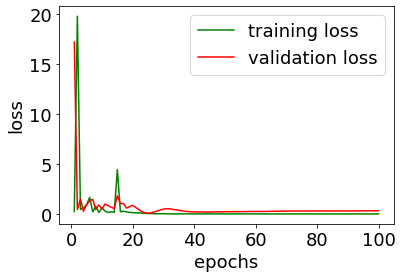

In [160]:
modelDJ3_2 = LSTM(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ3_2.parameters(), lr=0.1)
torch.manual_seed(43)
train_model(modelDJ3_2,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [161]:
y_val_predDJ3_2=eval_rmse(modelDJ3_2,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ3_2=eval_rmse(modelDJ3_2,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ3_2=np.concatenate((y_train_predDJ3_2,y_val_predDJ3_2),axis=0)

validation RMSE: 6925.0157583
training RMSE: 210.8165342


epoch 1, train_mse=0.2837744, val_mse=0.7299886
epoch 2, train_mse=0.1036015, val_mse=1.3948448
epoch 3, train_mse=0.4348888, val_mse=0.8306757
epoch 4, train_mse=0.0705919, val_mse=0.6340182
epoch 5, train_mse=0.121856, val_mse=0.5589848
epoch 6, train_mse=0.1575998, val_mse=0.5275578
epoch 7, train_mse=0.1678377, val_mse=0.5141565
epoch 8, train_mse=0.1634301, val_mse=0.5078136
epoch 9, train_mse=0.1499681, val_mse=0.5014306
epoch 10, train_mse=0.1296598, val_mse=0.4875154
epoch 11, train_mse=0.1033804, val_mse=0.4563517
epoch 12, train_mse=0.0731586, val_mse=0.3971863
epoch 13, train_mse=0.0474225, val_mse=0.3058613
epoch 14, train_mse=0.0472579, val_mse=0.1992196
epoch 15, train_mse=0.067146, val_mse=0.1073024
epoch 16, train_mse=0.054963, val_mse=0.0434356
epoch 17, train_mse=0.0306358, val_mse=0.0143299
epoch 18, train_mse=0.0168286, val_mse=0.018794
epoch 19, train_mse=0.0156123, val_mse=0.0325111
epoch 20, train_mse=0.0208674, val_mse=0.0295134
epoch 21, train_mse=0.0253688, va

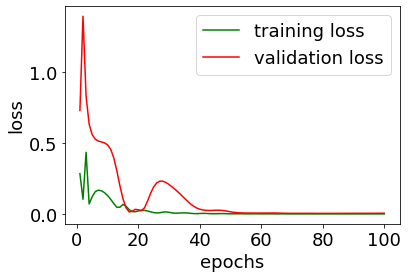

In [162]:
modelDJ3_3 = LSTM(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=2,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ3_3.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ3_3,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [163]:
y_val_predDJ3_3=eval_rmse(modelDJ3_3,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ3_3=eval_rmse(modelDJ3_3,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ3_3=np.concatenate((y_train_predDJ3_3,y_val_predDJ3_3),axis=0)

validation RMSE: 877.3822699
training RMSE: 200.0235796


epoch 1, train_mse=0.3712887, val_mse=0.4064063
epoch 2, train_mse=0.099672, val_mse=0.5820526
epoch 3, train_mse=0.675064, val_mse=0.4186327
epoch 4, train_mse=0.0589664, val_mse=0.365612
epoch 5, train_mse=0.1625604, val_mse=0.3396439
epoch 6, train_mse=0.2089781, val_mse=0.3231284
epoch 7, train_mse=0.2227012, val_mse=0.3098934
epoch 8, train_mse=0.2175883, val_mse=0.2964205
epoch 9, train_mse=0.1987565, val_mse=0.2798188
epoch 10, train_mse=0.1670493, val_mse=0.2572117
epoch 11, train_mse=0.1210903, val_mse=0.2253306
epoch 12, train_mse=0.0624497, val_mse=0.1820958
epoch 13, train_mse=0.0235425, val_mse=0.1342636
epoch 14, train_mse=0.1138135, val_mse=0.1126073
epoch 15, train_mse=0.0572015, val_mse=0.1013383
epoch 16, train_mse=0.0211444, val_mse=0.0910904
epoch 17, train_mse=0.0233537, val_mse=0.0770547
epoch 18, train_mse=0.0334618, val_mse=0.0580729
epoch 19, train_mse=0.0397251, val_mse=0.0358089
epoch 20, train_mse=0.0399163, val_mse=0.0150038
epoch 21, train_mse=0.0348404, v

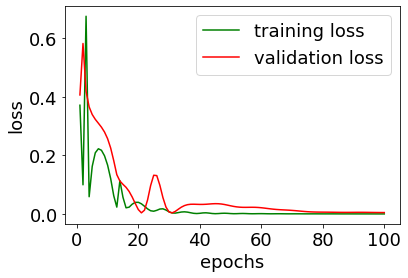

In [98]:
modelDJ3_4 = LSTM(input_dim=input_dimDJ, hidden_dim=128, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ3_4.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ3_4,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [99]:
y_val_predDJ3_4=eval_rmse(modelDJ3_4,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ3_4=eval_rmse(modelDJ3_4,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ3_4=np.concatenate((y_train_predDJ3_4,y_val_predDJ3_4),axis=0)

validation RMSE: 862.5142191
training RMSE: 211.1519022


epoch 1, train_mse=0.3353729, val_mse=0.2935004
epoch 2, train_mse=0.0926829, val_mse=0.4145593
epoch 3, train_mse=0.0470498, val_mse=0.4273726
epoch 4, train_mse=0.0821662, val_mse=0.3582103
epoch 5, train_mse=0.0779762, val_mse=0.2833522
epoch 6, train_mse=0.0478041, val_mse=0.230962
epoch 7, train_mse=0.0221742, val_mse=0.1992334
epoch 8, train_mse=0.0123139, val_mse=0.1797612
epoch 9, train_mse=0.014453, val_mse=0.1668323
epoch 10, train_mse=0.0202337, val_mse=0.1575862
epoch 11, train_mse=0.0232615, val_mse=0.1505743
epoch 12, train_mse=0.0215227, val_mse=0.1450781
epoch 13, train_mse=0.0166838, val_mse=0.1408283
epoch 14, train_mse=0.0116769, val_mse=0.1378517
epoch 15, train_mse=0.0087279, val_mse=0.1363319
epoch 16, train_mse=0.0083888, val_mse=0.1363994
epoch 17, train_mse=0.0096275, val_mse=0.1379154
epoch 18, train_mse=0.0107686, val_mse=0.1404157
epoch 19, train_mse=0.0106337, val_mse=0.1432422
epoch 20, train_mse=0.0091351, val_mse=0.145719
epoch 21, train_mse=0.0070939, v

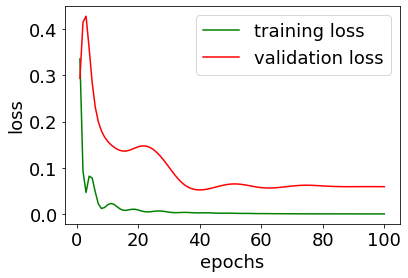

In [133]:
model4 = LSTM(input_dim=input_dim, hidden_dim=16, output_dim=output_dim, num_layers=1,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model4,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [134]:
y_val_pred4=eval_rmse(model4,X_val_seq,y_val_seq, name='validation')
y_train_pred4=eval_rmse(model4,X_train_seq,y_train_seq,name='training')
y_pred4=np.concatenate((y_train_pred4,y_val_pred4),axis=0)

validation RMSE: 2994.7820652
training RMSE: 321.5674229


epoch 1, train_mse=0.5643538, val_mse=0.2800352
epoch 2, train_mse=0.4057131, val_mse=0.3681992
epoch 3, train_mse=0.2756678, val_mse=0.4679708
epoch 4, train_mse=0.1774156, val_mse=0.5706498
epoch 5, train_mse=0.1156694, val_mse=0.6367118
epoch 6, train_mse=0.086079, val_mse=0.6276008
epoch 7, train_mse=0.0780525, val_mse=0.5464174
epoch 8, train_mse=0.0749982, val_mse=0.4302274
epoch 9, train_mse=0.0600198, val_mse=0.3335518
epoch 10, train_mse=0.0358061, val_mse=0.2695876
epoch 11, train_mse=0.014763, val_mse=0.2268293
epoch 12, train_mse=0.0181517, val_mse=0.2028905
epoch 13, train_mse=0.0251467, val_mse=0.1931994
epoch 14, train_mse=0.0217805, val_mse=0.1923521
epoch 15, train_mse=0.0154698, val_mse=0.1963981
epoch 16, train_mse=0.0127759, val_mse=0.2022959
epoch 17, train_mse=0.0123735, val_mse=0.2076037
epoch 18, train_mse=0.0124561, val_mse=0.2102827
epoch 19, train_mse=0.0117766, val_mse=0.2090639
epoch 20, train_mse=0.0104639, val_mse=0.2035763
epoch 21, train_mse=0.0095237, 

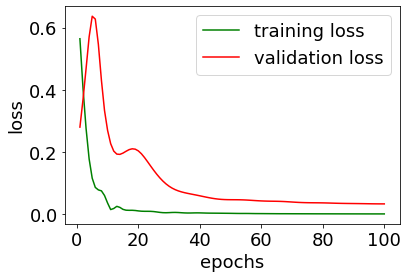

In [172]:
model4_1 = LSTM(input_dim=input_dim, hidden_dim=16, output_dim=output_dim, num_layers=2,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model4_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model4_1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [174]:
y_val_pred4_1=eval_rmse(model4_1,X_val_seq,y_val_seq, name='validation')
y_train_pred4_1=eval_rmse(model4_1,X_train_seq,y_train_seq,name='training')
y_pred4_1=np.concatenate((y_train_pred4_1,y_val_pred4_1),axis=0)

validation RMSE: 2230.9710244
training RMSE: 342.9959298


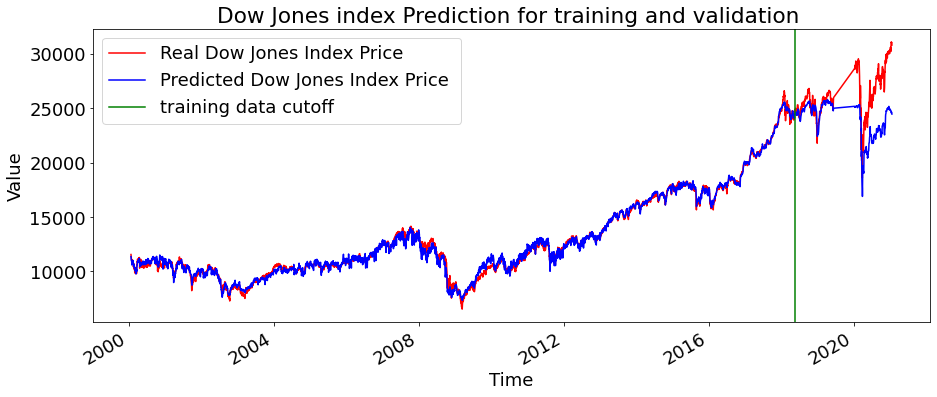

In [135]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred4, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2259007, val_mse=0.4199662
epoch 2, train_mse=0.1658396, val_mse=0.4462717
epoch 3, train_mse=0.1189742, val_mse=0.4692735
epoch 4, train_mse=0.0821083, val_mse=0.4889481
epoch 5, train_mse=0.0555297, val_mse=0.50115
epoch 6, train_mse=0.0429424, val_mse=0.4962888
epoch 7, train_mse=0.0484302, val_mse=0.4665229
epoch 8, train_mse=0.0606938, val_mse=0.4239426
epoch 9, train_mse=0.0600118, val_mse=0.3785373
epoch 10, train_mse=0.0489524, val_mse=0.333138
epoch 11, train_mse=0.0365583, val_mse=0.2880629
epoch 12, train_mse=0.0276561, val_mse=0.2432715
epoch 13, train_mse=0.0228154, val_mse=0.1991104
epoch 14, train_mse=0.0207144, val_mse=0.1563672
epoch 15, train_mse=0.0197673, val_mse=0.1161855
epoch 16, train_mse=0.0187428, val_mse=0.0800104
epoch 17, train_mse=0.0168938, val_mse=0.0495105
epoch 18, train_mse=0.0139566, val_mse=0.0263819
epoch 19, train_mse=0.0101457, val_mse=0.0119542
epoch 20, train_mse=0.0061425, val_mse=0.0065247
epoch 21, train_mse=0.0030043, v

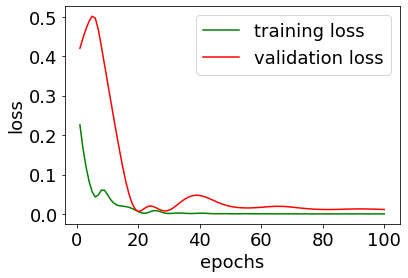

In [175]:
modelDJ4 = LSTM(input_dim=input_dimDJ, hidden_dim=16, output_dim=output_dim, num_layers=1,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ4.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ4,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [177]:
y_val_predDJ4=eval_rmse(modelDJ4,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ4=eval_rmse(modelDJ4,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ4=np.concatenate((y_train_predDJ4,y_val_predDJ4),axis=0)

validation RMSE: 1314.6771796
training RMSE: 191.5486707


epoch 1, train_mse=0.4298827, val_mse=0.3492656
epoch 2, train_mse=0.3567297, val_mse=0.4345079
epoch 3, train_mse=0.2879512, val_mse=0.5456223
epoch 4, train_mse=0.2152148, val_mse=0.7007914
epoch 5, train_mse=0.1414584, val_mse=0.9247801
epoch 6, train_mse=0.0899445, val_mse=1.2140127
epoch 7, train_mse=0.1142721, val_mse=1.2353201
epoch 8, train_mse=0.1354339, val_mse=1.1019237
epoch 9, train_mse=0.1118501, val_mse=0.940936
epoch 10, train_mse=0.0832098, val_mse=0.8006802
epoch 11, train_mse=0.0684613, val_mse=0.6902698
epoch 12, train_mse=0.0656608, val_mse=0.6052856
epoch 13, train_mse=0.067086, val_mse=0.5384872
epoch 14, train_mse=0.0668982, val_mse=0.4834827
epoch 15, train_mse=0.0623369, val_mse=0.4356789
epoch 16, train_mse=0.0530158, val_mse=0.392323
epoch 17, train_mse=0.0403197, val_mse=0.3516981
epoch 18, train_mse=0.0272693, val_mse=0.3131063
epoch 19, train_mse=0.0180501, val_mse=0.2771018
epoch 20, train_mse=0.0156046, val_mse=0.2447969
epoch 21, train_mse=0.0178283, v

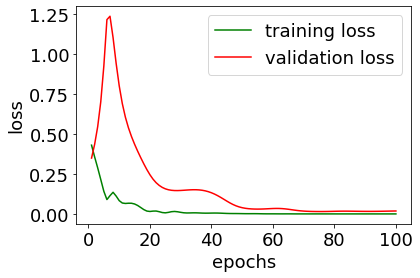

In [179]:
modelDJ4_1 = LSTM(input_dim=input_dimDJ, hidden_dim=16, output_dim=output_dim, num_layers=2,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ4_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ4_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [180]:
y_val_predDJ4_1=eval_rmse(modelDJ4_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ4_1=eval_rmse(modelDJ4_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ4_1=np.concatenate((y_train_predDJ4_1,y_val_predDJ4_1),axis=0)

validation RMSE: 1672.9311329
training RMSE: 207.7184621


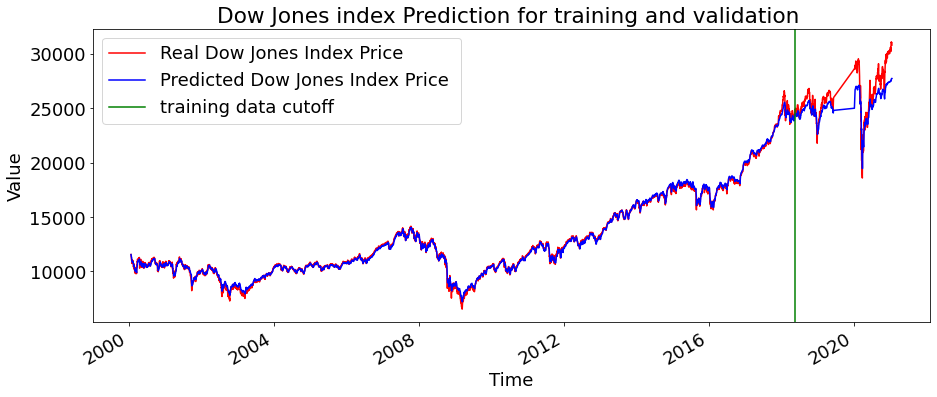

In [138]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ4, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [79]:
class LSTM1(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,device=device,batch_size=32,dropout=0.2):
        super(LSTM1, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.device=device
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True,dropout =dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.batch_size=batch_size

    def forward(self, x):
        batch_size = len(x)
    
        # This makes the model not break for the last batch that might be less
        # than batch_size in size
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        h0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()
        h0=h0.to(device)
        c0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()
        c0=c0.to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

epoch 1, train_mse=0.4238064, val_mse=0.5171813
epoch 2, train_mse=0.1779795, val_mse=0.9116381
epoch 3, train_mse=0.0935703, val_mse=1.1039047
epoch 4, train_mse=0.154135, val_mse=0.7588241
epoch 5, train_mse=0.0769836, val_mse=0.5041964
epoch 6, train_mse=0.044152, val_mse=0.3581122
epoch 7, train_mse=0.0519234, val_mse=0.2846402
epoch 8, train_mse=0.0528907, val_mse=0.2439114
epoch 9, train_mse=0.0382856, val_mse=0.2212206
epoch 10, train_mse=0.0215579, val_mse=0.2030351
epoch 11, train_mse=0.0150005, val_mse=0.1912593
epoch 12, train_mse=0.0184691, val_mse=0.1816525
epoch 13, train_mse=0.0241367, val_mse=0.1690956
epoch 14, train_mse=0.0242339, val_mse=0.1513613
epoch 15, train_mse=0.0184757, val_mse=0.1335357
epoch 16, train_mse=0.0121972, val_mse=0.1109825
epoch 17, train_mse=0.008493, val_mse=0.0890899
epoch 18, train_mse=0.0079904, val_mse=0.0696432
epoch 19, train_mse=0.0108589, val_mse=0.0514077
epoch 20, train_mse=0.0130398, val_mse=0.0374091
epoch 21, train_mse=0.0118488, v

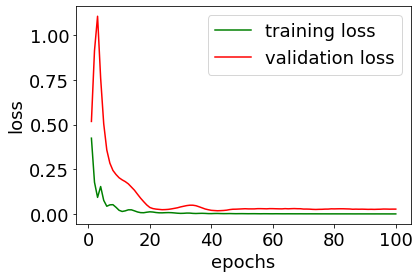

In [88]:
model5 = LSTM1(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model5.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model5,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [89]:
y_val_pred5=eval_rmse(model5,X_val_seq,y_val_seq, name='validation')
y_train_pred5=eval_rmse(model5,X_train_seq,y_train_seq,name='training')
y_pred5=np.concatenate((y_train_pred5,y_val_pred5),axis=0)

validation RMSE: 2048.9294315
training RMSE: 456.1244165


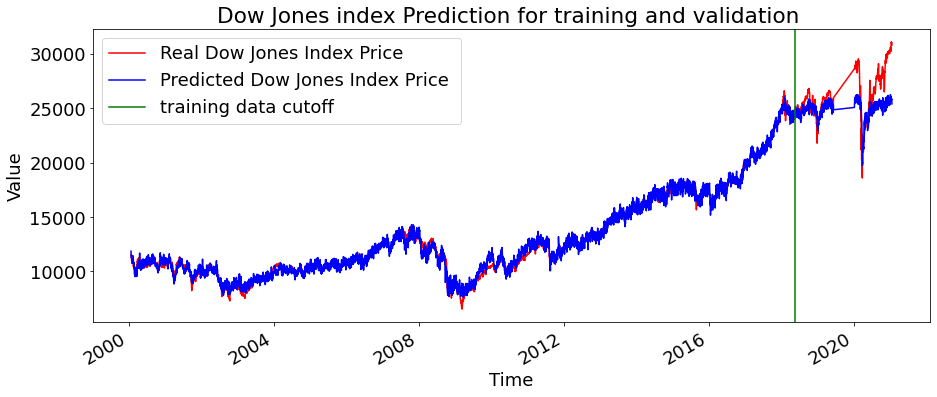

In [142]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred5, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3089004, val_mse=0.579051
epoch 2, train_mse=0.1602048, val_mse=0.764469
epoch 3, train_mse=0.0795806, val_mse=0.9797764
epoch 4, train_mse=0.1053663, val_mse=0.9086546
epoch 5, train_mse=0.0884338, val_mse=0.7960199
epoch 6, train_mse=0.0640406, val_mse=0.7001762
epoch 7, train_mse=0.0620774, val_mse=0.6203573
epoch 8, train_mse=0.0636655, val_mse=0.5525746
epoch 9, train_mse=0.0583613, val_mse=0.479642
epoch 10, train_mse=0.0445793, val_mse=0.4052558
epoch 11, train_mse=0.0282397, val_mse=0.3190308
epoch 12, train_mse=0.0204489, val_mse=0.2345717
epoch 13, train_mse=0.023183, val_mse=0.1589353
epoch 14, train_mse=0.0160329, val_mse=0.1007454
epoch 15, train_mse=0.0043986, val_mse=0.0594013
epoch 16, train_mse=0.0062179, val_mse=0.0400634
epoch 17, train_mse=0.0162945, val_mse=0.0363598
epoch 18, train_mse=0.0161814, val_mse=0.0395927
epoch 19, train_mse=0.0094714, val_mse=0.0511648
epoch 20, train_mse=0.0052795, val_mse=0.0668293
epoch 21, train_mse=0.0059096, va

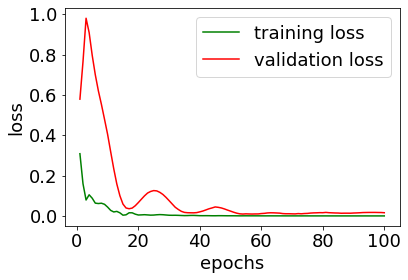

In [143]:
modelDJ5 = LSTM1(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ5.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ5,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [144]:
y_val_predDJ5=eval_rmse(modelDJ5,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ5=eval_rmse(modelDJ5,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ5=np.concatenate((y_train_predDJ5,y_val_predDJ5),axis=0)

validation RMSE: 1577.9690648
training RMSE: 335.722646


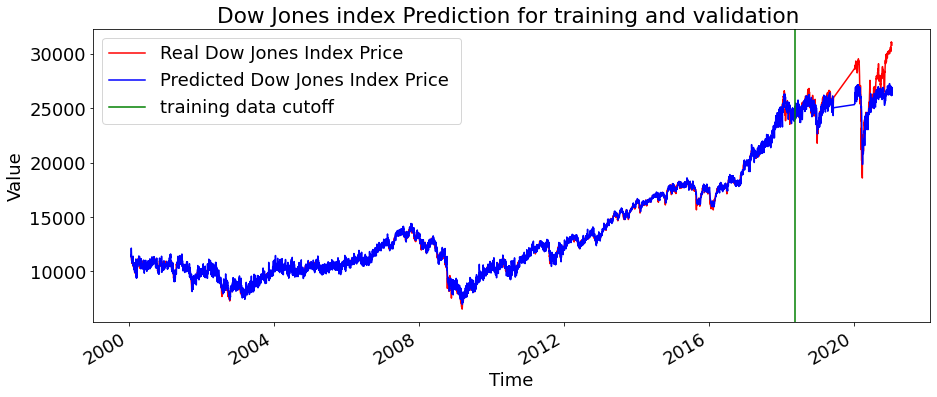

In [145]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ5, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2651337, val_mse=0.8679848
epoch 2, train_mse=0.0993882, val_mse=0.5269458
epoch 3, train_mse=0.0944906, val_mse=0.4193812
epoch 4, train_mse=0.0589865, val_mse=0.3031935
epoch 5, train_mse=0.01899, val_mse=0.1552368
epoch 6, train_mse=0.0194084, val_mse=0.0586698
epoch 7, train_mse=0.0264984, val_mse=0.0492306
epoch 8, train_mse=0.0132936, val_mse=0.0779964
epoch 9, train_mse=0.0103741, val_mse=0.1119661
epoch 10, train_mse=0.0150523, val_mse=0.1239411
epoch 11, train_mse=0.0165605, val_mse=0.1045554
epoch 12, train_mse=0.0139478, val_mse=0.0653801
epoch 13, train_mse=0.0103943, val_mse=0.0270737
epoch 14, train_mse=0.0078578, val_mse=0.0185601
epoch 15, train_mse=0.0074464, val_mse=0.0280362
epoch 16, train_mse=0.0075745, val_mse=0.0216148
epoch 17, train_mse=0.0067418, val_mse=0.0201882
epoch 18, train_mse=0.0056613, val_mse=0.0373021
epoch 19, train_mse=0.0049241, val_mse=0.0623304
epoch 20, train_mse=0.0047444, val_mse=0.0793589
epoch 21, train_mse=0.0049601, 

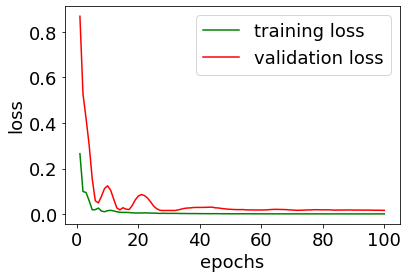

In [90]:
model6 = LSTM1(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model6.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model6,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [91]:
y_val_pred6=eval_rmse(model6,X_val_seq,y_val_seq, name='validation')
y_train_pred6=eval_rmse(model6,X_train_seq,y_train_seq,name='training')
y_pred6=np.concatenate((y_train_pred6,y_val_pred6),axis=0)

validation RMSE: 1593.7907709
training RMSE: 353.4803439


epoch 1, train_mse=0.2280509, val_mse=4.5290036
epoch 2, train_mse=3.8467906, val_mse=0.4066626
epoch 3, train_mse=0.5265523, val_mse=0.4714188
epoch 4, train_mse=0.2937065, val_mse=0.6483579
epoch 5, train_mse=0.1240996, val_mse=0.9166571
epoch 6, train_mse=0.0980687, val_mse=1.0019617
epoch 7, train_mse=0.1407619, val_mse=0.8133849
epoch 8, train_mse=0.0965054, val_mse=0.6383059
epoch 9, train_mse=0.0657711, val_mse=0.519076
epoch 10, train_mse=0.0645979, val_mse=0.4323922
epoch 11, train_mse=0.0662325, val_mse=0.358267
epoch 12, train_mse=0.057374, val_mse=0.2888395
epoch 13, train_mse=0.0384261, val_mse=0.2209374
epoch 14, train_mse=0.0187137, val_mse=0.1560799
epoch 15, train_mse=0.0089014, val_mse=0.1027611
epoch 16, train_mse=0.011813, val_mse=0.0637315
epoch 17, train_mse=0.0205798, val_mse=0.0418524
epoch 18, train_mse=0.0245358, val_mse=0.0338875
epoch 19, train_mse=0.0198221, val_mse=0.0351431
epoch 20, train_mse=0.0115621, val_mse=0.0417761
epoch 21, train_mse=0.0083642, va

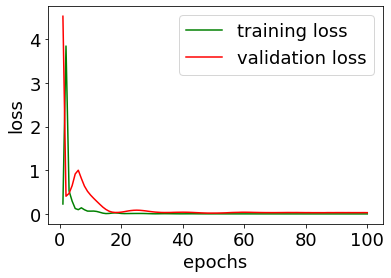

In [102]:
model6_1 = LSTM1(input_dim=input_dim, hidden_dim=128, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model6_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model6_1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [103]:
y_val_pred6_1=eval_rmse(model6_1,X_val_seq,y_val_seq, name='validation')
y_train_pred6_1=eval_rmse(model6_1,X_train_seq,y_train_seq,name='training')
y_pred6_1=np.concatenate((y_train_pred6_1,y_val_pred6_1),axis=0)

validation RMSE: 2181.973056
training RMSE: 395.5359888


epoch 1, train_mse=0.3419605, val_mse=0.7872825
epoch 2, train_mse=0.0898491, val_mse=1.6898518
epoch 3, train_mse=1.6115007, val_mse=0.6484028
epoch 4, train_mse=0.044457, val_mse=0.5388262
epoch 5, train_mse=0.1995331, val_mse=0.500566
epoch 6, train_mse=0.2315004, val_mse=0.4814869
epoch 7, train_mse=0.222667, val_mse=0.4784732
epoch 8, train_mse=0.2070389, val_mse=0.4847413
epoch 9, train_mse=0.1875454, val_mse=0.480314
epoch 10, train_mse=0.1624261, val_mse=0.431481
epoch 11, train_mse=0.1281153, val_mse=0.283733
epoch 12, train_mse=0.0825815, val_mse=0.0941784
epoch 13, train_mse=0.0353253, val_mse=0.0311036
epoch 14, train_mse=0.0158632, val_mse=0.0276481
epoch 15, train_mse=0.048079, val_mse=0.0217754
epoch 16, train_mse=0.0461803, val_mse=0.0225755
epoch 17, train_mse=0.0308621, val_mse=0.0292231
epoch 18, train_mse=0.0140148, val_mse=0.0629938
epoch 19, train_mse=0.01165, val_mse=0.1000956
epoch 20, train_mse=0.0152928, val_mse=0.1010394
epoch 21, train_mse=0.0178325, val_mse

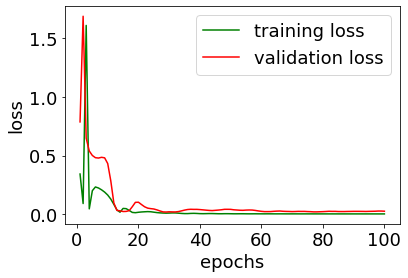

In [104]:
model6_2 = LSTM1(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=3,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model6_2.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model6_2,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [105]:
y_val_pred6_2=eval_rmse(model6_2,X_val_seq,y_val_seq, name='validation')
y_train_pred6_2=eval_rmse(model6_2,X_train_seq,y_train_seq,name='training')
y_pred6_2=np.concatenate((y_train_pred6_2,y_val_pred6_2),axis=0)

validation RMSE: 1910.666136
training RMSE: 437.9853158


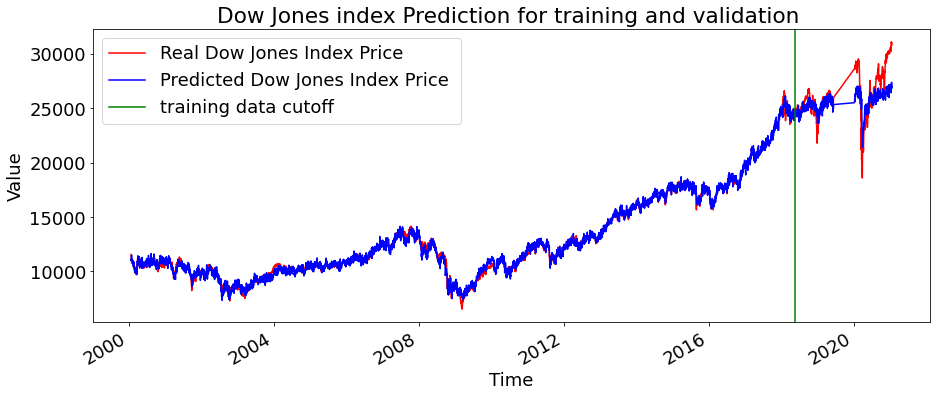

In [92]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred6, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2837717, val_mse=0.7297907
epoch 2, train_mse=0.1037525, val_mse=1.3921558
epoch 3, train_mse=0.4331518, val_mse=0.8310453
epoch 4, train_mse=0.0708396, val_mse=0.6343522
epoch 5, train_mse=0.1216924, val_mse=0.5592864
epoch 6, train_mse=0.1575595, val_mse=0.5269954
epoch 7, train_mse=0.1676692, val_mse=0.5139444
epoch 8, train_mse=0.1630802, val_mse=0.5077125
epoch 9, train_mse=0.1496467, val_mse=0.5013992
epoch 10, train_mse=0.129233, val_mse=0.4882373
epoch 11, train_mse=0.1029739, val_mse=0.4553637
epoch 12, train_mse=0.0728584, val_mse=0.3948849
epoch 13, train_mse=0.0473798, val_mse=0.3059035
epoch 14, train_mse=0.0476092, val_mse=0.1981426
epoch 15, train_mse=0.0671674, val_mse=0.106855
epoch 16, train_mse=0.0549404, val_mse=0.0437274
epoch 17, train_mse=0.0306172, val_mse=0.016502
epoch 18, train_mse=0.0171609, val_mse=0.0204264
epoch 19, train_mse=0.0159327, val_mse=0.0329429
epoch 20, train_mse=0.0212322, val_mse=0.0291275
epoch 21, train_mse=0.0256722, v

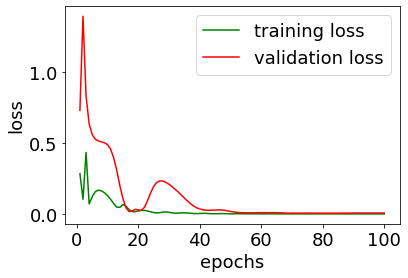

In [93]:
modelDJ6 = LSTM1(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ6.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ6,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [94]:
y_val_predDJ6=eval_rmse(modelDJ6,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ6=eval_rmse(modelDJ6,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ6=np.concatenate((y_train_predDJ6,y_val_predDJ6),axis=0)

validation RMSE: 1021.583556
training RMSE: 282.8636679


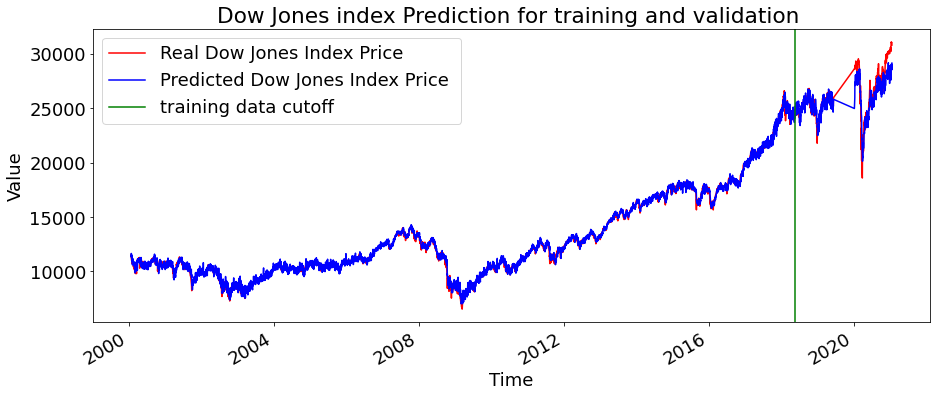

In [95]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ6, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [107]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,device=device,batch_size=32,dropout=0.2):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.device=device
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True,dropout =dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.batch_size=batch_size

    def forward(self, x):
        batch_size = len(x)
    
        # This makes the model not break for the last batch that might be less
        # than batch_size in size
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        h0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).requires_grad_()
        h0=h0.to(device)

        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

epoch 1, train_mse=0.2728167, val_mse=1.5480545
epoch 2, train_mse=0.2715752, val_mse=1.0080805
epoch 3, train_mse=0.1135378, val_mse=0.5011939
epoch 4, train_mse=0.0700431, val_mse=0.2663538
epoch 5, train_mse=0.0956405, val_mse=0.1895619
epoch 6, train_mse=0.0464107, val_mse=0.1527215
epoch 7, train_mse=0.0103072, val_mse=0.1146035
epoch 8, train_mse=0.0167152, val_mse=0.0741945
epoch 9, train_mse=0.0257149, val_mse=0.0467867
epoch 10, train_mse=0.0211543, val_mse=0.0352879
epoch 11, train_mse=0.0156893, val_mse=0.0342823
epoch 12, train_mse=0.0158916, val_mse=0.0408355
epoch 13, train_mse=0.0170752, val_mse=0.0553414
epoch 14, train_mse=0.0135926, val_mse=0.0779684
epoch 15, train_mse=0.0082501, val_mse=0.1058289
epoch 16, train_mse=0.0063498, val_mse=0.1323187
epoch 17, train_mse=0.0085333, val_mse=0.1496056
epoch 18, train_mse=0.0115898, val_mse=0.15293
epoch 19, train_mse=0.01249, val_mse=0.1429137
epoch 20, train_mse=0.0107158, val_mse=0.1242128
epoch 21, train_mse=0.0079209, va

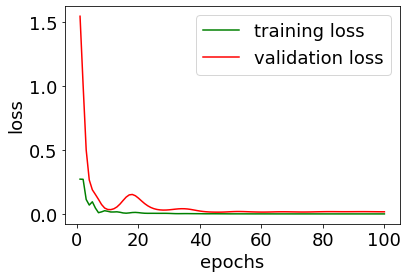

In [153]:
model7 = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model7.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model7,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [154]:
y_val_pred7=eval_rmse(model7,X_val_seq,y_val_seq, name='validation')
y_train_pred7=eval_rmse(model7,X_train_seq,y_train_seq,name='training')
y_pred7=np.concatenate((y_train_pred7,y_val_pred7),axis=0)

validation RMSE: 1611.7272766
training RMSE: 317.3268841


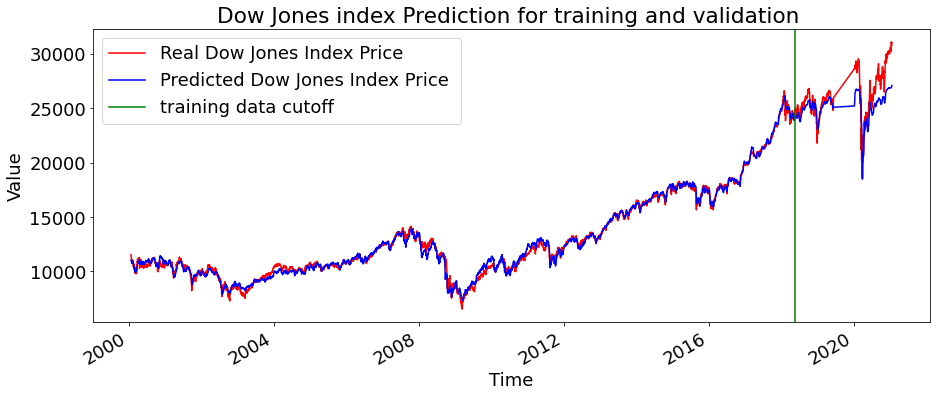

In [155]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred7, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3596776, val_mse=0.2984369
epoch 2, train_mse=0.1003608, val_mse=0.3194261
epoch 3, train_mse=0.0322402, val_mse=0.2566164
epoch 4, train_mse=0.099182, val_mse=0.2429768
epoch 5, train_mse=0.060661, val_mse=0.2463541
epoch 6, train_mse=0.0264353, val_mse=0.2401919
epoch 7, train_mse=0.0260099, val_mse=0.2154806
epoch 8, train_mse=0.0352772, val_mse=0.1741324
epoch 9, train_mse=0.0370545, val_mse=0.122026
epoch 10, train_mse=0.0282905, val_mse=0.0674661
epoch 11, train_mse=0.0140638, val_mse=0.0231785
epoch 12, train_mse=0.003274, val_mse=0.0043251
epoch 13, train_mse=0.0037366, val_mse=0.0138199
epoch 14, train_mse=0.0127312, val_mse=0.02952
epoch 15, train_mse=0.0160874, val_mse=0.0313427
epoch 16, train_mse=0.0100961, val_mse=0.021778
epoch 17, train_mse=0.0036448, val_mse=0.0115428
epoch 18, train_mse=0.0026351, val_mse=0.0064851
epoch 19, train_mse=0.0055434, val_mse=0.0062413
epoch 20, train_mse=0.0082548, val_mse=0.0080831
epoch 21, train_mse=0.008404, val_ms

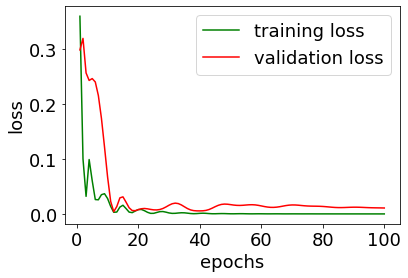

In [156]:
modelDJ7 = GRU(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ7.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ7,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [157]:
y_val_predDJ7=eval_rmse(modelDJ7,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ7=eval_rmse(modelDJ7,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ7=np.concatenate((y_train_predDJ7,y_val_predDJ7),axis=0)

validation RMSE: 1292.4679338
training RMSE: 221.160591


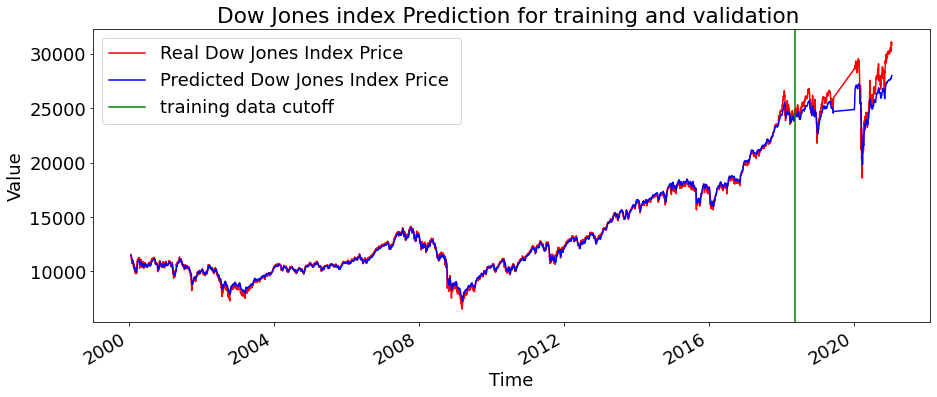

In [158]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ7, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2728167, val_mse=5.7562814
epoch 2, train_mse=2.0342207, val_mse=1.0119538
epoch 3, train_mse=5.0498948, val_mse=3.0614686
epoch 4, train_mse=0.4095398, val_mse=3.5025344
epoch 5, train_mse=0.6766652, val_mse=1.0778812
epoch 6, train_mse=0.1063382, val_mse=0.2493857
epoch 7, train_mse=0.3601309, val_mse=0.7755476
epoch 8, train_mse=0.126577, val_mse=1.4009972
epoch 9, train_mse=0.1129084, val_mse=1.7935576
epoch 10, train_mse=0.1722607, val_mse=1.6721268
epoch 11, train_mse=0.1489156, val_mse=1.2418585
epoch 12, train_mse=0.1048701, val_mse=0.8733294
epoch 13, train_mse=0.1272755, val_mse=0.7548294
epoch 14, train_mse=0.152276, val_mse=0.8963866
epoch 15, train_mse=0.1239031, val_mse=1.2209592
epoch 16, train_mse=0.1049012, val_mse=1.5258564
epoch 17, train_mse=0.1277636, val_mse=1.5768071
epoch 18, train_mse=0.1344948, val_mse=1.3528473
epoch 19, train_mse=0.1108348, val_mse=1.0562618
epoch 20, train_mse=0.1077672, val_mse=0.8879292
epoch 21, train_mse=0.1252387, 

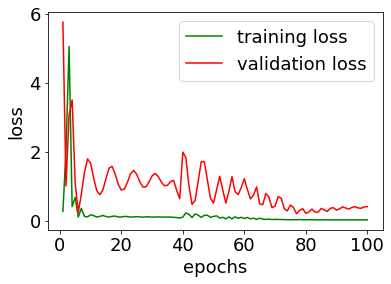

In [159]:
model8 = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model8.parameters(), lr=0.1)
torch.manual_seed(43)
train_model(model8,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [160]:
y_val_pred8=eval_rmse(model8,X_val_seq,y_val_seq, name='validation')
y_train_pred8=eval_rmse(model8,X_train_seq,y_train_seq,name='training')
y_pred8=np.concatenate((y_train_pred8,y_val_pred8),axis=0)

validation RMSE: 7859.0636487
training RMSE: 1922.3755108


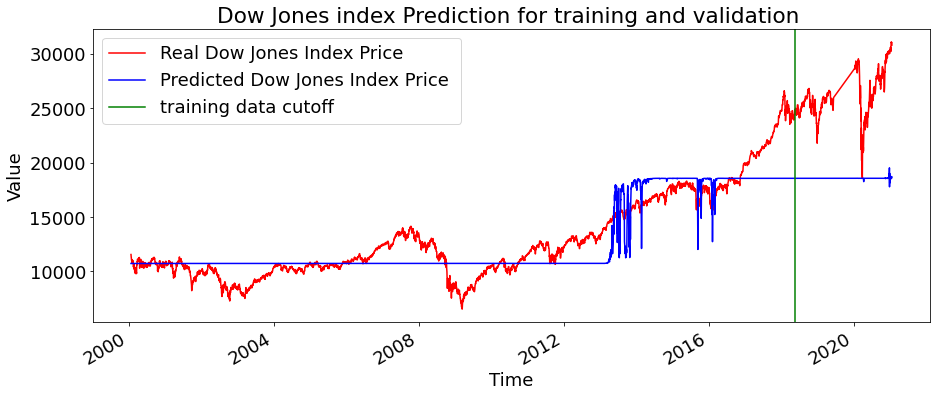

In [161]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred8, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3596776, val_mse=1.286829
epoch 2, train_mse=1.2037201, val_mse=0.4041393
epoch 3, train_mse=0.3466344, val_mse=1.844615
epoch 4, train_mse=3.60748, val_mse=0.6960823
epoch 5, train_mse=0.2620887, val_mse=0.82399
epoch 6, train_mse=0.1185242, val_mse=1.1538649
epoch 7, train_mse=0.1447799, val_mse=0.4063508
epoch 8, train_mse=0.0670396, val_mse=0.1642806
epoch 9, train_mse=0.1438867, val_mse=0.1376953
epoch 10, train_mse=0.0807483, val_mse=0.2364373
epoch 11, train_mse=0.0792361, val_mse=0.3929768
epoch 12, train_mse=0.0564431, val_mse=0.4546573
epoch 13, train_mse=0.0408637, val_mse=0.4410128
epoch 14, train_mse=0.027757, val_mse=0.3692774
epoch 15, train_mse=0.0216476, val_mse=0.2956507
epoch 16, train_mse=0.0377743, val_mse=0.2803095
epoch 17, train_mse=0.0227116, val_mse=0.3004751
epoch 18, train_mse=0.0287033, val_mse=0.344173
epoch 19, train_mse=0.0316369, val_mse=0.4134669
epoch 20, train_mse=0.0186894, val_mse=0.5088634
epoch 21, train_mse=0.0242682, val_ms

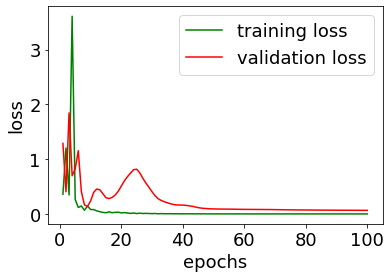

In [162]:
modelDJ8 = GRU(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ8.parameters(), lr=0.1)
torch.manual_seed(43)
train_model(modelDJ8,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [163]:
y_val_predDJ8=eval_rmse(modelDJ8,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ8=eval_rmse(modelDJ8,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ8=np.concatenate((y_train_predDJ8,y_val_predDJ8),axis=0)

validation RMSE: 3138.5463488
training RMSE: 206.2600685


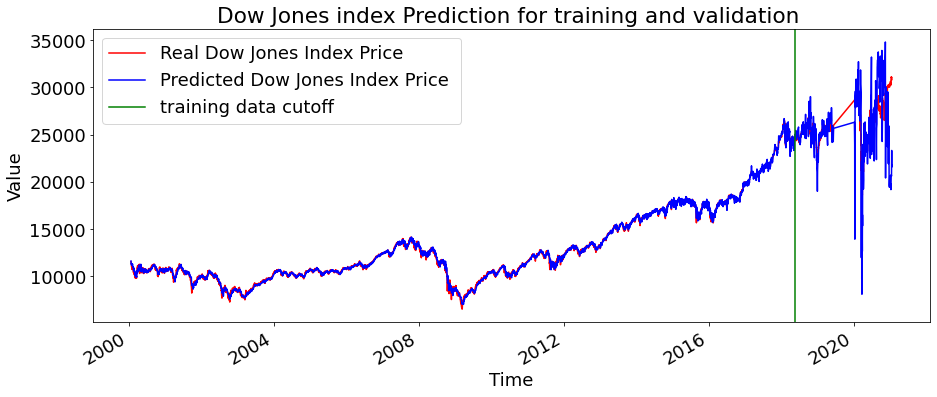

In [164]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ8, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2728167, val_mse=0.5813844
epoch 2, train_mse=0.1938825, val_mse=0.6689942
epoch 3, train_mse=0.1373462, val_mse=0.7552966
epoch 4, train_mse=0.1016104, val_mse=0.8322352
epoch 5, train_mse=0.083527, val_mse=0.8905399
epoch 6, train_mse=0.0783543, val_mse=0.9238082
epoch 7, train_mse=0.0803942, val_mse=0.9295614
epoch 8, train_mse=0.0842032, val_mse=0.9095229
epoch 9, train_mse=0.0859051, val_mse=0.8685052
epoch 10, train_mse=0.0837858, val_mse=0.8123589
epoch 11, train_mse=0.0778833, val_mse=0.7465818
epoch 12, train_mse=0.0692161, val_mse=0.6757816
epoch 13, train_mse=0.0591593, val_mse=0.603606
epoch 14, train_mse=0.0490614, val_mse=0.5328469
epoch 15, train_mse=0.0400268, val_mse=0.4655854
epoch 16, train_mse=0.0327926, val_mse=0.4033298
epoch 17, train_mse=0.0276656, val_mse=0.3471211
epoch 18, train_mse=0.0245121, val_mse=0.2975942
epoch 19, train_mse=0.0228132, val_mse=0.2549973
epoch 20, train_mse=0.0218009, val_mse=0.2191863
epoch 21, train_mse=0.020672, v

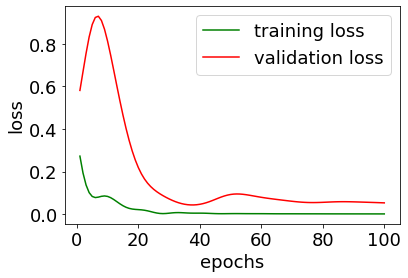

In [165]:
model9 = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model9.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(model9,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [166]:
y_val_pred9=eval_rmse(model9,X_val_seq,y_val_seq, name='validation')
y_train_pred9=eval_rmse(model9,X_train_seq,y_train_seq,name='training')
y_pred9=np.concatenate((y_train_pred9,y_val_pred9),axis=0)

validation RMSE: 2837.2520553
training RMSE: 486.9085061


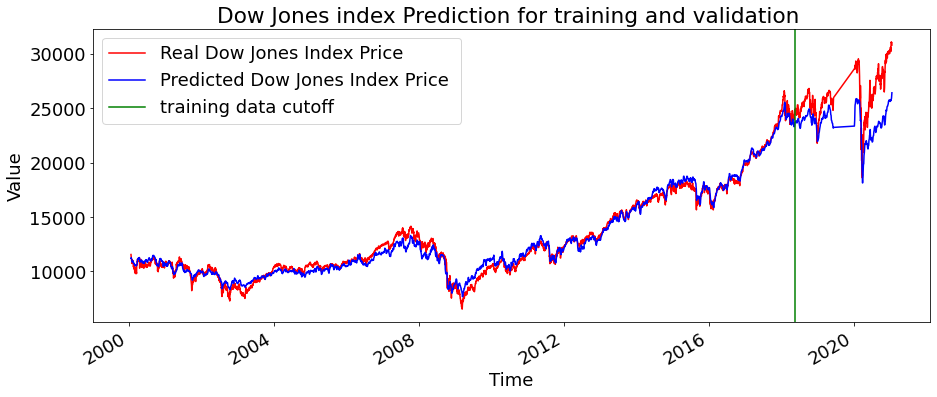

In [167]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred9, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3596776, val_mse=0.2114421
epoch 2, train_mse=0.3232897, val_mse=0.2200464
epoch 3, train_mse=0.2892262, val_mse=0.2279463
epoch 4, train_mse=0.2573363, val_mse=0.235145
epoch 5, train_mse=0.2275117, val_mse=0.2415159
epoch 6, train_mse=0.1996536, val_mse=0.2469324
epoch 7, train_mse=0.1736874, val_mse=0.2513272
epoch 8, train_mse=0.1495737, val_mse=0.2546422
epoch 9, train_mse=0.1273024, val_mse=0.2568102
epoch 10, train_mse=0.1068888, val_mse=0.2577729
epoch 11, train_mse=0.0883764, val_mse=0.2574902
epoch 12, train_mse=0.0718401, val_mse=0.2559389
epoch 13, train_mse=0.0573879, val_mse=0.2531092
epoch 14, train_mse=0.0451542, val_mse=0.2490024
epoch 15, train_mse=0.0352859, val_mse=0.2436298
epoch 16, train_mse=0.0279151, val_mse=0.2370154
epoch 17, train_mse=0.0231172, val_mse=0.2292052
epoch 18, train_mse=0.0208503, val_mse=0.2202884
epoch 19, train_mse=0.0208826, val_mse=0.2104341
epoch 20, train_mse=0.0227297, val_mse=0.1999288
epoch 21, train_mse=0.025652, 

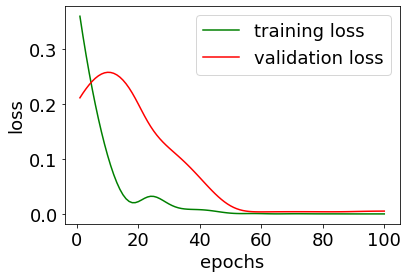

In [168]:
modelDJ9 = GRU(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ9.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(modelDJ9,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [169]:
y_val_predDJ9=eval_rmse(modelDJ9,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ9=eval_rmse(modelDJ9,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ9=np.concatenate((y_train_predDJ9,y_val_predDJ9),axis=0)

validation RMSE: 913.5846159
training RMSE: 252.2780774


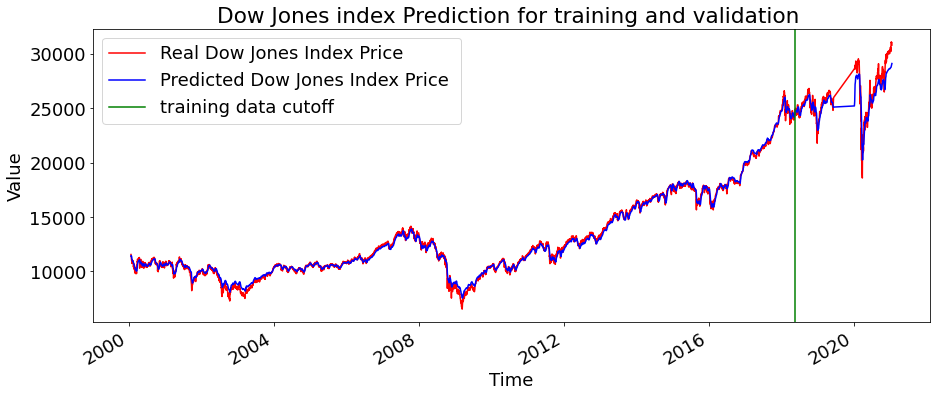

In [170]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ9, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.9307471, val_mse=0.9476117
epoch 2, train_mse=0.1358083, val_mse=1.1165596
epoch 3, train_mse=0.3507917, val_mse=0.7660532
epoch 4, train_mse=0.2006403, val_mse=0.3872214
epoch 5, train_mse=0.0480834, val_mse=0.1451567
epoch 6, train_mse=0.0289603, val_mse=0.0428803
epoch 7, train_mse=0.0719512, val_mse=0.0158264
epoch 8, train_mse=0.0873274, val_mse=0.0109492
epoch 9, train_mse=0.0632548, val_mse=0.0106333
epoch 10, train_mse=0.0275802, val_mse=0.0135913
epoch 11, train_mse=0.0060997, val_mse=0.019528
epoch 12, train_mse=0.0075858, val_mse=0.0245626
epoch 13, train_mse=0.0217748, val_mse=0.0245121
epoch 14, train_mse=0.0312836, val_mse=0.0194457
epoch 15, train_mse=0.0292148, val_mse=0.0136391
epoch 16, train_mse=0.0190276, val_mse=0.0122213
epoch 17, train_mse=0.0085656, val_mse=0.0176641
epoch 18, train_mse=0.0038753, val_mse=0.0282268
epoch 19, train_mse=0.0061844, val_mse=0.0390319
epoch 20, train_mse=0.0114974, val_mse=0.0455945
epoch 21, train_mse=0.01479, v

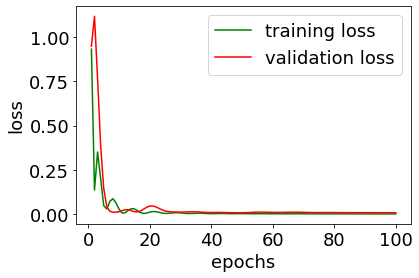

In [171]:
model10 = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=1,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model10.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model10,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [172]:
y_val_pred10=eval_rmse(model10,X_val_seq,y_val_seq, name='validation')
y_train_pred10=eval_rmse(model10,X_train_seq,y_train_seq,name='training')
y_pred10=np.concatenate((y_train_pred10,y_val_pred10),axis=0)

validation RMSE: 1110.9010342
training RMSE: 430.095027


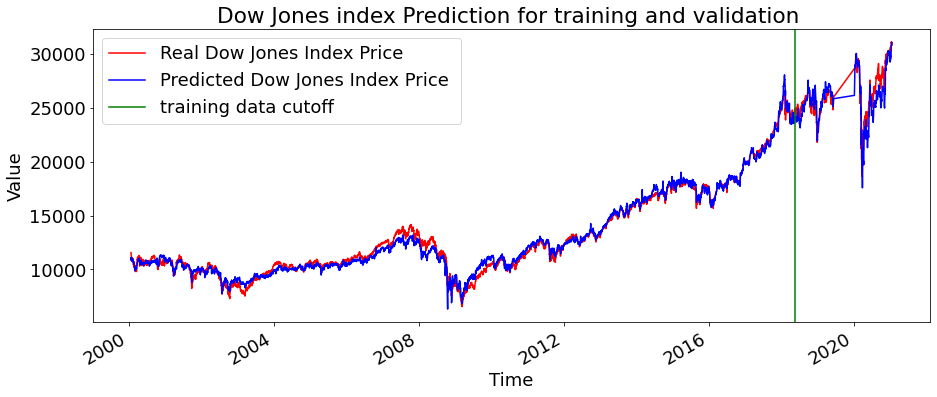

In [173]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred10, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2005575, val_mse=0.5969967
epoch 2, train_mse=0.187673, val_mse=0.5943545
epoch 3, train_mse=0.1751908, val_mse=0.591677
epoch 4, train_mse=0.1631213, val_mse=0.5889434
epoch 5, train_mse=0.1514764, val_mse=0.5861387
epoch 6, train_mse=0.1402615, val_mse=0.5832467
epoch 7, train_mse=0.1294781, val_mse=0.5802461
epoch 8, train_mse=0.1191342, val_mse=0.5771084
epoch 9, train_mse=0.1092509, val_mse=0.5737958
epoch 10, train_mse=0.0998612, val_mse=0.5702558
epoch 11, train_mse=0.0910071, val_mse=0.5664149
epoch 12, train_mse=0.0827353, val_mse=0.5621766
epoch 13, train_mse=0.0750951, val_mse=0.5574198
epoch 14, train_mse=0.0681354, val_mse=0.5520049
epoch 15, train_mse=0.0619016, val_mse=0.5457971
epoch 16, train_mse=0.0564319, val_mse=0.5386904
epoch 17, train_mse=0.0517538, val_mse=0.5306094
epoch 18, train_mse=0.0478797, val_mse=0.5215005
epoch 19, train_mse=0.0448008, val_mse=0.5113248
epoch 20, train_mse=0.0424796, val_mse=0.5000637
epoch 21, train_mse=0.0408437, 

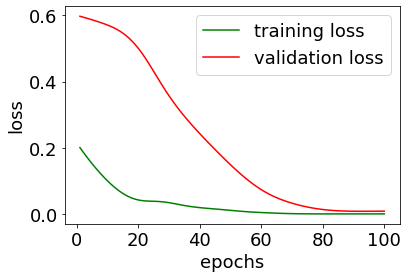

In [174]:
modelDJ10 = GRU(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ10.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(modelDJ10,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [175]:
y_val_predDJ10=eval_rmse(modelDJ10,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ10=eval_rmse(modelDJ10,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ10=np.concatenate((y_train_predDJ10,y_val_predDJ10),axis=0)

validation RMSE: 1146.6302335
training RMSE: 237.6579521


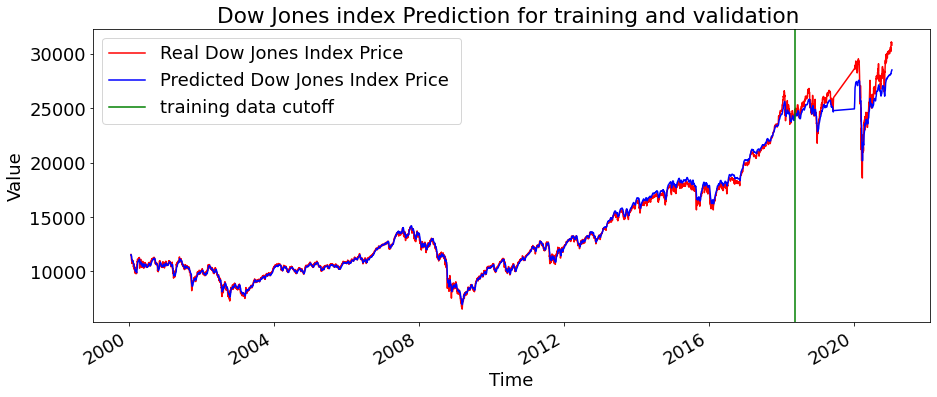

In [176]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ10, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.2005575, val_mse=0.5721072
epoch 2, train_mse=0.0921586, val_mse=0.5309023
epoch 3, train_mse=0.0436137, val_mse=0.4187157
epoch 4, train_mse=0.0674713, val_mse=0.3273169
epoch 5, train_mse=0.0598962, val_mse=0.2721204
epoch 6, train_mse=0.0335325, val_mse=0.2328446
epoch 7, train_mse=0.0193223, val_mse=0.1973227
epoch 8, train_mse=0.0178723, val_mse=0.1608624
epoch 9, train_mse=0.020432, val_mse=0.1235423
epoch 10, train_mse=0.0204116, val_mse=0.0870575
epoch 11, train_mse=0.0159628, val_mse=0.0535505
epoch 12, train_mse=0.0088628, val_mse=0.0259414
epoch 13, train_mse=0.0026993, val_mse=0.007928
epoch 14, train_mse=0.0008293, val_mse=0.0021418
epoch 15, train_mse=0.0036679, val_mse=0.0062246
epoch 16, train_mse=0.0072111, val_mse=0.0127645
epoch 17, train_mse=0.0072437, val_mse=0.0160798
epoch 18, train_mse=0.0043546, val_mse=0.0154054
epoch 19, train_mse=0.0019503, val_mse=0.012588
epoch 20, train_mse=0.0019891, val_mse=0.0094763
epoch 21, train_mse=0.0036641, v

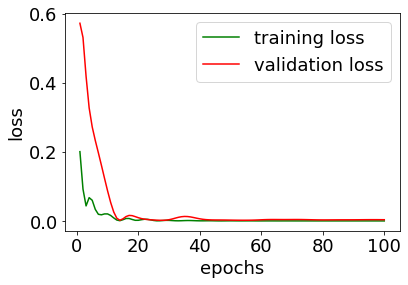

In [177]:
modelDJ10_1 = GRU(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ10_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ10_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [178]:
y_val_predDJ10_1=eval_rmse(modelDJ10_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ10_1=eval_rmse(modelDJ10_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ10_1=np.concatenate((y_train_predDJ10_1,y_val_predDJ10_1),axis=0)

validation RMSE: 741.9894598
training RMSE: 161.8980002


epoch 1, train_mse=0.5723765, val_mse=0.9388138
epoch 2, train_mse=0.09051, val_mse=0.9568084
epoch 3, train_mse=0.0899046, val_mse=0.5330729
epoch 4, train_mse=0.1022003, val_mse=0.5252656
epoch 5, train_mse=0.0498169, val_mse=0.3757372
epoch 6, train_mse=0.0515876, val_mse=0.1372975
epoch 7, train_mse=0.0090444, val_mse=0.0370052
epoch 8, train_mse=0.0285312, val_mse=0.0216645
epoch 9, train_mse=0.0137102, val_mse=0.0203703
epoch 10, train_mse=0.0306997, val_mse=0.0301119
epoch 11, train_mse=0.0138614, val_mse=0.0549107
epoch 12, train_mse=0.0073923, val_mse=0.0912555
epoch 13, train_mse=0.0157701, val_mse=0.1267424
epoch 14, train_mse=0.01271, val_mse=0.1480504
epoch 15, train_mse=0.0109261, val_mse=0.1465267
epoch 16, train_mse=0.0154816, val_mse=0.1244965
epoch 17, train_mse=0.0139604, val_mse=0.0947193
epoch 18, train_mse=0.0070807, val_mse=0.0681807
epoch 19, train_mse=0.0056947, val_mse=0.0487333
epoch 20, train_mse=0.0087051, val_mse=0.0363009
epoch 21, train_mse=0.0083702, va

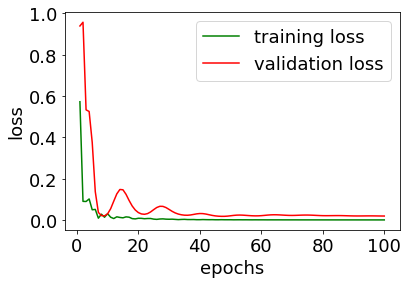

In [179]:
model11 = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=3,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model11.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model11,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [180]:
y_val_pred11=eval_rmse(model11,X_val_seq,y_val_seq, name='validation')
y_train_pred11=eval_rmse(model11,X_train_seq,y_train_seq,name='training')
y_pred11=np.concatenate((y_train_pred11,y_val_pred11),axis=0)

validation RMSE: 1715.9451434
training RMSE: 339.2944709


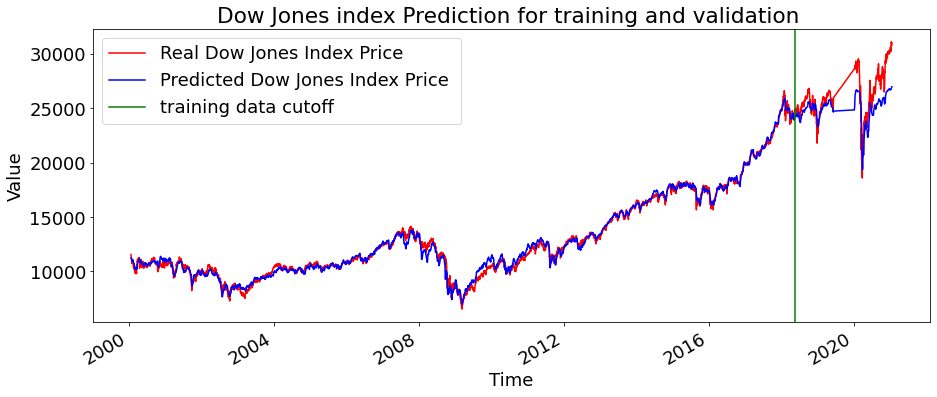

In [181]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred11, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.5476015, val_mse=0.3565714
epoch 2, train_mse=0.1865703, val_mse=0.5648818
epoch 3, train_mse=0.0515581, val_mse=0.6119891
epoch 4, train_mse=0.1604809, val_mse=0.5142679
epoch 5, train_mse=0.0764847, val_mse=0.4390437
epoch 6, train_mse=0.0462567, val_mse=0.3754717
epoch 7, train_mse=0.0738542, val_mse=0.3037425
epoch 8, train_mse=0.0750149, val_mse=0.2141318
epoch 9, train_mse=0.0448625, val_mse=0.1125958
epoch 10, train_mse=0.0141541, val_mse=0.0313196
epoch 11, train_mse=0.0130176, val_mse=0.0056226
epoch 12, train_mse=0.0292166, val_mse=0.0128973
epoch 13, train_mse=0.0226453, val_mse=0.0171356
epoch 14, train_mse=0.0058461, val_mse=0.014939
epoch 15, train_mse=0.0064136, val_mse=0.0120217
epoch 16, train_mse=0.0185296, val_mse=0.010427
epoch 17, train_mse=0.0210904, val_mse=0.0095711
epoch 18, train_mse=0.0127912, val_mse=0.0089047
epoch 19, train_mse=0.0042228, val_mse=0.0082136
epoch 20, train_mse=0.0027621, val_mse=0.0074703
epoch 21, train_mse=0.0067635, 

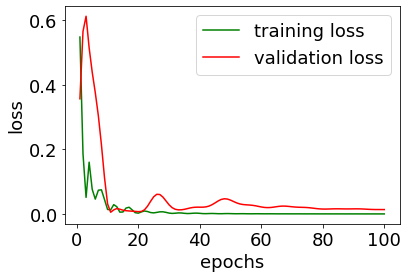

In [184]:
modelDJ11_1 = GRU(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=3,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ11_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ11_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [185]:
y_val_predDJ11_1=eval_rmse(modelDJ11_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ11_1=eval_rmse(modelDJ11_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ11_1=np.concatenate((y_train_predDJ11_1,y_val_predDJ11_1),axis=0)

validation RMSE: 1446.995717
training RMSE: 255.3043749


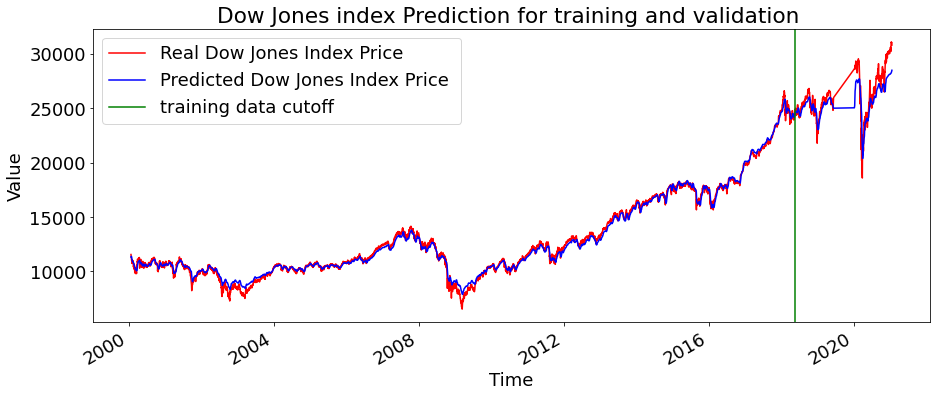

In [186]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ11, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3419447, val_mse=2.1843023
epoch 2, train_mse=1.6550305, val_mse=0.9994419
epoch 3, train_mse=0.3722254, val_mse=0.3953206
epoch 4, train_mse=0.0315395, val_mse=0.1706035
epoch 5, train_mse=0.1820469, val_mse=0.1166103
epoch 6, train_mse=0.2312827, val_mse=0.1264894
epoch 7, train_mse=0.1363104, val_mse=0.1731432
epoch 8, train_mse=0.0415469, val_mse=0.2422791
epoch 9, train_mse=0.0140065, val_mse=0.3059745
epoch 10, train_mse=0.0361512, val_mse=0.3318267
epoch 11, train_mse=0.0625724, val_mse=0.3084213
epoch 12, train_mse=0.0656116, val_mse=0.251177
epoch 13, train_mse=0.0472327, val_mse=0.1847976
epoch 14, train_mse=0.0232993, val_mse=0.1269975
epoch 15, train_mse=0.0074512, val_mse=0.0847396
epoch 16, train_mse=0.0047665, val_mse=0.0577377
epoch 17, train_mse=0.0117879, val_mse=0.0426011
epoch 18, train_mse=0.0197639, val_mse=0.0349703
epoch 19, train_mse=0.0229823, val_mse=0.0318601
epoch 20, train_mse=0.0205232, val_mse=0.0317223
epoch 21, train_mse=0.014464, 

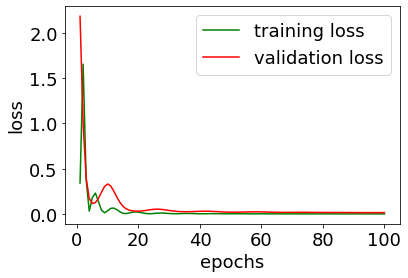

In [108]:
model12 = GRU(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model12,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [109]:
y_val_pred12=eval_rmse(model12,X_val_seq,y_val_seq, name='validation')
y_train_pred12=eval_rmse(model12,X_train_seq,y_train_seq,name='training')
y_pred12=np.concatenate((y_train_pred12,y_val_pred12),axis=0)

validation RMSE: 1514.5520151
training RMSE: 394.9746835


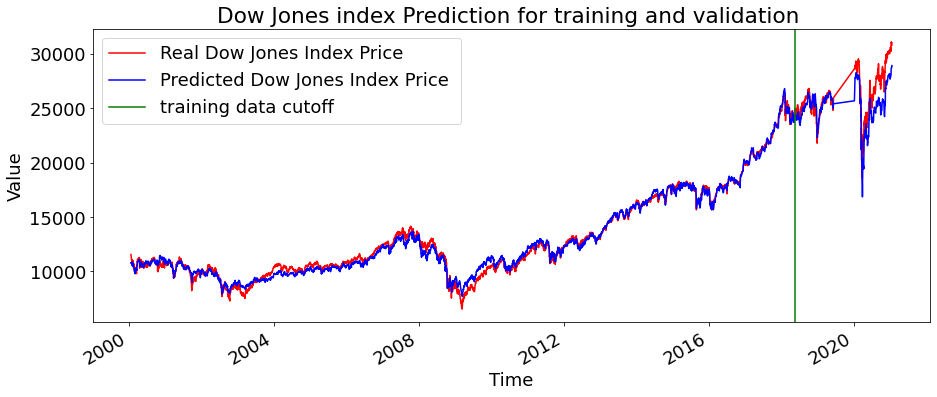

In [110]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred12, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3424337, val_mse=2.6982884
epoch 2, train_mse=1.3840077, val_mse=0.5117329
epoch 3, train_mse=0.2474717, val_mse=0.2753483
epoch 4, train_mse=0.35654, val_mse=0.3472495
epoch 5, train_mse=0.1025195, val_mse=0.4745685
epoch 6, train_mse=0.0369287, val_mse=0.5277368
epoch 7, train_mse=0.0937906, val_mse=0.4353071
epoch 8, train_mse=0.0894181, val_mse=0.2773501
epoch 9, train_mse=0.0303677, val_mse=0.1471104
epoch 10, train_mse=0.0124902, val_mse=0.0739689
epoch 11, train_mse=0.0422871, val_mse=0.0436703
epoch 12, train_mse=0.0499867, val_mse=0.0329485
epoch 13, train_mse=0.0251967, val_mse=0.0298502
epoch 14, train_mse=0.0066475, val_mse=0.0305308
epoch 15, train_mse=0.0115942, val_mse=0.0336382
epoch 16, train_mse=0.0236651, val_mse=0.0381597
epoch 17, train_mse=0.0250418, val_mse=0.0433633
epoch 18, train_mse=0.0158822, val_mse=0.048807
epoch 19, train_mse=0.0068161, val_mse=0.0539757
epoch 20, train_mse=0.0050519, val_mse=0.0581021
epoch 21, train_mse=0.0094216, v

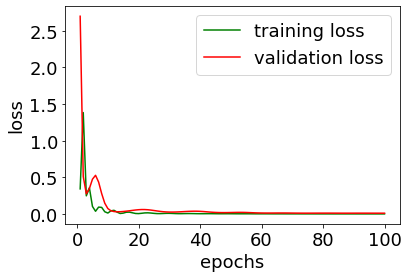

In [112]:
model12_1 = GRU(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=2,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model12_1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [114]:
y_val_pred12_1=eval_rmse(model12_1,X_val_seq,y_val_seq, name='validation')
y_train_pred12_1=eval_rmse(model12_1,X_train_seq,y_train_seq,name='training')
y_pred12_1=np.concatenate((y_train_pred12_1,y_val_pred12_1),axis=0)

validation RMSE: 1266.4613652
training RMSE: 325.0515749


epoch 1, train_mse=0.3424337, val_mse=11.8492527
epoch 2, train_mse=10.6066437, val_mse=0.3444811
epoch 3, train_mse=3.986413, val_mse=28.3936768
epoch 4, train_mse=22.2171688, val_mse=10.8563881
epoch 5, train_mse=6.0423412, val_mse=1.4496582
epoch 6, train_mse=0.2494544, val_mse=0.1166184
epoch 7, train_mse=1.5505555, val_mse=0.0518963
epoch 8, train_mse=1.8347472, val_mse=0.0730823
epoch 9, train_mse=1.0284029, val_mse=0.5546767
epoch 10, train_mse=0.2449401, val_mse=1.6649404
epoch 11, train_mse=0.1491157, val_mse=2.8004088
epoch 12, train_mse=0.4635192, val_mse=3.1898334
epoch 13, train_mse=0.6109599, val_mse=2.6122036
epoch 14, train_mse=0.3963677, val_mse=1.5852362
epoch 15, train_mse=0.1365822, val_mse=0.7569675
epoch 16, train_mse=0.1506935, val_mse=0.3646043
epoch 17, train_mse=0.344555, val_mse=0.3009437
epoch 18, train_mse=0.4040743, val_mse=0.4962458
epoch 19, train_mse=0.2492596, val_mse=1.0104651
epoch 20, train_mse=0.1062116, val_mse=1.7404324
epoch 21, train_mse=0.1750

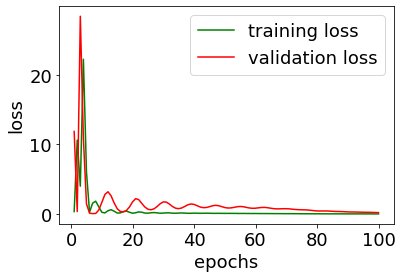

In [119]:
model12_2 = GRU(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=2,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12_2.parameters(), lr=0.1)
torch.manual_seed(43)
train_model(model12_2,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [120]:
y_val_pred12_2=eval_rmse(model12_2,X_val_seq,y_val_seq, name='validation')
y_train_pred12_2=eval_rmse(model12_2,X_train_seq,y_train_seq,name='training')
y_pred12_2=np.concatenate((y_train_pred12_2,y_val_pred12_2),axis=0)

validation RMSE: 5408.2687868
training RMSE: 1023.9207609


epoch 1, train_mse=0.3419447, val_mse=0.5020777
epoch 2, train_mse=0.1678529, val_mse=0.6170156
epoch 3, train_mse=0.0775019, val_mse=0.7172052
epoch 4, train_mse=0.0585896, val_mse=0.7686668
epoch 5, train_mse=0.0795542, val_mse=0.7577188
epoch 6, train_mse=0.1008094, val_mse=0.6991438
epoch 7, train_mse=0.1025543, val_mse=0.6151204
epoch 8, train_mse=0.0863906, val_mse=0.522428
epoch 9, train_mse=0.0618079, val_mse=0.4316755
epoch 10, train_mse=0.0380216, val_mse=0.3491333
epoch 11, train_mse=0.0210474, val_mse=0.2781839
epoch 12, train_mse=0.0130874, val_mse=0.2201832
epoch 13, train_mse=0.0130117, val_mse=0.1749775
epoch 14, train_mse=0.0175279, val_mse=0.1413139
epoch 15, train_mse=0.0227353, val_mse=0.1172902
epoch 16, train_mse=0.025587, val_mse=0.1008213
epoch 17, train_mse=0.0247426, val_mse=0.0900006
epoch 18, train_mse=0.0206109, val_mse=0.0832695
epoch 19, train_mse=0.0147847, val_mse=0.0794202
epoch 20, train_mse=0.0092389, val_mse=0.0775126
epoch 21, train_mse=0.005588, v

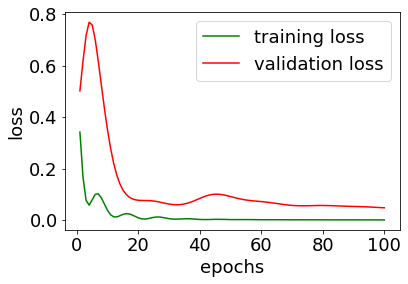

In [121]:
model12_3 = GRU(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12_3.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(model12_3,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [122]:
y_val_pred12_3=eval_rmse(model12_3,X_val_seq,y_val_seq, name='validation')
y_train_pred12_3=eval_rmse(model12_3,X_train_seq,y_train_seq,name='training')
y_pred12_3=np.concatenate((y_train_pred12_3,y_val_pred12_3),axis=0)

validation RMSE: 2698.3696909
training RMSE: 434.4643611


epoch 1, train_mse=0.5806587, val_mse=0.1383105
epoch 2, train_mse=0.1095805, val_mse=0.3570264
epoch 3, train_mse=0.0614751, val_mse=0.4510433
epoch 4, train_mse=0.1141895, val_mse=0.3356293
epoch 5, train_mse=0.0828542, val_mse=0.1708025
epoch 6, train_mse=0.0320466, val_mse=0.0610186
epoch 7, train_mse=0.0314746, val_mse=0.0221899
epoch 8, train_mse=0.0407755, val_mse=0.0137363
epoch 9, train_mse=0.025665, val_mse=0.0118384
epoch 10, train_mse=0.0090948, val_mse=0.0108048
epoch 11, train_mse=0.0082715, val_mse=0.0100677
epoch 12, train_mse=0.0167968, val_mse=0.0096444
epoch 13, train_mse=0.0214891, val_mse=0.009468
epoch 14, train_mse=0.0182864, val_mse=0.0095014
epoch 15, train_mse=0.0115868, val_mse=0.0097111
epoch 16, train_mse=0.0075575, val_mse=0.0100358
epoch 17, train_mse=0.0087474, val_mse=0.0105086
epoch 18, train_mse=0.012081, val_mse=0.0113659
epoch 19, train_mse=0.0129836, val_mse=0.0128821
epoch 20, train_mse=0.0108404, val_mse=0.0151699
epoch 21, train_mse=0.007958, va

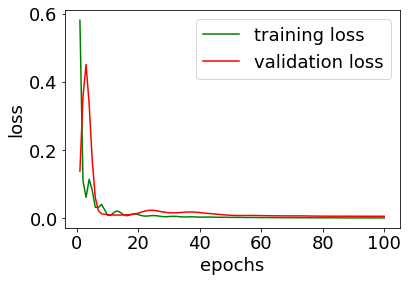

In [123]:
model12_4 = GRU(input_dim=input_dim, hidden_dim=16, output_dim=output_dim, num_layers=2,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12_4.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model12_4,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [124]:
y_val_pred12_4=eval_rmse(model12_4,X_val_seq,y_val_seq, name='validation')
y_train_pred12_4=eval_rmse(model12_4,X_train_seq,y_train_seq,name='training')
y_pred12_4=np.concatenate((y_train_pred12_4,y_val_pred12_4),axis=0)

validation RMSE: 945.0394708
training RMSE: 405.0783062


epoch 1, train_mse=0.5505866, val_mse=0.4810934
epoch 2, train_mse=0.2787954, val_mse=0.489125
epoch 3, train_mse=0.1474787, val_mse=0.4980373
epoch 4, train_mse=0.0872209, val_mse=0.5112497
epoch 5, train_mse=0.0590598, val_mse=0.5173336
epoch 6, train_mse=0.0490684, val_mse=0.5003293
epoch 7, train_mse=0.0451813, val_mse=0.4551658
epoch 8, train_mse=0.0392025, val_mse=0.3909484
epoch 9, train_mse=0.0292449, val_mse=0.3221843
epoch 10, train_mse=0.0183145, val_mse=0.2599128
epoch 11, train_mse=0.0122884, val_mse=0.2102787
epoch 12, train_mse=0.0136555, val_mse=0.1749239
epoch 13, train_mse=0.0137062, val_mse=0.1503841
epoch 14, train_mse=0.0104155, val_mse=0.13214
epoch 15, train_mse=0.0087639, val_mse=0.1168725
epoch 16, train_mse=0.0106856, val_mse=0.1027655
epoch 17, train_mse=0.013448, val_mse=0.0892505
epoch 18, train_mse=0.0142221, val_mse=0.0766498
epoch 19, train_mse=0.0121495, val_mse=0.0657546
epoch 20, train_mse=0.0083755, val_mse=0.0573493
epoch 21, train_mse=0.0055433, va

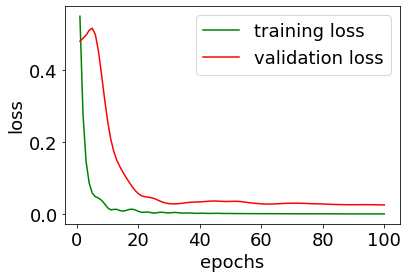

In [125]:
model12_5 = GRU(input_dim=input_dim, hidden_dim=8, output_dim=output_dim, num_layers=2,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12_5.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model12_5,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [126]:
y_val_pred12_5=eval_rmse(model12_5,X_val_seq,y_val_seq, name='validation')
y_train_pred12_5=eval_rmse(model12_5,X_train_seq,y_train_seq,name='training')
y_pred12_5=np.concatenate((y_train_pred12_5,y_val_pred12_5),axis=0)

validation RMSE: 1981.0863594
training RMSE: 398.5857826


epoch 1, train_mse=0.3620752, val_mse=1.4811628
epoch 2, train_mse=0.2227489, val_mse=0.2818921
epoch 3, train_mse=0.7852958, val_mse=0.5893797
epoch 4, train_mse=0.1146987, val_mse=0.7664585
epoch 5, train_mse=0.0808827, val_mse=0.679276
epoch 6, train_mse=0.083751, val_mse=0.4741676
epoch 7, train_mse=0.0421232, val_mse=0.2960495
epoch 8, train_mse=0.0543242, val_mse=0.1621192
epoch 9, train_mse=0.0233728, val_mse=0.0696999
epoch 10, train_mse=0.0104866, val_mse=0.0339971
epoch 11, train_mse=0.0373669, val_mse=0.0348801
epoch 12, train_mse=0.0265168, val_mse=0.058811
epoch 13, train_mse=0.0104833, val_mse=0.1025869
epoch 14, train_mse=0.0148802, val_mse=0.147423
epoch 15, train_mse=0.0210796, val_mse=0.1742293
epoch 16, train_mse=0.0184557, val_mse=0.176597
epoch 17, train_mse=0.0137037, val_mse=0.1583178
epoch 18, train_mse=0.0134707, val_mse=0.1288206
epoch 19, train_mse=0.0149705, val_mse=0.0995637
epoch 20, train_mse=0.0126006, val_mse=0.0783777
epoch 21, train_mse=0.0080883, val

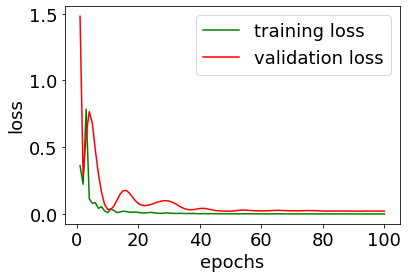

In [127]:
model12_6 = GRU(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=3,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12_6.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model12_6,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [128]:
y_val_pred12_6=eval_rmse(model12_6,X_val_seq,y_val_seq, name='validation')
y_train_pred12_6=eval_rmse(model12_6,X_train_seq,y_train_seq,name='training')
y_pred12_6=np.concatenate((y_train_pred12_6,y_val_pred12_6),axis=0)

validation RMSE: 1797.9872526
training RMSE: 313.2699169


epoch 1, train_mse=1.0565188, val_mse=0.7460421
epoch 2, train_mse=0.4227377, val_mse=0.8838845
epoch 3, train_mse=0.1646073, val_mse=0.9833671
epoch 4, train_mse=0.1195761, val_mse=1.0062598
epoch 5, train_mse=0.1328293, val_mse=0.957626
epoch 6, train_mse=0.1385098, val_mse=0.8632275
epoch 7, train_mse=0.1258718, val_mse=0.7461992
epoch 8, train_mse=0.1024729, val_mse=0.6237089
epoch 9, train_mse=0.0775634, val_mse=0.5062413
epoch 10, train_mse=0.0575647, val_mse=0.3994767
epoch 11, train_mse=0.0448809, val_mse=0.3062062
epoch 12, train_mse=0.0385395, val_mse=0.2274784
epoch 13, train_mse=0.0361057, val_mse=0.1629165
epoch 14, train_mse=0.03517, val_mse=0.1112658
epoch 15, train_mse=0.0340032, val_mse=0.0713459
epoch 16, train_mse=0.0316815, val_mse=0.0424847
epoch 17, train_mse=0.0280153, val_mse=0.0239641
epoch 18, train_mse=0.0234149, val_mse=0.01415
epoch 19, train_mse=0.0186537, val_mse=0.0104141
epoch 20, train_mse=0.0144895, val_mse=0.0099211
epoch 21, train_mse=0.0112751, val

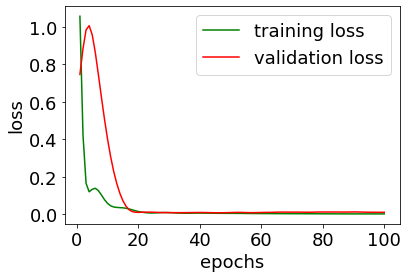

In [197]:
model12_7 = GRU(input_dim=input_dim, hidden_dim=8, output_dim=output_dim, num_layers=1,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model12_7.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model12_7,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [198]:
y_val_pred12_7=eval_rmse(model12_7,X_val_seq,y_val_seq, name='validation')
y_train_pred12_7=eval_rmse(model12_7,X_train_seq,y_train_seq,name='training')
y_pred12_7=np.concatenate((y_train_pred12_7,y_val_pred12_7),axis=0)

validation RMSE: 1235.1453549
training RMSE: 484.3794731


epoch 1, train_mse=0.4933742, val_mse=0.181255
epoch 2, train_mse=0.15083, val_mse=0.1931108
epoch 3, train_mse=0.0167494, val_mse=0.1689478
epoch 4, train_mse=0.1467014, val_mse=0.1642269
epoch 5, train_mse=0.0445819, val_mse=0.1628899
epoch 6, train_mse=0.0144619, val_mse=0.1557467
epoch 7, train_mse=0.031195, val_mse=0.142722
epoch 8, train_mse=0.0472241, val_mse=0.1255725
epoch 9, train_mse=0.0487685, val_mse=0.1054334
epoch 10, train_mse=0.0380299, val_mse=0.0831607
epoch 11, train_mse=0.0219769, val_mse=0.0600534
epoch 12, train_mse=0.008366, val_mse=0.0383698
epoch 13, train_mse=0.0033214, val_mse=0.0211361
epoch 14, train_mse=0.0080562, val_mse=0.0104773
epoch 15, train_mse=0.0162381, val_mse=0.0055825
epoch 16, train_mse=0.0188603, val_mse=0.0038398
epoch 17, train_mse=0.013827, val_mse=0.0034618
epoch 18, train_mse=0.0060783, val_mse=0.0037625
epoch 19, train_mse=0.0010877, val_mse=0.0043147
epoch 20, train_mse=0.0007827, val_mse=0.0046583
epoch 21, train_mse=0.0036578, val_m

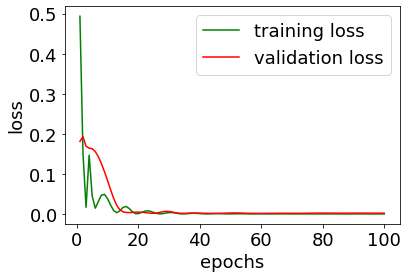

In [190]:
modelDJ12 = GRU(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ12.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ12,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [191]:
y_val_predDJ12=eval_rmse(modelDJ12,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ12=eval_rmse(modelDJ12,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ12=np.concatenate((y_train_predDJ12,y_val_predDJ12),axis=0)

validation RMSE: 550.168416
training RMSE: 153.8666836


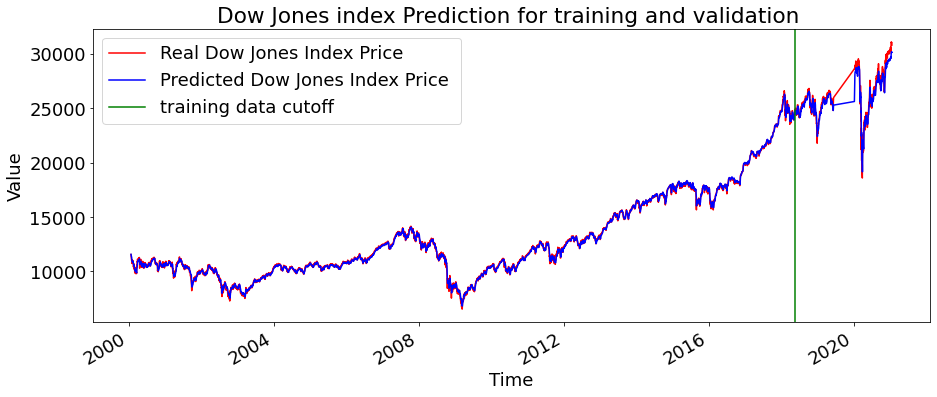

In [192]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ12, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.6331987, val_mse=0.75519
epoch 2, train_mse=0.0834333, val_mse=0.9287663
epoch 3, train_mse=0.195327, val_mse=0.7822727
epoch 4, train_mse=0.2054321, val_mse=0.5330414
epoch 5, train_mse=0.122883, val_mse=0.3081386
epoch 6, train_mse=0.0441461, val_mse=0.1535602
epoch 7, train_mse=0.0102398, val_mse=0.0677134
epoch 8, train_mse=0.017051, val_mse=0.0287302
epoch 9, train_mse=0.038155, val_mse=0.0140578
epoch 10, train_mse=0.0496114, val_mse=0.0091829
epoch 11, train_mse=0.0446322, val_mse=0.0074635
epoch 12, train_mse=0.0298205, val_mse=0.0069745
epoch 13, train_mse=0.0148497, val_mse=0.0078007
epoch 14, train_mse=0.0057666, val_mse=0.0103077
epoch 15, train_mse=0.0037496, val_mse=0.0141513
epoch 16, train_mse=0.0067446, val_mse=0.0180988
epoch 17, train_mse=0.0115691, val_mse=0.0206324
epoch 18, train_mse=0.0154583, val_mse=0.0207813
epoch 19, train_mse=0.0168618, val_mse=0.0185516
epoch 20, train_mse=0.015579, val_mse=0.0147781
epoch 21, train_mse=0.0124341, val_m

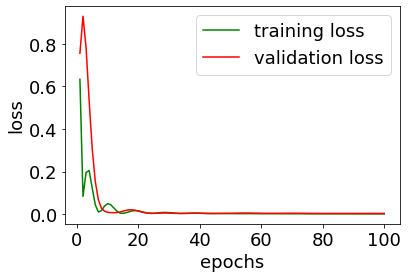

In [193]:
model13 = GRU(input_dim=input_dim, hidden_dim=16, output_dim=output_dim, num_layers=1,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model13.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model13,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [194]:
y_val_pred13=eval_rmse(model13,X_val_seq,y_val_seq, name='validation')
y_train_pred13=eval_rmse(model13,X_train_seq,y_train_seq,name='training')
y_pred13=np.concatenate((y_train_pred13,y_val_pred13),axis=0)

validation RMSE: 750.1765764
training RMSE: 445.8259738


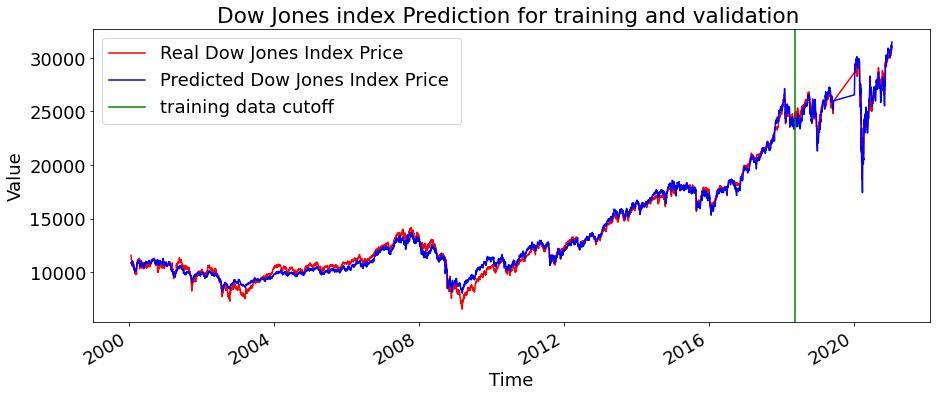

In [195]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred13, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.4336236, val_mse=0.3270369
epoch 2, train_mse=0.3070923, val_mse=0.3347309
epoch 3, train_mse=0.2138091, val_mse=0.3430653
epoch 4, train_mse=0.1443222, val_mse=0.3501607
epoch 5, train_mse=0.0928335, val_mse=0.3543118
epoch 6, train_mse=0.0569676, val_mse=0.3542942
epoch 7, train_mse=0.0364021, val_mse=0.3488062
epoch 8, train_mse=0.0310656, val_mse=0.3365439
epoch 9, train_mse=0.0384228, val_mse=0.3179924
epoch 10, train_mse=0.0507506, val_mse=0.2966107
epoch 11, train_mse=0.0586144, val_mse=0.2757246
epoch 12, train_mse=0.0578352, val_mse=0.2567919
epoch 13, train_mse=0.0499343, val_mse=0.2399213
epoch 14, train_mse=0.038849, val_mse=0.2245725
epoch 15, train_mse=0.0283542, val_mse=0.2099456
epoch 16, train_mse=0.0209197, val_mse=0.1951833
epoch 17, train_mse=0.0174552, val_mse=0.1795155
epoch 18, train_mse=0.0174371, val_mse=0.1625254
epoch 19, train_mse=0.0192436, val_mse=0.1443987
epoch 20, train_mse=0.0208377, val_mse=0.1256845
epoch 21, train_mse=0.0206858,

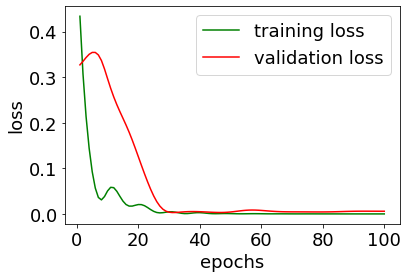

In [196]:
modelDJ13 = GRU(input_dim=input_dimDJ, hidden_dim=16, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [197]:
y_val_predDJ13=eval_rmse(modelDJ13,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13=eval_rmse(modelDJ13,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13=np.concatenate((y_train_predDJ13,y_val_predDJ13),axis=0)

validation RMSE: 964.4453899
training RMSE: 209.9459957


epoch 1, train_mse=0.3578207, val_mse=0.7103523
epoch 2, train_mse=0.0757823, val_mse=0.4811313
epoch 3, train_mse=0.042942, val_mse=0.2430462
epoch 4, train_mse=0.0376677, val_mse=0.0816587
epoch 5, train_mse=0.0108524, val_mse=0.0031945
epoch 6, train_mse=0.0149189, val_mse=0.0166071
epoch 7, train_mse=0.0035906, val_mse=0.0252333
epoch 8, train_mse=0.0113252, val_mse=0.0320921
epoch 9, train_mse=0.0111952, val_mse=0.0405641
epoch 10, train_mse=0.0035699, val_mse=0.0271123
epoch 11, train_mse=0.0077216, val_mse=0.0038559
epoch 12, train_mse=0.0016155, val_mse=0.0101687
epoch 13, train_mse=0.0018503, val_mse=0.0289957
epoch 14, train_mse=0.0055197, val_mse=0.0360511
epoch 15, train_mse=0.003615, val_mse=0.030459
epoch 16, train_mse=0.0025857, val_mse=0.0229575
epoch 17, train_mse=0.0049596, val_mse=0.0204057
epoch 18, train_mse=0.0037082, val_mse=0.0209163
epoch 19, train_mse=0.0013872, val_mse=0.0188754
epoch 20, train_mse=0.002124, val_mse=0.0117857
epoch 21, train_mse=0.0021636, va

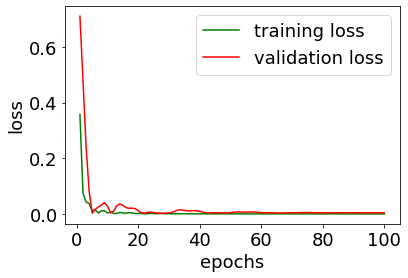

In [129]:
modelDJ13_1 = GRU(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=2,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [130]:
y_val_predDJ13_1=eval_rmse(modelDJ13_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_1=eval_rmse(modelDJ13_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_1=np.concatenate((y_train_predDJ13_1,y_val_predDJ13_1),axis=0)

validation RMSE: 779.8681377
training RMSE: 165.297007


epoch 1, train_mse=0.4933742, val_mse=1.059094
epoch 2, train_mse=3.4448924, val_mse=2.5947309
epoch 3, train_mse=1.4303533, val_mse=5.5503669
epoch 4, train_mse=25.6395035, val_mse=1.1334174
epoch 5, train_mse=8.4986753, val_mse=1.8817332
epoch 6, train_mse=0.9589012, val_mse=4.2069287
epoch 7, train_mse=1.5632015, val_mse=5.50562
epoch 8, train_mse=5.3159871, val_mse=5.0724077
epoch 9, train_mse=5.4787846, val_mse=3.2126062
epoch 10, train_mse=2.559917, val_mse=2.3782563
epoch 11, train_mse=0.4654054, val_mse=2.5805089
epoch 12, train_mse=0.5765656, val_mse=2.1088271
epoch 13, train_mse=1.5311673, val_mse=3.8668454
epoch 14, train_mse=1.831465, val_mse=5.7988596
epoch 15, train_mse=1.5661457, val_mse=3.131732
epoch 16, train_mse=0.7750766, val_mse=1.1458917
epoch 17, train_mse=0.228322, val_mse=0.5273994
epoch 18, train_mse=0.1984394, val_mse=0.4968343
epoch 19, train_mse=0.4365736, val_mse=0.3950661
epoch 20, train_mse=0.5729833, val_mse=0.3293466
epoch 21, train_mse=0.4055108, val_

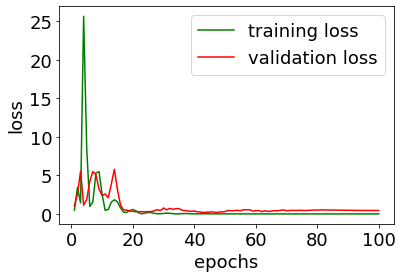

In [139]:
modelDJ13_2 = GRU(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_2.parameters(), lr=0.1)
torch.manual_seed(43)
train_model(modelDJ13_2,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [140]:
y_val_predDJ13_2=eval_rmse(modelDJ13_2,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_2=eval_rmse(modelDJ13_2,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_2=np.concatenate((y_train_predDJ13_2,y_val_predDJ13_2),axis=0)

validation RMSE: 8204.7342011
training RMSE: 215.5462776


epoch 1, train_mse=0.4933742, val_mse=0.1499608
epoch 2, train_mse=0.4487565, val_mse=0.1526879
epoch 3, train_mse=0.4065177, val_mse=0.1548762
epoch 4, train_mse=0.3664304, val_mse=0.1567257
epoch 5, train_mse=0.3283001, val_mse=0.1582897
epoch 6, train_mse=0.2919902, val_mse=0.1595543
epoch 7, train_mse=0.2574207, val_mse=0.1605053
epoch 8, train_mse=0.2245633, val_mse=0.161144
epoch 9, train_mse=0.1934349, val_mse=0.1614804
epoch 10, train_mse=0.1640928, val_mse=0.1615255
epoch 11, train_mse=0.136633, val_mse=0.1612864
epoch 12, train_mse=0.111195, val_mse=0.1607633
epoch 13, train_mse=0.087969, val_mse=0.1599486
epoch 14, train_mse=0.0672042, val_mse=0.1588254
epoch 15, train_mse=0.0492131, val_mse=0.1573669
epoch 16, train_mse=0.0343691, val_mse=0.1555353
epoch 17, train_mse=0.0230866, val_mse=0.1532804
epoch 18, train_mse=0.0157682, val_mse=0.1505409
epoch 19, train_mse=0.012686, val_mse=0.1472576
epoch 20, train_mse=0.0137594, val_mse=0.1434157
epoch 21, train_mse=0.0182283, val

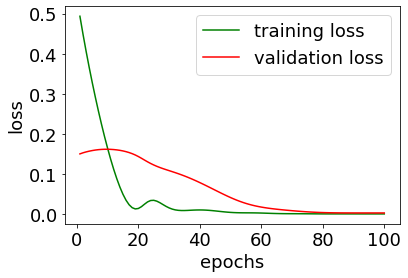

In [137]:
modelDJ13_3 = GRU(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_3.parameters(), lr=0.001)
torch.manual_seed(43)
train_model(modelDJ13_3,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [138]:
y_val_predDJ13_3=eval_rmse(modelDJ13_3,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_3=eval_rmse(modelDJ13_3,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_3=np.concatenate((y_train_predDJ13_3,y_val_predDJ13_3),axis=0)

validation RMSE: 627.5933466
training RMSE: 189.2759241


epoch 1, train_mse=0.5096133, val_mse=0.3307827
epoch 2, train_mse=0.3337186, val_mse=0.4224182
epoch 3, train_mse=0.2098678, val_mse=0.521089
epoch 4, train_mse=0.1202202, val_mse=0.6261363
epoch 5, train_mse=0.0679661, val_mse=0.7265329
epoch 6, train_mse=0.0676938, val_mse=0.7663804
epoch 7, train_mse=0.0996426, val_mse=0.7359145
epoch 8, train_mse=0.1074006, val_mse=0.6770908
epoch 9, train_mse=0.0885789, val_mse=0.6160121
epoch 10, train_mse=0.0652647, val_mse=0.561595
epoch 11, train_mse=0.0517165, val_mse=0.5144882
epoch 12, train_mse=0.04953, val_mse=0.4726281
epoch 13, train_mse=0.0530754, val_mse=0.4335674
epoch 14, train_mse=0.0558202, val_mse=0.3949952
epoch 15, train_mse=0.0539486, val_mse=0.3549624
epoch 16, train_mse=0.046986, val_mse=0.3122078
epoch 17, train_mse=0.036888, val_mse=0.2665059
epoch 18, train_mse=0.0268897, val_mse=0.2190234
epoch 19, train_mse=0.020186, val_mse=0.1724751
epoch 20, train_mse=0.0182563, val_mse=0.1305788
epoch 21, train_mse=0.0195242, val_m

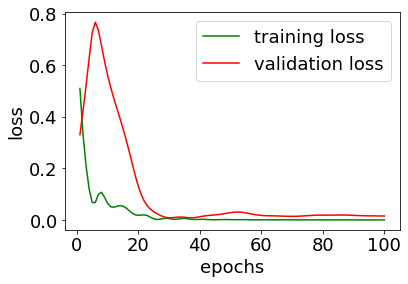

In [141]:
modelDJ13_4 = GRU(input_dim=input_dimDJ, hidden_dim=16, output_dim=output_dim, num_layers=2,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_4.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_4,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [142]:
y_val_predDJ13_4=eval_rmse(modelDJ13_4,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_4=eval_rmse(modelDJ13_4,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_4=np.concatenate((y_train_predDJ13_4,y_val_predDJ13_4),axis=0)

validation RMSE: 1533.8518706
training RMSE: 279.5355552


epoch 1, train_mse=0.3754871, val_mse=0.3780595
epoch 2, train_mse=0.0578354, val_mse=0.3430155
epoch 3, train_mse=0.2679165, val_mse=0.3192305
epoch 4, train_mse=0.0266704, val_mse=0.289727
epoch 5, train_mse=0.0650964, val_mse=0.2570744
epoch 6, train_mse=0.0908803, val_mse=0.2225422
epoch 7, train_mse=0.0848158, val_mse=0.1837881
epoch 8, train_mse=0.0592782, val_mse=0.1378758
epoch 9, train_mse=0.0279668, val_mse=0.0844385
epoch 10, train_mse=0.0078909, val_mse=0.0348513
epoch 11, train_mse=0.0194849, val_mse=0.0135286
epoch 12, train_mse=0.0355026, val_mse=0.0115997
epoch 13, train_mse=0.0217198, val_mse=0.0178032
epoch 14, train_mse=0.0061176, val_mse=0.0275337
epoch 15, train_mse=0.0033987, val_mse=0.0338825
epoch 16, train_mse=0.008271, val_mse=0.0323646
epoch 17, train_mse=0.0124553, val_mse=0.0230984
epoch 18, train_mse=0.0118497, val_mse=0.0103232
epoch 19, train_mse=0.0072413, val_mse=0.0019157
epoch 20, train_mse=0.0022334, val_mse=0.0076585
epoch 21, train_mse=0.0003986, 

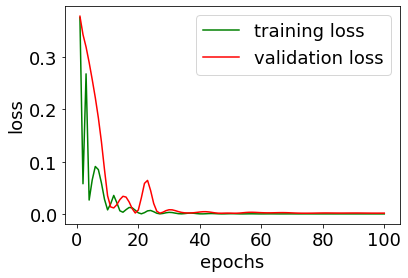

In [143]:
modelDJ13_5 = GRU(input_dim=input_dimDJ, hidden_dim=128, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_5.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_5,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [144]:
y_val_predDJ13_5=eval_rmse(modelDJ13_5,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_5=eval_rmse(modelDJ13_5,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_5=np.concatenate((y_train_predDJ13_5,y_val_predDJ13_5),axis=0)

validation RMSE: 505.9911101
training RMSE: 154.4602063


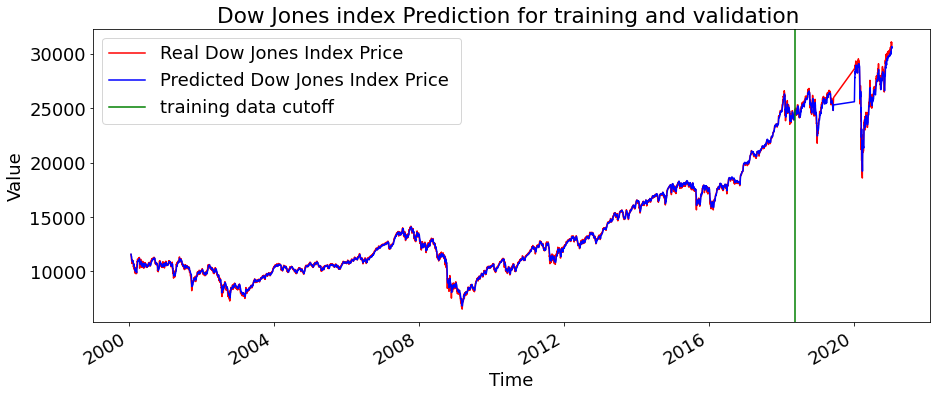

In [166]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ13_5, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3031277, val_mse=0.5368459
epoch 2, train_mse=0.1091428, val_mse=0.4637069
epoch 3, train_mse=0.1245578, val_mse=0.3781655
epoch 4, train_mse=0.1189924, val_mse=0.2951188
epoch 5, train_mse=0.0601876, val_mse=0.186779
epoch 6, train_mse=0.0158057, val_mse=0.0608325
epoch 7, train_mse=0.0668633, val_mse=0.0879585
epoch 8, train_mse=0.006867, val_mse=0.1055608
epoch 9, train_mse=0.0251713, val_mse=0.093731
epoch 10, train_mse=0.0099712, val_mse=0.0609372
epoch 11, train_mse=0.1788522, val_mse=0.0435854
epoch 12, train_mse=0.0166791, val_mse=0.0297267
epoch 13, train_mse=0.0150239, val_mse=0.0135076
epoch 14, train_mse=0.0079636, val_mse=0.0018312
epoch 15, train_mse=0.0012456, val_mse=0.0116002
epoch 16, train_mse=0.0015198, val_mse=0.0425245
epoch 17, train_mse=0.0067903, val_mse=0.0423844
epoch 18, train_mse=0.0086936, val_mse=0.0052215
epoch 19, train_mse=0.0044914, val_mse=0.0288104
epoch 20, train_mse=0.0014301, val_mse=0.0889233
epoch 21, train_mse=0.0037296, v

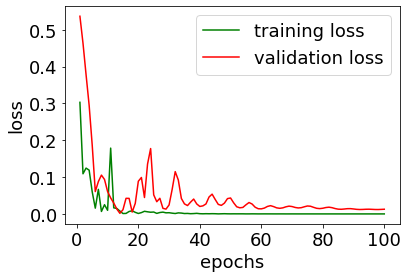

In [145]:
modelDJ13_6 = GRU(input_dim=input_dimDJ, hidden_dim=256, output_dim=output_dim, num_layers=1,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_6.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_6,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [146]:
y_val_predDJ13_6=eval_rmse(modelDJ13_6,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_6=eval_rmse(modelDJ13_6,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_6=np.concatenate((y_train_predDJ13_6,y_val_predDJ13_6),axis=0)

validation RMSE: 1393.5560436
training RMSE: 165.7048164


epoch 1, train_mse=0.3616018, val_mse=1.0156744
epoch 2, train_mse=0.2086189, val_mse=0.5451647
epoch 3, train_mse=0.2184974, val_mse=0.397982
epoch 4, train_mse=0.1738834, val_mse=0.3131375
epoch 5, train_mse=0.0743982, val_mse=0.185996
epoch 6, train_mse=0.0182973, val_mse=0.0498859
epoch 7, train_mse=0.0962879, val_mse=0.0885763
epoch 8, train_mse=0.0089122, val_mse=0.1158545
epoch 9, train_mse=0.0359486, val_mse=0.0861138
epoch 10, train_mse=0.0510116, val_mse=0.0245962
epoch 11, train_mse=0.0265043, val_mse=0.0119925
epoch 12, train_mse=0.0014029, val_mse=0.1468518
epoch 13, train_mse=0.0206007, val_mse=0.1592745
epoch 14, train_mse=0.0273422, val_mse=0.0319931
epoch 15, train_mse=0.0046032, val_mse=0.0044518
epoch 16, train_mse=0.0025231, val_mse=0.0353025
epoch 17, train_mse=0.0121605, val_mse=0.0601408
epoch 18, train_mse=0.016564, val_mse=0.0608051
epoch 19, train_mse=0.0123609, val_mse=0.0408985
epoch 20, train_mse=0.0049939, val_mse=0.0156748
epoch 21, train_mse=0.0023183, v

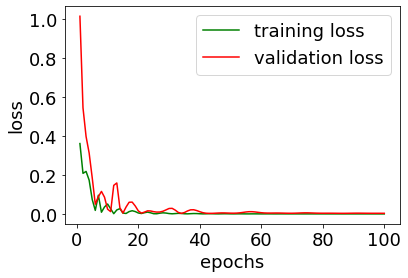

In [147]:
modelDJ13_7 = GRU(input_dim=input_dimDJ, hidden_dim=128, output_dim=output_dim, num_layers=2,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_7.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_7,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [148]:
y_val_predDJ13_7=eval_rmse(modelDJ13_7,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_7=eval_rmse(modelDJ13_7,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_7=np.concatenate((y_train_predDJ13_7,y_val_predDJ13_7),axis=0)

validation RMSE: 714.0854046
training RMSE: 181.7413552


epoch 1, train_mse=0.3721877, val_mse=1.2772119
epoch 2, train_mse=0.2069432, val_mse=0.6141403
epoch 3, train_mse=0.1327142, val_mse=0.5188459
epoch 4, train_mse=0.1380982, val_mse=0.5387524
epoch 5, train_mse=0.0774114, val_mse=0.5223211
epoch 6, train_mse=0.0456749, val_mse=0.3635486
epoch 7, train_mse=0.0588244, val_mse=0.1640635
epoch 8, train_mse=0.0423148, val_mse=0.0522132
epoch 9, train_mse=0.0079848, val_mse=0.0055791
epoch 10, train_mse=0.0104666, val_mse=0.0441943
epoch 11, train_mse=0.0219077, val_mse=0.1441018
epoch 12, train_mse=0.0193485, val_mse=0.1380105
epoch 13, train_mse=0.0172882, val_mse=0.0350356
epoch 14, train_mse=0.0070563, val_mse=0.0120214
epoch 15, train_mse=0.0008892, val_mse=0.0670344
epoch 16, train_mse=0.0057038, val_mse=0.1144162
epoch 17, train_mse=0.0080556, val_mse=0.1239832
epoch 18, train_mse=0.0062205, val_mse=0.1129595
epoch 19, train_mse=0.0079904, val_mse=0.1063686
epoch 20, train_mse=0.0095663, val_mse=0.1110167
epoch 21, train_mse=0.0060408

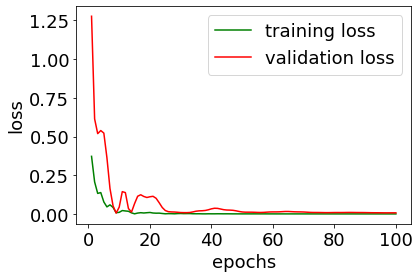

In [199]:
modelDJ13_8= GRU(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=3,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_8.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_8,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [200]:
y_val_predDJ13_8=eval_rmse(modelDJ13_8,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_8=eval_rmse(modelDJ13_8,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_8=np.concatenate((y_train_predDJ13_8,y_val_predDJ13_8),axis=0)

validation RMSE: 1045.8584251
training RMSE: 183.7257515


epoch 1, train_mse=0.3931655, val_mse=1.6809185
epoch 2, train_mse=0.4103653, val_mse=0.3635927
epoch 3, train_mse=0.5419829, val_mse=0.4251787
epoch 4, train_mse=0.2278279, val_mse=0.547243
epoch 5, train_mse=0.1547484, val_mse=0.6680284
epoch 6, train_mse=0.0565873, val_mse=0.6078286
epoch 7, train_mse=0.2288997, val_mse=0.547823
epoch 8, train_mse=0.0883749, val_mse=0.4736991
epoch 9, train_mse=0.1742471, val_mse=0.3685777
epoch 10, train_mse=0.1167188, val_mse=0.2344676
epoch 11, train_mse=0.0338311, val_mse=0.0879544
epoch 12, train_mse=0.016044, val_mse=0.0111471
epoch 13, train_mse=0.053015, val_mse=0.0035703
epoch 14, train_mse=0.0248805, val_mse=0.0048935
epoch 15, train_mse=0.0044549, val_mse=0.0070471
epoch 16, train_mse=0.0214471, val_mse=0.0045761
epoch 17, train_mse=0.0321921, val_mse=0.0135965
epoch 18, train_mse=0.0223086, val_mse=0.0535724
epoch 19, train_mse=0.0105576, val_mse=0.0891951
epoch 20, train_mse=0.0122856, val_mse=0.0653573
epoch 21, train_mse=0.0168955, va

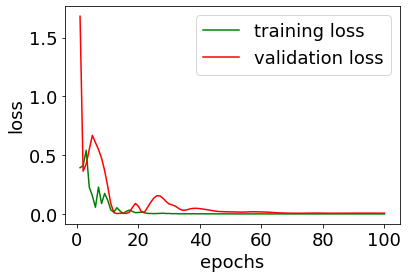

In [203]:
modelDJ13_9= GRU(input_dim=input_dimDJ, hidden_dim=128, output_dim=output_dim, num_layers=3,batch_size=batch_sizeDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_9.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_9,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [204]:
y_val_predDJ13_9=eval_rmse(modelDJ13_9,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ13_9=eval_rmse(modelDJ13_9,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ13_9=np.concatenate((y_train_predDJ13_9,y_val_predDJ13_9),axis=0)

validation RMSE: 988.3855584
training RMSE: 191.687632


epoch 1, train_mse=0.2762464, val_mse=1.5251095
epoch 2, train_mse=0.2598777, val_mse=1.0076009
epoch 3, train_mse=0.1155214, val_mse=0.5077734
epoch 4, train_mse=0.0716874, val_mse=0.2720599
epoch 5, train_mse=0.0952892, val_mse=0.1918721
epoch 6, train_mse=0.0493457, val_mse=0.156409
epoch 7, train_mse=0.013044, val_mse=0.1211496
epoch 8, train_mse=0.0174121, val_mse=0.0812049
epoch 9, train_mse=0.0262286, val_mse=0.0527297
epoch 10, train_mse=0.0227403, val_mse=0.0417966
epoch 11, train_mse=0.0175941, val_mse=0.0394782
epoch 12, train_mse=0.0167785, val_mse=0.046154
epoch 13, train_mse=0.0173077, val_mse=0.0621596
epoch 14, train_mse=0.0151751, val_mse=0.0823391
epoch 15, train_mse=0.0105822, val_mse=0.1090978
epoch 16, train_mse=0.0080262, val_mse=0.1379107
epoch 17, train_mse=0.0093379, val_mse=0.1524844
epoch 18, train_mse=0.011898, val_mse=0.1597814
epoch 19, train_mse=0.0133631, val_mse=0.1502434
epoch 20, train_mse=0.0123167, val_mse=0.1321913
epoch 21, train_mse=0.0096233, va

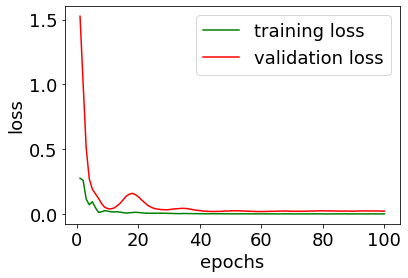

In [198]:
model14 = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size,dropout=0.2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model14.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model14,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [199]:
y_val_pred14=eval_rmse(model14,X_val_seq,y_val_seq, name='validation')
y_train_pred14=eval_rmse(model14,X_train_seq,y_train_seq,name='training')
y_pred14=np.concatenate((y_train_pred14,y_val_pred14),axis=0)

validation RMSE: 1872.4510156
training RMSE: 405.1208692


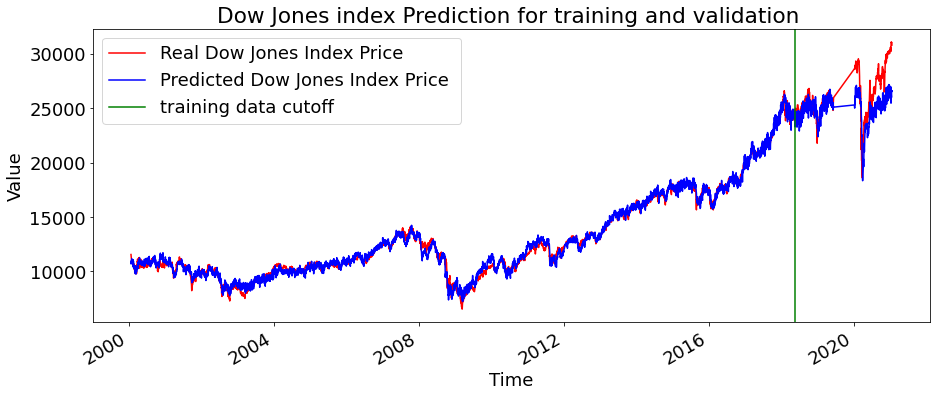

In [200]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_pred14, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.359805, val_mse=0.2994902
epoch 2, train_mse=0.0997268, val_mse=0.3174121
epoch 3, train_mse=0.0336103, val_mse=0.255246
epoch 4, train_mse=0.0991954, val_mse=0.2444595
epoch 5, train_mse=0.0613694, val_mse=0.2489237
epoch 6, train_mse=0.0276977, val_mse=0.2411383
epoch 7, train_mse=0.0269353, val_mse=0.2188485
epoch 8, train_mse=0.0361126, val_mse=0.1800194
epoch 9, train_mse=0.0380224, val_mse=0.1289205
epoch 10, train_mse=0.0296225, val_mse=0.0738032
epoch 11, train_mse=0.015534, val_mse=0.0284928
epoch 12, train_mse=0.0047802, val_mse=0.0094541
epoch 13, train_mse=0.0044612, val_mse=0.0156167
epoch 14, train_mse=0.0125684, val_mse=0.0320346
epoch 15, train_mse=0.0165953, val_mse=0.0363113
epoch 16, train_mse=0.0114454, val_mse=0.0287344
epoch 17, train_mse=0.0052428, val_mse=0.0182561
epoch 18, train_mse=0.0036254, val_mse=0.0117436
epoch 19, train_mse=0.0058778, val_mse=0.011694
epoch 20, train_mse=0.0086077, val_mse=0.0120641
epoch 21, train_mse=0.0092135, va

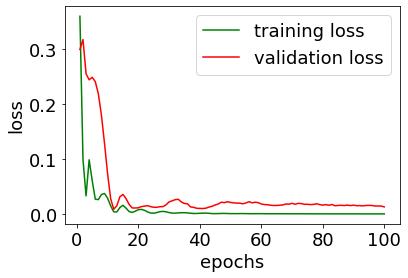

In [172]:
modelDJ14 = GRU(input_dim=input_dimDJ, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ,dropout=0.2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ14.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ14,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [202]:
y_val_predDJ14=eval_rmse(modelDJ14,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ14=eval_rmse(modelDJ14,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ14=np.concatenate((y_train_predDJ14,y_val_predDJ14),axis=0)

validation RMSE: 1009.1001079
training RMSE: 466.2624655


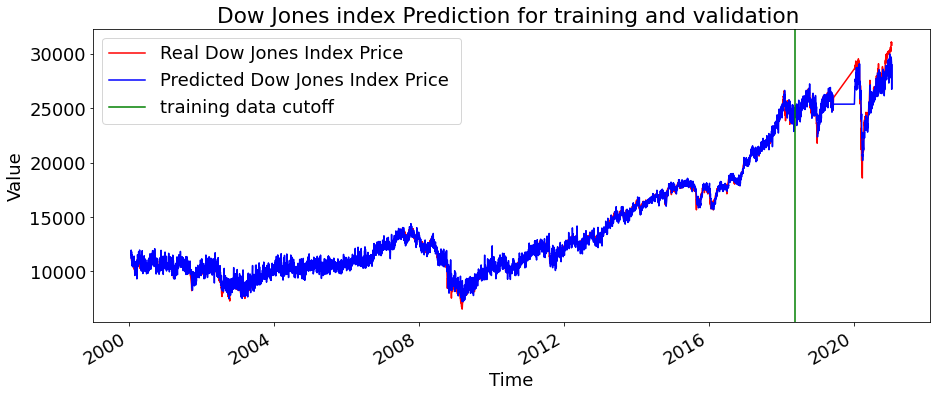

In [203]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(X_bigtrain_raw.index[seq:], y_bigtrain_raw[seq:], color = 'red', label = 'Real Dow Jones Index Price ')
axes.plot(X_bigtrain_raw.index[seq:], y_predDJ14, color = 'blue', label = 'Predicted Dow Jones Index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = X_bigtrain_raw.index[len(X_train_seq)+seq], color = 'g', label = 'training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

epoch 1, train_mse=0.3443223, val_mse=2.6954241
epoch 2, train_mse=1.3273369, val_mse=0.5240724
epoch 3, train_mse=0.2545547, val_mse=0.2840548
epoch 4, train_mse=0.3551661, val_mse=0.3566485
epoch 5, train_mse=0.1046262, val_mse=0.4780318
epoch 6, train_mse=0.0382102, val_mse=0.5292392
epoch 7, train_mse=0.0938436, val_mse=0.4361478
epoch 8, train_mse=0.0903559, val_mse=0.2760051
epoch 9, train_mse=0.0325061, val_mse=0.1478623
epoch 10, train_mse=0.0124627, val_mse=0.074431
epoch 11, train_mse=0.0405375, val_mse=0.0472902
epoch 12, train_mse=0.0503777, val_mse=0.0344863
epoch 13, train_mse=0.0289356, val_mse=0.0302412
epoch 14, train_mse=0.0088305, val_mse=0.0312149
epoch 15, train_mse=0.0109175, val_mse=0.0340459
epoch 16, train_mse=0.0224556, val_mse=0.0396948
epoch 17, train_mse=0.0248566, val_mse=0.0464155
epoch 18, train_mse=0.0173063, val_mse=0.0524594
epoch 19, train_mse=0.0086321, val_mse=0.0593557
epoch 20, train_mse=0.0060523, val_mse=0.0639542
epoch 21, train_mse=0.0097977,

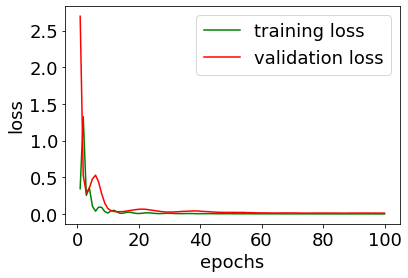

In [164]:
model15 = GRU(input_dim=input_dim, hidden_dim=64, output_dim=output_dim, num_layers=num_layers,batch_size=batch_size,dropout=0.2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model15.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model15,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [171]:
y_val_pred15=eval_rmse(model15,X_val_seq,y_val_seq, name='validation')
y_train_pred15=eval_rmse(model15,X_train_seq,y_train_seq,name='training')
y_pred15=np.concatenate((y_train_pred15,y_val_pred15),axis=0)

validation RMSE: 1373.9469887
training RMSE: 402.9756234


epoch 1, train_mse=0.562529, val_mse=0.9271085
epoch 2, train_mse=0.0922333, val_mse=0.9887744
epoch 3, train_mse=0.0964925, val_mse=0.5741212
epoch 4, train_mse=0.1027575, val_mse=0.5240278
epoch 5, train_mse=0.0564438, val_mse=0.4128253
epoch 6, train_mse=0.0538297, val_mse=0.1744796
epoch 7, train_mse=0.0163036, val_mse=0.0530868
epoch 8, train_mse=0.0262424, val_mse=0.0291181
epoch 9, train_mse=0.0179056, val_mse=0.0265131
epoch 10, train_mse=0.0281866, val_mse=0.0377625
epoch 11, train_mse=0.0193882, val_mse=0.0599787
epoch 12, train_mse=0.0082826, val_mse=0.0995964
epoch 13, train_mse=0.0151585, val_mse=0.1377855
epoch 14, train_mse=0.0165138, val_mse=0.1578634
epoch 15, train_mse=0.0138321, val_mse=0.1574318
epoch 16, train_mse=0.0152781, val_mse=0.1385749
epoch 17, train_mse=0.0152525, val_mse=0.1043257
epoch 18, train_mse=0.0103625, val_mse=0.0732566
epoch 19, train_mse=0.0065801, val_mse=0.0558786
epoch 20, train_mse=0.0088676, val_mse=0.0456566
epoch 21, train_mse=0.0109112,

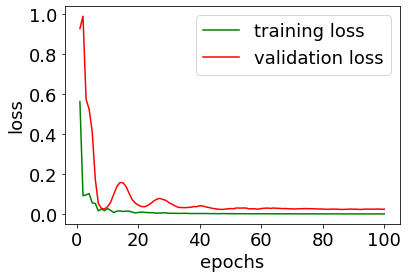

In [205]:
model15_1 = GRU(input_dim=input_dim, hidden_dim=32, output_dim=output_dim, num_layers=3,batch_size=batch_size,dropout=0.2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model15_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model15_1,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [207]:
y_val_pred15_1=eval_rmse(model15_1,X_val_seq,y_val_seq, name='validation')
y_train_pred15_1=eval_rmse(model15_1,X_train_seq,y_train_seq,name='training')
y_pred15_1=np.concatenate((y_train_pred15_1,y_val_pred15_1),axis=0)

validation RMSE: 1912.6928955
training RMSE: 487.5767368


epoch 1, train_mse=0.4840631, val_mse=4.5828986
epoch 2, train_mse=3.2302957, val_mse=0.1057294
epoch 3, train_mse=3.3713315, val_mse=0.4277629
epoch 4, train_mse=0.337908, val_mse=0.9624865
epoch 5, train_mse=0.1791058, val_mse=1.016005
epoch 6, train_mse=0.2754314, val_mse=0.6714239
epoch 7, train_mse=0.0688848, val_mse=0.3737873
epoch 8, train_mse=0.1029666, val_mse=0.249629
epoch 9, train_mse=0.1967202, val_mse=0.2337362
epoch 10, train_mse=0.1323064, val_mse=0.2650819
epoch 11, train_mse=0.037604, val_mse=0.3104307
epoch 12, train_mse=0.0299919, val_mse=0.320999
epoch 13, train_mse=0.06706, val_mse=0.2722562
epoch 14, train_mse=0.0608642, val_mse=0.1951272
epoch 15, train_mse=0.0222038, val_mse=0.1241934
epoch 16, train_mse=0.0107406, val_mse=0.0783891
epoch 17, train_mse=0.0288297, val_mse=0.0544442
epoch 18, train_mse=0.0218967, val_mse=0.0363014
epoch 19, train_mse=0.015685, val_mse=0.0265892
epoch 20, train_mse=0.0189922, val_mse=0.0226967
epoch 21, train_mse=0.0161598, val_ms

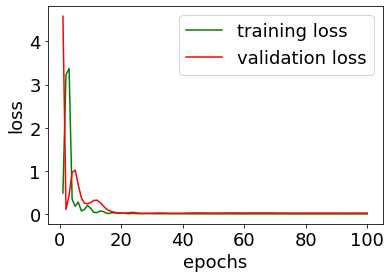

In [208]:
model15_2 = GRU(input_dim=input_dim, hidden_dim=128, output_dim=output_dim, num_layers=2,batch_size=batch_size,dropout=0.2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model15_2.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model15_2,criterion,optimizer,num_epochs,trainloader,X_val_seq,y_val_seq)

In [209]:
y_val_pred15_2=eval_rmse(model15_2,X_val_seq,y_val_seq, name='validation')
y_train_pred15_2=eval_rmse(model15_2,X_train_seq,y_train_seq,name='training')
y_pred15_2=np.concatenate((y_train_pred15_2,y_val_pred15_2),axis=0)

validation RMSE: 1785.9967115
training RMSE: 391.7918645


epoch 1, train_mse=0.3583812, val_mse=0.710041
epoch 2, train_mse=0.0757693, val_mse=0.4819245
epoch 3, train_mse=0.0437025, val_mse=0.2447444
epoch 4, train_mse=0.0385707, val_mse=0.0846368
epoch 5, train_mse=0.0118584, val_mse=0.0054847
epoch 6, train_mse=0.0156226, val_mse=0.019242
epoch 7, train_mse=0.0048865, val_mse=0.0288204
epoch 8, train_mse=0.011975, val_mse=0.0356193
epoch 9, train_mse=0.0125615, val_mse=0.0426141
epoch 10, train_mse=0.0043683, val_mse=0.0319433
epoch 11, train_mse=0.0085078, val_mse=0.0094531
epoch 12, train_mse=0.0030896, val_mse=0.0157345
epoch 13, train_mse=0.0023079, val_mse=0.0332588
epoch 14, train_mse=0.006551, val_mse=0.0430205
epoch 15, train_mse=0.005303, val_mse=0.0365358
epoch 16, train_mse=0.0034523, val_mse=0.0261502
epoch 17, train_mse=0.0053476, val_mse=0.0202196
epoch 18, train_mse=0.005193, val_mse=0.0208902
epoch 19, train_mse=0.0025549, val_mse=0.0199923
epoch 20, train_mse=0.002436, val_mse=0.0160286
epoch 21, train_mse=0.00323, val_mse

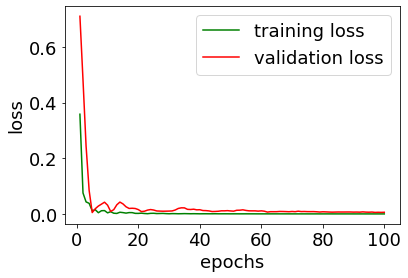

In [173]:
modelDJ15 = GRU(input_dim=input_dimDJ, hidden_dim=64, output_dim=output_dim, num_layers=num_layers,batch_size=batch_sizeDJ,dropout=0.2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ15.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ15,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [206]:
y_val_pred15DJ=eval_rmse(model15DJ,X_val_seq,y_val_seq, name='validation')
y_train_pred15DJ=eval_rmse(model15DJ,X_train_seq,y_train_seq,name='training')
y_pred15DJ=np.concatenate((y_train_pred15DJ,y_val_pred15DJ),axis=0)

validation RMSE: 1496.7714308
training RMSE: 383.1124448


epoch 1, train_mse=0.1967643, val_mse=0.9490451
epoch 2, train_mse=0.0844097, val_mse=0.783298
epoch 3, train_mse=0.0737404, val_mse=0.5375001
epoch 4, train_mse=0.0504807, val_mse=0.3225732
epoch 5, train_mse=0.0395129, val_mse=0.1295649
epoch 6, train_mse=0.0115749, val_mse=0.0140973
epoch 7, train_mse=0.0171936, val_mse=0.0268473
epoch 8, train_mse=0.0081289, val_mse=0.0377544
epoch 9, train_mse=0.024709, val_mse=0.0285718
epoch 10, train_mse=0.0130542, val_mse=0.0162227
epoch 11, train_mse=0.006193, val_mse=0.0176035
epoch 12, train_mse=0.0072609, val_mse=0.0496106
epoch 13, train_mse=0.0049268, val_mse=0.0974188
epoch 14, train_mse=0.0075381, val_mse=0.1245177
epoch 15, train_mse=0.0109175, val_mse=0.1142149
epoch 16, train_mse=0.009503, val_mse=0.0896411
epoch 17, train_mse=0.0065988, val_mse=0.054906
epoch 18, train_mse=0.005908, val_mse=0.0342165
epoch 19, train_mse=0.0049754, val_mse=0.0228612
epoch 20, train_mse=0.0029387, val_mse=0.0184811
epoch 21, train_mse=0.0028173, val_

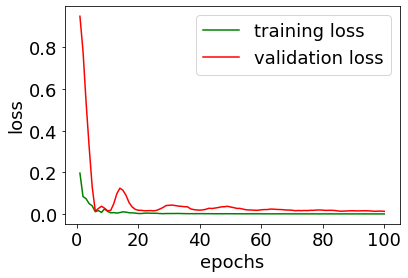

In [176]:
modelDJ15_1 = GRU(input_dim=input_dimDJ, hidden_dim=32, output_dim=output_dim, num_layers=3,batch_size=batch_sizeDJ,dropout=0.2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ15_1.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ15_1,criterion,optimizer,num_epochs,trainloaderDJ,X_val_seqDJ,y_val_seqDJ)

In [177]:
y_val_predDJ15_1=eval_rmse(modelDJ15_1,X_val_seqDJ,y_val_seqDJ, name='validation')
y_train_predDJ15_1=eval_rmse(modelDJ15_1,X_train_seqDJ,y_train_seqDJ,name='training')
y_predDJ15_1=np.concatenate((y_train_predDJ15_1,y_val_predDJ15_1),axis=0)

validation RMSE: 1416.1838791
training RMSE: 376.948739


In [149]:
X_bigtrain_seqDJ = torch.from_numpy(X_bigtrain_seqDJ).type(torch.Tensor).to(device)

y_bigtrain_seqDJ = torch.from_numpy(y_bigtrain_seqDJ).type(torch.Tensor).to(device)


In [150]:
X_bigtrain_seq = torch.from_numpy(X_bigtrain_seq).type(torch.Tensor).to(device)

y_bigtrain_seq = torch.from_numpy(y_bigtrain_seq).type(torch.Tensor).to(device)

In [151]:
bigtrainsetDJ=PrepareData(X_bigtrain_seqDJ,y_bigtrain_seqDJ)
batch_size_bigDJ=len(X_bigtrain_seqDJ)
bigtrainloaderDJ=DataLoader(bigtrainsetDJ,batch_size=batch_size_bigDJ)

In [152]:
bigtrainset=PrepareData(X_bigtrain_seq,y_bigtrain_seq)
batch_size_big=len(X_bigtrain_seq)
bigtrainloader=DataLoader(bigtrainset,batch_size=batch_size_big)

epoch 1, train_mse=0.3291087
epoch 2, train_mse=0.0693877
epoch 3, train_mse=0.1728186
epoch 4, train_mse=0.0272537
epoch 5, train_mse=0.0759188
epoch 6, train_mse=0.083231
epoch 7, train_mse=0.0540992
epoch 8, train_mse=0.015786
epoch 9, train_mse=0.0016738
epoch 10, train_mse=0.0285411
epoch 11, train_mse=0.0248374
epoch 12, train_mse=0.0063376
epoch 13, train_mse=0.003816
epoch 14, train_mse=0.0103774
epoch 15, train_mse=0.0154912
epoch 16, train_mse=0.0149348
epoch 17, train_mse=0.0096925
epoch 18, train_mse=0.0034957
epoch 19, train_mse=0.0004332
epoch 20, train_mse=0.0023197
epoch 21, train_mse=0.0063991
epoch 22, train_mse=0.0074134
epoch 23, train_mse=0.0044536
epoch 24, train_mse=0.0012426
epoch 25, train_mse=0.0003802
epoch 26, train_mse=0.0015196
epoch 27, train_mse=0.0030223
epoch 28, train_mse=0.0036035
epoch 29, train_mse=0.0029819
epoch 30, train_mse=0.0017425
epoch 31, train_mse=0.0007818
epoch 32, train_mse=0.0006702
epoch 33, train_mse=0.0012723
epoch 34, train_mse=0.

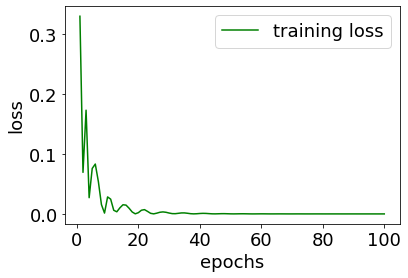

In [154]:
modelDJ13_5 = GRU(input_dim=input_dimDJ, hidden_dim=128, output_dim=output_dim, num_layers=1,batch_size=batch_size_bigDJ,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelDJ13_5.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(modelDJ13_5,criterion,optimizer,num_epochs,bigtrainloaderDJ,eval=False)

epoch 1, train_mse=0.6038834
epoch 2, train_mse=0.1495686
epoch 3, train_mse=0.2029687
epoch 4, train_mse=0.1545237
epoch 5, train_mse=0.0628379
epoch 6, train_mse=0.010925
epoch 7, train_mse=0.0139456
epoch 8, train_mse=0.0407033
epoch 9, train_mse=0.0560885
epoch 10, train_mse=0.0503874
epoch 11, train_mse=0.0330209
epoch 12, train_mse=0.0160405
epoch 13, train_mse=0.006097
epoch 14, train_mse=0.003988
epoch 15, train_mse=0.0070665
epoch 16, train_mse=0.0117335
epoch 17, train_mse=0.0151372
epoch 18, train_mse=0.0160019
epoch 19, train_mse=0.014648
epoch 20, train_mse=0.0123847
epoch 21, train_mse=0.0104303
epoch 22, train_mse=0.0090189
epoch 23, train_mse=0.0078301
epoch 24, train_mse=0.0066559
epoch 25, train_mse=0.005484
epoch 26, train_mse=0.0044946
epoch 27, train_mse=0.0039809
epoch 28, train_mse=0.0041043
epoch 29, train_mse=0.0046985
epoch 30, train_mse=0.0054053
epoch 31, train_mse=0.0059154
epoch 32, train_mse=0.0060593
epoch 33, train_mse=0.0058087
epoch 34, train_mse=0.00

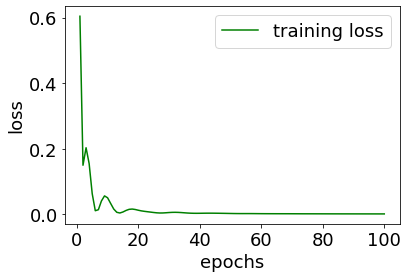

In [155]:
model13 = GRU(input_dim=input_dim, hidden_dim=16, output_dim=output_dim, num_layers=1,batch_size=batch_size,dropout=0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model13.parameters(), lr=0.01)
torch.manual_seed(43)
train_model(model13,criterion,optimizer,num_epochs,bigtrainloader,eval=False)

In [156]:
test_pred=eval_rmse(modelDJ13_5,X_test_seqDJ,y_test_seq, name='test')
bigtrain_pred=eval_rmse(modelDJ13_5,X_bigtrain_seqDJ,y_bigtrain_seqDJ,name='training')
y_predfinal=np.concatenate((bigtrain_pred,test_pred),axis=0)

test RMSE: 853.147661
training RMSE: 203.8162258


In [158]:
test_pred1=eval_rmse(model13,X_test_seq,y_test_seq, name='test')
bigtrain_pred1=eval_rmse(model13,X_bigtrain_seq,y_bigtrain_seq,name='training')
y_predfinal1=np.concatenate((bigtrain_pred1,test_pred1),axis=0)

test RMSE: 1817.8782252
training RMSE: 418.1195558


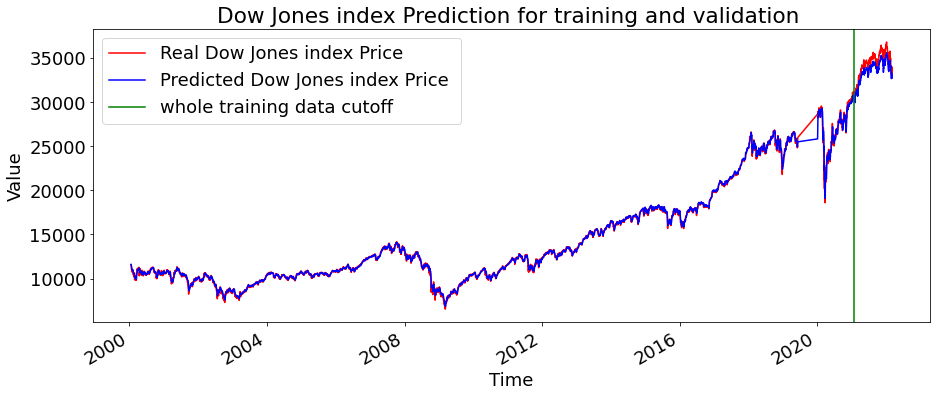

In [159]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(DJ_fea.index[seq:], DJ_tar[seq:], color = 'red', label = 'Real Dow Jones index Price ')
axes.plot(DJ_fea.index[seq:], y_predfinal, color = 'blue', label = 'Predicted Dow Jones index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = DJ_fea.index[len(X_bigtrain_seq)+seq], color = 'g', label = 'whole training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

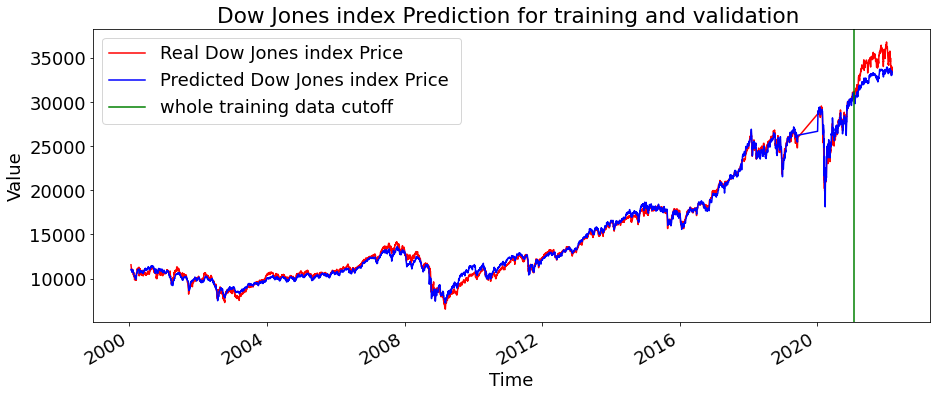

In [160]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(DJ_fea.index[seq:], DJ_tar[seq:], color = 'red', label = 'Real Dow Jones index Price ')
axes.plot(DJ_fea.index[seq:], y_predfinal1, color = 'blue', label = 'Predicted Dow Jones index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')
plt.axvline(x = DJ_fea.index[len(X_bigtrain_seq)+seq], color = 'g', label = 'whole training data cutoff')
plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

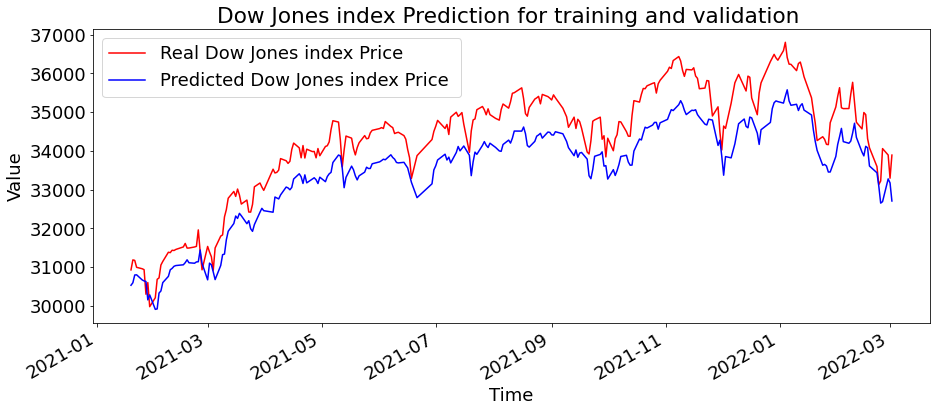

In [161]:
figure, axes = plt.subplots(figsize=(15, 6))


axes.plot(DJ_fea.index[-len(test_pred):], DJ_tar[-len(test_pred):], color = 'red', label = 'Real Dow Jones index Price ')
axes.plot(DJ_fea.index[-len(test_pred):], test_pred, color = 'blue', label = 'Predicted Dow Jones index Price ')
#axes.xticks(np.arange(0,394,50))
plt.title('Dow Jones index Prediction for training and validation ')

plt.xlabel('Time')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

In [162]:
sklearn.metrics.mean_absolute_percentage_error(DJ_tar[-len(test_pred):], test_pred)

0.022820111484631117

In [163]:
sklearn.metrics.r2_score(DJ_tar[-len(test_pred):], test_pred)

0.6701917379998898